### Named Entity Recognition

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")

### hsbc

In [2]:
#import HSBC's news data

from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

hsbc_news = pd.read_excel(r"/content/gdrive/My Drive/Dataset/News_Info_part3.xlsx",sheet_name='HSBC')
hsbc_news['date']=pd.to_datetime(hsbc_news['date']).dt.date
hsbc_news

Mounted at /content/gdrive


date                                              title  \
0     2024-05-08              HSBC Holdings PLC's Dividend Analysis   
1     2024-05-06  Top Three UK Dividend Stocks To Watch In May 2024   
2     2024-05-04  Ping An votes against reappointment of HSBC CE...   
3     2024-05-04  HSBC Holdings First Quarter 2024 Earnings: Bea...   
4     2024-05-03  3 Foreign Bank Stocks Worth a Look in a Prospe...   
...          ...                                                ...   
1544  2021-03-31  London housing market falls behind amid work f...   
1545  2021-03-26  Workers could quit their jobs if forced to sta...   
1546  2021-03-26  UK banks can withstand COVID shock, says Bank ...   
1547  2021-03-25  Santander to shut 111 branches and make Milton...   
1548  2021-03-25  Nationwide says 13,000 staff can work from hom...   

                                                content  \
0     Exploring the Sustainability of HSBC Holdings ...   
1     As the FTSE 100 mirrors a positive trend in gl...   
2     (Reuters) - HSBC Holdings Plc's biggest Asian ...   
3     HSBC Holdings (LON:HSBA) First Quarter 2024 Re...   
4     Banks across the globe have been continuously ...   
...                                                 ...   
1544  A Sold estate agent board sign by Purple Brick...   
1545  Sunak urged firms that have benefitted from th...   
1546  Barclays, Citi and HSBC London HQs form the Ca...   
1547  Santander announced a sweeping overhaul of its...   
1548  Nationwide CEO Joe Garner. Photo: Nationwide\n...   

                                                   link  \
0     https://finance.yahoo.com/news/hsbc-holdings-p...   
1     https://finance.yahoo.com/news/top-three-uk-di...   
2     https://finance.yahoo.com/news/ping-votes-agai...   
3     https://finance.yahoo.com/news/hsbc-holdings-f...   
4     https://finance.yahoo.com/news/3-foreign-bank-...   
...                                                 ...   
1544  https://uk.finance.yahoo.com/news/nationwide-h...   
1545  https://uk.finance.yahoo.com/news/workers-coul...   
1546  https://uk.finance.yahoo.com/news/bank-of-engl...   
1547  https://uk.finance.yahoo.com/news/santander-br...   
1548  https://uk.finance.yahoo.com/news/nationwide-s...   

                                                symbols  \
0     ['0005.HK', 'H1SB34.SA', 'HBC1.BE', 'HBC1.DU',...   
1     ['0005.HK', 'BYG.LSE', 'DCC.LSE', 'GFTU.LSE', ...   
2     ['0005.HK', '2318.HK', '601318.SHG', 'H1SB34.S...   
3     ['0005.HK', 'H1SB34.SA', 'HBC1.BE', 'HBC1.DU',...   
4     ['0005.HK', 'GSPC.INDX', 'H1SB34.SA', 'HBC1.BE...   
...                                                 ...   
1544  ['0005.HK', 'BCS.US', 'BKGFF.US', 'BKGFY.US', ...   
1545  ['0005.HK', 'HSBC.US', 'LLDTF.US', 'LYG.US', '...   
1546  ['0005.HK', 'HSBC.US', 'LLDTF.US', 'LYG.US', '...   
1547  ['0005.HK', 'BCS.US', 'HSBC.US', 'LLDTF.US', '...   
1548  ['0005.HK', 'HSBC.US', 'LLDTF.US', 'LYG.US', '...   

                                                   tags  \
0                                                    []   
1                                                    []   
2                                                    []   
3                                                    []   
4                                                    []   
...                                                 ...   
1544  ['GETTY IMAGES', 'HOUSE PRICE', 'LONDON', 'PRI...   
1545  ['OFFICE ENVIRONMENT', 'SUNAK', 'UK', 'UK ECON...   
1546  ['BANK OF ENGLAND', 'CANARY WHARF', 'FINANCIAL...   
1547                            ['LONDON', 'SANTANDER']   
1548  ['FINANCIAL INSTITUTION', 'FLEXIBLE WORKING', ...   

                                              sentiment  
0     {'polarity': 0.998, 'neg': 0.014, 'neu': 0.861...  
1     {'polarity': 0.998, 'neg': 0.013, 'neu': 0.879...  
2     {'polarity': -0.477, 'neg': 0.044, 'neu': 0.93...  
3     {'polarity': 0.776, 'neg': 0.035, 'neu': 0.911...  
4     {'polarity': 1, 'neg': 0.01

In [ ]:
name_list = []
for content in hsbc_news['content']:
  doc = nlp(content)
  for ent in doc.ents:
    if ent.label_ == "ORG" and "HSBC" not in ent.text:
      name_list.append(ent.text)

In [ ]:
org = pd.DataFrame(name_list,columns=['Organization Name'])
org['Organization Name'].value_counts()

Organization Name
Reuters                        549
NYSE                           453
Zacks Investment Research      427
Zacks Rank                     375
MOODY                          292
                              ... 
Edinburgh Mortgage Advice        1
Clayhall Financial Services      1
Private Finance                  1
FinEx Capital Management         1
Wickford                         1
Name: count, Length: 6727, dtype: int64

In [ ]:
pd.DataFrame(org['Organization Name'].value_counts()).to_excel('/content/gdrive/My Drive/Dataset/hsbc_org.xlsx')

### toyota

In [ ]:
#import toyota's news data

from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

toyota_news = pd.read_excel(r"/content/gdrive/My Drive/Dataset/News_Info.xlsx",sheet_name='Toyota')
toyota_news['date']=pd.to_datetime(toyota_news['date']).dt.date
toyota_news

Mounted at /content/gdrive


date                                              title  \
0     2024-05-08  Toyota issues muted profit forecast following ...   
1     2024-05-08  Every household should be forced to have a sma...   
2     2024-05-08  Trending tickers: Apple, Reddit, JD Wetherspoo...   
3     2024-05-08  Toyota Motor Projects Drop in Fiscal-Year Prof...   
4     2024-05-08  Toyota racks up booming profit, vows to invest...   
...          ...                                                ...   
3841  2016-03-09  U.S. Winners of Toyota Dream Car Art Contest A...   
3842  2016-02-03  Toyota Receives Corporate Partnership Award at...   
3843  2015-10-16  Toyota Family Learning Answers a White House C...   
3844  2015-09-21  Toyota Wins Corporation of the Year at USHCC N...   
3845  2015-09-17  Toyota's Hydrogen-Powered Mirai Fuel Cell Vehi...   

                                                content  \
0     Toyota (TM), the world’s largest automaker by ...   
1     Chris O'Shea has urged ministers to make it 'm...   
2     Apple unveiled a new artificial intelligence-f...   
3     Toyota Motor projected a drop in fiscal-year p...   
4     TOKYO (AP) — Toyota doubled its net profit in ...   
...                                                 ...   
3841  TORRANCE, Calif., March 9, 2016 (GLOBE NEWSWIR...   
3842  NEW YORK, Feb.  03, 2016  (GLOBE NEWSWIRE) -- ...   
3843  NEW YORK, Oct.  16, 2015  (GLOBE NEWSWIRE) -- ...   
3844  HOUSTON, Sept. 21, 2015 (GLOBE NEWSWIRE) -- To...   
3845  -- Toyota will showcase the Mirai at the natio...   

                                                   link  \
0     https://finance.yahoo.com/news/toyota-issues-m...   
1     https://uk.finance.yahoo.com/news/every-househ...   
2     https://uk.finance.yahoo.com/news/apple-reddit...   
3     https://finance.yahoo.com/m/897f11c2-e377-3c94...   
4     https://finance.yahoo.com/news/toyota-racks-bo...   
...                                                 ...   
3841  https://www.globenewswire.com/news-release/201...   
3842  https://www.globenewswire.com/news-release/201...   
3843  https://www.globenewswire.com/news-release/201...   
3844  https://www.globenewswire.com/news-release/201...   
3845  https://www.globenewswire.com/news-release/201...   

                                                symbols  \
0     ['7203.TSE', 'TM.US', 'TMCO34.SA', 'TMN.MX', '...   
1     ['1BMW.MI', '2330.TW', '7203.TSE', '9984.TSE',...   
2     ['7203.TSE', 'ARM.US', 'TM.US', 'TMCO34.SA', '...   
3     ['6201.TSE', '7203.TSE', 'TAH.F', 'TM.US', 'TM...   
4     ['7203.TSE', 'TM.US', 'TMCO34.SA', 'TOM.BE', '...   
...                                                 ...   
3841                                          ['TM.US']   
3842                                          ['TM.US']   
3843                                          ['TM.US']   
3844                                          ['TM.US']   
3845                                          ['TM.US']   

                                                   tags  \
0                                                    []   
1                                                    []   
2                                                    []   
3                                                    []   
4                                                    []   
...                                                 ...   
3841  ['AUTOMOTIVE', 'FINANCING', 'TOYOTA MOTOR CRED...   
3842  ['AUTOMOTIVE', 'BUSINESS COMMUNITY', 'NYSE:TM'...   
3843          ['NYSE:TM', 'TOYOTA MOTOR NORTH AMERICA']   
3844  ['AUTOMOTIVE', 'CORPORATE', 'NYSE:TM', 'TOYOTA...   
3845  ['AUTOMOTIVE', 'NYSE:TM', 'TOYOTA MOTOR NORTH ...   

                                              sentiment  
0     {'polarity': 0.988, 'neg': 0.018, 'neu': 0.89,...  
1     {'polarity': 1, 'neg': 0.068, 'neu': 0.835, 'p...  
2     {'polarity': 0.996, 'neg': 0.036, 'neu': 0.854...  
3     {'polarity': 0.733, 'neg': 0.129, 'neu': 0.573...  
4     {'polarity': 0.971, 'neg': 

In [ ]:
doc = nlp(toyota_news['content'][0])
for ent in doc.ents:
    if ent.label_ == "ORG" and "Toyota" not in ent.text:
      print(ent.text)

TM
ADR
NYSE
Getty Images
Honda
Hyundai
Ford
GM
Pras Subramanian
Yahoo Finance
Yahoo Finance


In [ ]:
name_list = []
for content in toyota_news['content']:
  doc = nlp(content)
  for ent in doc.ents:
    if ent.label_ == "ORG" and "Toyota" not in ent.text:
      name_list.append(ent.text)

In [ ]:
org = pd.DataFrame(name_list,columns=['Organization Name'])
org['Organization Name'].value_counts()

Organization Name
NYSE                                   4721
EV                                     4220
Tesla                                  2982
TM                                     2757
Ford                                   1766
                                       ... 
SEIJI SUGIURA                             1
TOKAI TOKYO RESEARCH INSTITUTE            1
the 'Toyoda Route'                        1
NAMIOKA                                   1
the Orlando Marriott World Center's       1
Name: count, Length: 16125, dtype: int64

In [ ]:
pd.DataFrame(org['Organization Name'].value_counts()).to_excel('/content/gdrive/My Drive/Dataset/toyota_org.xlsx')

In [ ]:
org['Organization Name'].value_counts()[:60]

Organization Name
NYSE                                 4721
EV                                   4220
Tesla                                2982
TM                                   2757
Ford                                 1766
GM                                   1591
Reuters                              1192
Zacks Investment Research             965
Lexus                                 955
Free Stock Analysis                   880
Honda                                 834
Zacks Rank                            788
General Motors                        763
Zacks.com                             599
Volkswagen                            588
Free Stock Analysis Report            577
Moody's                               536
NASDAQ                                509
InvestorPlace                         492
EPS                                   436
AI                                    429
Hyundai                               424
the Zacks Consensus Estimate          423
UAW                                   396
MOODY                                 394
Yahoo Finance                         393
COVID-19                              385
Nissan                                384
Apple                                 376
BYD                                   363
HMC                                   328
InvestorPlace - Stock Market News     327
Stellantis                            325
BMW                                   297
PEG                                   276
General Motors Company                272
Amazon                                272
QS                                    271
Ford Motor Company                    263
TMNA                                  252
Limited                               239
Mazda                                 234
Daihatsu                              231
XOM                                   224
TOYOTA                                223
Toyoda                                218
The Zacks Consensus Estimate          215
QuantumScape                          210
Panasonic                             209
ChargePoint                           209
F                                     209
Prius                                 201
Zacks                                 194
Tesla, Inc.                           191
BEV                                   185
XLE                                   184
NFLX                                  177
Benzinga.com                          174
Chevrolet                             171
the InvestorPlace.com                 168
Name: count, dtype: int64

### apple

In [ ]:
apple_news = pd.read_excel(r"/content/gdrive/My Drive/Dataset/News_Info.xlsx",sheet_name='Apple')
apple_news

date  \
0      2024-05-08T21:49:00+00:00   
1      2024-05-08T21:20:50+00:00   
2      2024-05-08T19:51:48+00:00   
3      2024-05-08T19:10:27+00:00   
4      2024-05-08T18:40:58+00:00   
...                          ...   
26745  2018-01-31T12:55:00+00:00   
26746  2017-11-30T14:27:00+00:00   
26747  2017-11-27T13:00:00+00:00   
26748  2017-10-05T15:58:00+00:00   
26749  2016-02-19T15:05:00+00:00   

                                                   title  \
0      Judge grills Apple exec about whether company ...   
1      Apple’s Unionized Maryland Store to Vote on Po...   
2      Music streaming firms urge European Commission...   
3         The 3 Best Metaverse Stocks to Buy in May 2024   
4      Apple’s iPad event was an AI teaser for its fu...   
...                                                  ...   
26745  Investor Expectations to Drive Momentum within...   
26746  BioTelemetry, Inc. Enters Agreement to Provide...   
26747  Factors of Influence in 2018, Key Indicators a...   
26748  New Research: Key Drivers of Growth for Micros...   
26749  Payment Data Systems Announces Apple Pay Suppo...   

                                                 content  \
0      OAKLAND, Calif. (AP) — A federal judge on Wedn...   
1      (Bloomberg) -- Apple Inc.’s unionized retail s...   
2      By Jaspreet Singh\n\n(Reuters) - A group that ...   
3      Meta Platforms (NASDAQ:META) is still losing b...   
4      Apple’s (AAPL) AI push has begun. On Tuesday, ...   
...                                                  ...   
26745  NEW YORK, Jan.  31, 2018  (GLOBE NEWSWIRE) -- ...   
26746  MALVERN, Pa., Nov.  30, 2017  (GLOBE NEWSWIRE)...   
26747  NEW YORK, Nov.  27, 2017  (GLOBE NEWSWIRE) -- ...   
26748  NEW YORK, Oct.  05, 2017  (GLOBE NEWSWIRE) -- ...   
26749  SAN ANTONIO, Feb.  19, 2016  (GLOBE NEWSWIRE) ...   

                                                    link  \
0      https://finance.yahoo.com/news/judge-grills-ap...   
1      https://finance.yahoo.com/news/apple-unionized...   
2      https://finance.yahoo.com/news/music-streaming...   
3      https://finance.yahoo.com/news/3-best-metavers...   
4      https://finance.yahoo.com/news/apples-ipad-eve...   
...                                                  ...   
26745  https://www.globenewswire.com/news-release/201...   
26746  https://www.globenewswire.com/news-release/201...   
26747  https://www.globenewswire.com/news-release/201...   
26748  https://www.globenewswire.com/news-release/201...   
26749  https://www.globenewswire.com/news-release/201...   

                                                 symbols  \
0      ['0R2V.IL', 'AAPL.BA', 'AAPL.MX', 'AAPL.NEO', ...   
1      ['0R2V.IL', 'AAPL.BA', 'AAPL.MX', 'AAPL.NEO', ...   
2      ['0R2V.IL', '639.F', '639.STU', '639.XETRA', '...   
3      ['AAPL.US', 'ELF.US', 'META.US', 'MSFT.US', 'N...   
4      ['0QYP.IL', '0QZD.LSE', '0QZI.LSE', '0R1O.IL',...   
...                                                  ...   
26745  ['AAPL.US', 'AVHI.US', 'FARM.US', 'GM.US', 'SG...   
26746                             ['AAPL.US', 'BEAT.US']   
26747  ['AAPL.US', 'CSCO.US', 'GD.US', 'HPE.US', 'NVD...   
26748  ['AAPL.US', 'AMZN.US', 'INTC.US', 'MSFT.US', '...   
26749                  ['AAPL.US', 'PYDS.US', 'USIO.US']   

                                                    tags  \
0                                                     []   
1                                                     []   
2                                                     []   
3                                                     []   
4                                                     []   
...                                                  ...   
26745                            ['FUNDAMENTAL MARKETS']   
26746             ['BIOTELEMETRY', 'INC', 'NASDAQ:BEAT']   
26747                            ['FUNDAMENTAL MARKETS']   
26748                            ['FUNDAMENTAL MARKETS']   
26749  ['AKIMBO', 'AKIMBO CARD', 'APPLE', 'APPLE PA

In [ ]:
name_list2 = []
for content in apple_news['content']:
  doc = nlp(content)
  for ent in doc.ents:
    if ent.label_ == "ORG" and "Apple" not in ent.text:
      name_list2.append(ent.text)

In [ ]:
org2 = pd.DataFrame(name_list2,columns=['Organization Name'])
org2['Organization Name'].value_counts()

Organization Name
NYSE                                                                          31833
Google                                                                         9021
Amazon                                                                         8964
Microsoft                                                                      8785
AI                                                                             8643
                                                                              ...  
Bonds Pare Gains: Markets Wrap                                                    1
Global Vehicle Sales Target                                                       1
Rheinmetall Clinches Quarter Billion Euro Order For New Type Of Contactors        1
Toyota India Cautions Against User Data Hack\n\nToyota Motor Corp's               1
Twitter @SunriseBanks                                                             1
Name: count, Length: 57332, dtype: int64

In [ ]:
pd.DataFrame(org2['Organization Name'].value_counts()[:60]).to_excel('/content/gdrive/My Drive/Dataset/apple_org.xlsx')

In [ ]:
org2['Organization Name'].value_counts()[:40]

Organization Name
NYSE                         31833
Google                        9021
Amazon                        8964
Microsoft                     8785
AI                            8643
NASDAQ                        7554
iPhone                        6442
MSFT                          4880
Fed                           4447
Reuters                       4081
Tesla                         3929
iPhones                       3749
Free Stock Analysis           3369
Zacks Investment Research     3364
Yahoo Finance                 3056
EPS                           3029
Meta                          2981
NVDA                          2956
Zacks Rank                    2880
Microsoft Corporation         2702
Alphabet Inc.                 2572
iPad                          2558
AMD                           2402
Intel                         2389
Amazon.com, Inc.              2064
Nvidia                        2009
Android                       2008
InvestorPlace                 2008
Samsung                       1953
Netflix                       1950
Zacks.com                     1915
META                          1810
EV                            1618
Nasdaq                        1527
YouTube                       1519
COVID-19                      1486
Insider Monkey                1469
IBM                           1432
Dow                           1387
EU                            1361
Name: count, dtype: int64

### tencent

In [ ]:
Tencent_news = pd.read_excel(r"/content/gdrive/My Drive/Dataset/News_Info.xlsx",sheet_name='Tencent')
Tencent_news

date  \
0     2024-05-08T07:47:13+00:00   
1     2024-05-07T18:14:40+00:00   
2     2024-05-04T10:34:00+00:00   
3     2024-05-03T18:39:42+00:00   
4     2024-04-30T10:35:00+00:00   
...                         ...   
1681  2020-04-06T07:49:21+00:00   
1682  2020-03-27T06:12:13+00:00   
1683  2019-12-20T07:00:00+00:00   
1684  2017-08-09T10:30:00+00:00   
1685  2017-06-15T02:00:00+00:00   

                                                  title  \
0     Tencent, Alibaba Earnings Are Key to Longer Ch...   
1     The 3 Most Undervalued Chinese Stocks to Buy i...   
2     Stock Market Crash Alert: 3 Must-Buy Social Me...   
3     3 Under-The-Radar Stocks That Could Be Worth O...   
4     Alibaba Stock Analysis: Why BABA Is a China Be...   
...                                                 ...   
1681  Credit Suisse Drops Off WeDoctor’s Planned Hon...   
1682  WeDoctor to Pick JPMorgan, Credit Suisse, CMB ...   
1683  Tencent Cloud and STMicroelectronics Announce ...   
1684  Sky9 Capital Announces the Addition of Chay, T...   
1685  Element AI Raises Historic $102M USD ($137.5M ...   

                                                content  \
0     (Bloomberg) -- The bounceback in Chinese stock...   
1     The Chinese economy and many Chinese companies...   
2     Social media stocks have had plenty of activit...   
3     There are no true “under-the-radar stocks” in ...   
4     If any company reflects the state of China’s e...   
...                                                 ...   
1681  (Bloomberg) -- Credit Suisse Group AG has drop...   
1682  (Bloomberg) -- WeDoctor, one of China’s bigges...   
1683  TencentOS Tiny LoRaWAN availability on STM32 p...   
1684  HONG KONG, Aug.  09, 2017  (GLOBE NEWSWIRE) --...   
1685  MONTREAL, QC--(Marketwired - Jun 14, 2017) -  ...   

                                                   link  \
0     https://finance.yahoo.com/news/chinese-stock-r...   
1     https://finance.yahoo.com/news/3-most-underval...   
2     https://finance.yahoo.com/news/stock-market-cr...   
3     https://finance.yahoo.com/news/3-under-radar-s...   
4     https://finance.yahoo.com/news/alibaba-stock-a...   
...                                                 ...   
1681  https://finance.yahoo.com/news/credit-suisse-d...   
1682  https://finance.yahoo.com/news/wedoctor-said-p...   
1683  https://www.globenewswire.com/news-release/201...   
1684  https://www.globenewswire.com/news-release/201...   
1685  https://www.globenewswire.com/news-release/201...   

                                                symbols  \
0     ['0700.HK', '2RR.F', '9988.HK', 'AHLA.F', 'AHL...   
1     ['0700.HK', '9888.HK', 'B1C.F', 'B1C.STU', 'B1...   
2     ['0700.HK', 'DJT.US', 'META.US', 'NNN1.BE', 'N...   
3     ['0700.HK', '0YXG.LSE', '1YD.BE', '1YD.DU', '1...   
4     ['0700.HK', '2RR.F', '9988.HK', 'AHLA.F', 'AHL...   
...                                                 ...   
1681  ['0700.HK', '1299.HK', 'A0TUHD.F', 'AAGIY.US',...   
1682  ['0700.HK', '1299.HK', 'A0TUHD.F', 'AAGIY.US',...   
1683                    ['0700.HK', 'STM.PA', 'STM.US']   
1684                    ['0700.HK', 'C76.SG', 'EDU.US']   
1685                                        ['0700.HK']   

                                                   tags  \
0                                                    []   
1                                                    []   
2                                                    []   
3                                                    []   
4                                                    []   
...                                                 ...   
1681  ['BLOOMBERG', 'BLOOMBERG NEWS', 'CHINA', 'CRED...   
1682  ['BLOOMBERG', 'CMB', 'CREDIT SUISSE', 'INITIAL...   
1683  ['PARIS STOCK EXCHANGE:STM', 'STMICROELECTRONI...   
1684  ['CHINA', 'RON CAO', 'SKY9', 'SKY9 CAPITAL', '...   
1685                         ['MEDIA OUTREACH LIMITED']   

                                              sentiment  
0  

In [ ]:
name_list3 = []
for content in Tencent_news['content']:
  doc = nlp(content)
  for ent in doc.ents:
    if ent.label_ == "ORG" and "Tecent" not in ent.text:
      name_list3.append(ent.text)

In [ ]:
org3 = pd.DataFrame(name_list3,columns=['Organization Name'])
org3['Organization Name'].value_counts()

Organization Name
Tencent                                              1735
AI                                                    846
WeChat                                                672
TCEHY                                                 512
Reuters                                               481
                                                     ... 
Artificial Intelligence and Immersive Convergence       1
the Chinese Academy of Sciences Zhu Min                 1
the James Webb Space                                    1
Science WE Summit                                       1
APAC Agnes                                              1
Name: count, Length: 7536, dtype: int64

In [ ]:
org3['Organization Name'].value_counts()[:60]

Organization Name
Tencent                          1735
AI                                846
WeChat                            672
TCEHY                             512
Reuters                           481
ByteDance                         381
NYSE                              373
Baidu                             365
NetEase                           344
Tencent Holdings Ltd.             338
Tencent Holdings                  323
TikTok                            279
Microsoft                         224
IPO                               212
Apple                             202
Alibaba Group Holding Ltd.        183
Fed                               145
Bloomberg News                    142
Google                            126
Channels                          124
NASDAQ                            122
Zacks Rank                        118
Zacks Investment Research         116
Tencent Holding Ltd.              112
Amazon                            112
Meta                              110
Tencent Holdings Ltd              107
Nvidia                             98
Tencent Holdings Limited           95
COVID-19                           87
NFT                                87
Free Stock Analysis                84
JD.com                             81
EPS                                81
CAC                                79
MSFT                               78
ByteDance Ltd.                     77
InvestorPlace                      76
Benzinga.com                       73
Ant Group                          72
Netflix                            70
Sea                                69
NVDA                               67
JD.com Inc.                        64
Tesla                              64
Hang Seng                          64
Zacks.com                          64
Alibaba Group Holding              63
WeChat Pay                         61
Sea Limited                        60
Alibaba and Tencent                58
Alibaba Group Holding Limited      58
Intel                              57
META                               55
Company                            54
Morgan Stanley                     54
Huya                               54
Yahoo Finance                      53
Apple Inc.                         53
Yahoo Finance's                    52
Name: count, dtype: int64

In [ ]:
pd.DataFrame(org3['Organization Name'].value_counts()[:60]).to_excel('/content/gdrive/My Drive/Dataset/tencent_org.xlsx')

### pepsi

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

pepsi_news = pd.read_excel(r"/content/gdrive/My Drive/Dataset/News_Info_part2.xlsx",sheet_name='Pepsi')
pepsi_news['date']=pd.to_datetime(pepsi_news['date']).dt.date
pepsi_news

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


date                                              title  \
0     2024-05-08  Steady Dividend Plays: 3 Stocks Promising Reli...   
1     2024-05-08  7-Eleven, Inc. to Release New Limited Edition ...   
2     2024-05-08  UPS CFO Brian Newman is departing. But the fir...   
3     2024-05-08        VDC: Strong and Steady Consumer Staples ETF   
4     2024-05-08  Steady Dividend Plays: 3 Stocks Promising Reli...   
...          ...                                                ...   
3642  2018-02-05  Research Report Identifies Franklin Electric C...   
3643  2018-02-01  PepsiCo, Inc. (Nasdaq: PEP) to Ring The Nasdaq...   
3644  2017-11-29  Investor Expectations to Drive Momentum within...   
3645  2017-10-24  Consolidated Research: 2018 Summary Expectatio...   
3646  2015-10-28  Barfresh Announces Exclusive Sales Agreement W...   

                                                content  \
0     The stock market has performed well so far thi...   
1     7-Eleven®, Speedway® and Stripes® customers ca...   
2     Good morning. A delivery giant is searching fo...   
3     Whether it’s Coca-Cola (NYSE:KO), Hershey (NYS...   
4     Johnson &amp; Johnson, PepsiCo, and Southern C...   
...                                                 ...   
3642  NEW YORK, Feb.  05, 2018  (GLOBE NEWSWIRE) -- ...   
3643  ADVISORY, Feb.  01, 2018  (GLOBE NEWSWIRE) --\...   
3644  NEW YORK, Nov.  29, 2017  (GLOBE NEWSWIRE) -- ...   
3645  NEW YORK, Oct.  24, 2017  (GLOBE NEWSWIRE) -- ...   
3646  BEVERLY HILLS, Calif., Oct. 28, 2015 (GLOBE NE...   

                                                   link  \
0     https://finance.yahoo.com/news/steady-dividend...   
1     https://finance.yahoo.com/news/7-eleven-inc-re...   
2     https://finance.yahoo.com/news/ups-cfo-brian-n...   
3     https://finance.yahoo.com/news/vdc-strong-stea...   
4     https://investorplace.com/2024/05/three-stocks...   
...                                                 ...   
3642  https://www.globenewswire.com/news-release/201...   
3643  https://www.globenewswire.com/news-release/201...   
3644  https://www.globenewswire.com/news-release/201...   
3645  https://www.globenewswire.com/news-release/201...   
3646  https://www.globenewswire.com/news-release/201...   

                                                symbols  \
0     ['JNJ.US', 'PEP.BE', 'PEP.DU', 'PEP.F', 'PEP.H...   
1     ['PEP.BE', 'PEP.DU', 'PEP.F', 'PEP.HM', 'PEP.M...   
2     ['HD.MX', 'HD.NEO', 'HD.US', 'HDI.BE', 'HDI.DU...   
3     ['0J4X.LSE', '0P59.LSE', '4I1.BE', '4I1.F', '4...   
4                                  ['JNJ.US', 'PEP.US']   
...                                                 ...   
3642  ['BDX.US', 'FELE.US', 'FHN.US', 'OTTR.US', 'PE...   
3643                              ['NDAQ.US', 'PEP.US']   
3644  ['DAL.US', 'HUM.US', 'NUAN.US', 'PEP.US', 'SYY...   
3645  ['GRPN.US', 'M.US', 'PEP.US', 'RDC.US', 'SLB.U...   
3646                              ['BRFH.US', 'PEP.US']   

                                                   tags  \
0                                                    []   
1                                                    []   
2                                                    []   
3                                                    []   
4                                                    []   
...                                                 ...   
3642                            ['FUNDAMENTAL MARKETS']   
3643       ['ADVISORY', 'INC', 'NASDAQ', 'NASDAQ:NDAQ']   
3644                            ['FUNDAMENTAL MARKETS']   
3645                            ['FUNDAMENTAL MARKETS']   
3646  ['BARFRESH FOOD GROUP INC', 'BEVERAGES', 'LICE...   

                                              sentiment  
0     {'polarity': 0.998, 'neg': 0.014, 'neu': 0.869...  
1     {'polarity': 0.995, 'neg': 0.012, 'neu': 0.885...  
2     {'polarity': 0.998, 'neg': 0.015, 'neu': 0.874...  
3     {'polarity': 0.999, 'neg': 0.032, 'neu': 0.817...  
4     {'polarity': 0.671, 'neg': 

In [ ]:
name_list = []
for content in pepsi_news['content']:
  doc = nlp(content)
  for ent in doc.ents:
    if ent.label_ == "ORG" and "Pepsi" not in ent.text:
      name_list.append(ent.text)

In [ ]:
org = pd.DataFrame(name_list,columns=['Organization Name'])
org['Organization Name'].value_counts()

Organization Name
NYSE                         9637
EPS                          1525
Zacks Rank                   1223
Zacks Investment Research    1084
Coca-Cola                    1051
                             ... 
Arm                             1
Monster Corp.                   1
Pernod Anise                    1
Asia & Pacific                  1
AlliedMarketResearch            1
Name: count, Length: 17594, dtype: int64

In [ ]:
pd.DataFrame(org['Organization Name'].value_counts()).to_excel('/content/gdrive/My Drive/Dataset/pepsi_org.xlsx')

In [ ]:
org['Organization Name'].value_counts()[:60]

Organization Name
NYSE                                          9637
EPS                                           1525
Zacks Rank                                    1223
Zacks Investment Research                     1084
Coca-Cola                                     1051
Frito-Lay                                      999
PEP                                            986
NASDAQ                                         836
Zacks.com                                      701
Free Stock Analysis Report                     690
Free Stock Analysis                            577
The Coca-Cola Company                          556
Fed                                            538
Insider Monkey                                 520
Quaker                                         497
Johnson & Johnson                              485
The Zacks Consensus Estimate                   473
The Procter & Gamble Company                   455
InvestorPlace                                  448
Insider Monkey's                               443
Frito-Lay North America                        442
JNJ                                            429
WMT                                            426
Yahoo Finance                                  422
AI                                             415
LLC                                            402
CVX                                            384
Colgate-Palmolive Company                      371
MSFT                                           354
Apple                                          354
Microsoft                                      352
NFL                                            350
Reuters                                        344
Amazon                                         343
Tesla                                          342
the Zacks Consensus Estimate                   342
SodaStream                                     333
COVID-19                                       328
COST                                           307
IBM                                            302
Coke                                           290
Dividend Stocks                                282
InvestorPlace - Stock Market News              280
XOM                                            280
ABT                                            269
PFE                                            261
Walmart Inc.                                   254
the Zacks Rank                                 250
PEG                                            249
Costco Wholesale Corporation                   242
ROE                                            229
Zacks Investment Research\n\nImage Source:     228
Chevron Corporation                            228
NY                                             227
Costco                                         221
Nasdaq                                         219
Tropicana                                      218
Morgan Stanley                                 210
GuruFocus                                      209
Walmart                                        206
Name: count, dtype: int64

### Event Study

In [3]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

In [4]:
def prepare_stock_data(ticker, start_date, end_date):
    stock_data = yf.Ticker(ticker)
    stock_data = stock_data.history(start=start_date, end=end_date)
    stock_data.index = pd.to_datetime(stock_data.index)
    stock_data['date'] = stock_data.index
    stock_data.reset_index(drop=True, inplace=True)
    stock_data['Return'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
    stock_data['date'] = pd.to_datetime(stock_data['date']).dt.date
    return stock_data

In [5]:
def prepare_market_data(ticker, start_date, end_date):
    market_data = yf.Ticker(ticker)
    market_data = market_data.history(start=start_date, end=end_date)
    market_data.index = pd.to_datetime(market_data.index)
    market_data['date'] = market_data.index
    market_data.reset_index(drop=True, inplace=True)
    market_data['Market Return'] = np.log(market_data['Close'] / market_data['Close'].shift(1))
    market_data['date'] = pd.to_datetime(market_data['date']).dt.date
    return market_data

In [6]:
def get_event_window(data,event_date):
  index = data[data['date'] == event_date].index[0]
  event_window = data.iloc[index-10:index+10,:]
  return event_window

def get_estimation_window(data,event_date):
  index = data[data['date'] == event_date].index[0]
  estimation_window = data.iloc[index-131:index-11,:]
  return estimation_window

In [7]:
def calculate_abnormal_returns(event_window, estimation_window):
  # Market model: R_i = α + β * R_m
  X = sm.add_constant(estimation_window['Market Return'])  # Add a constant for the intercept α
  Y = estimation_window['Return']

  # Fit the model
  model = sm.OLS(Y, X).fit()

  # Get the α and β coefficients
  alpha, beta = model.params

  # Calculate expected returns based on the market model
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']

  # Calculate abnormal returns (AR)
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']

  # Calculate expected returns based on the market model
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']

  # Calculate abnormal returns (AR)
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']

  return event_window

In [8]:
def t_test(event_window):

  # Calculate cumulative abnormal returns (CAR)
  CAR = event_window['Abnormal_Return'].sum()

  t_stat, p_value = ttest_1samp(event_window['Abnormal_Return'], 0)

  # Print results
  print(f'Cumulative Abnormal Return (CAR): {CAR:.4f}')
  print(f'T-statistic: {t_stat:.4f}')
  print(f'P-value: {p_value:.4f}')

  if p_value < 0.05:
      print("The abnormal returns are statistically significant at the 5% level.")
  else:
      print("The abnormal returns are not statistically significant.")

In [9]:
def plot_cumulative_abnormal_returns(event_window, company_name):
  event_window.set_index('date',inplace=True)
  # Mark the event date
  plt.axvline(x=event_date, color='red', linestyle='--', label='Event Date')

  event_window['Abnormal_Return'].cumsum().plot()

  # Add labels and title
  plt.xlabel("Date")
  plt.ylabel("Cumulative Abnormal Return")
  plt.title("Event Study - " + company_name)
  plt.legend()
  plt.savefig("/content/gdrive/My Drive/Dataset/"+company_name+"event_study.png")
  plt.show()

In [116]:
start_date = "2015-05-01"
end_date = "2024-11-27"

### Market Index

In [117]:
sp_index_data = prepare_market_data("^GSPC",start_date, end_date)
sp_index_data

Open         High          Low        Close      Volume  \
0     2087.379883  2108.409912  2087.379883  2108.290039  3379390000   
1     2110.229980  2120.949951  2110.229980  2114.489990  3091580000   
2     2112.629883  2115.239990  2088.459961  2089.459961  3793950000   
3     2091.260010  2098.419922  2067.929932  2080.149902  3792210000   
4     2079.959961  2092.899902  2074.989990  2088.000000  3676640000   
...           ...          ...          ...          ...         ...   
2406  5914.339844  5920.669922  5860.560059  5917.109863  3772620000   
2407  5940.580078  5963.319824  5887.259766  5948.709961  4230120000   
2408  5944.359863  5972.899902  5944.359863  5969.339844  4141420000   
2409  5992.279785  6020.750000  5963.910156  5987.370117  5633150000   
2410  6000.029785  6025.419922  5992.270020  6021.629883  3835170000   

      Dividends  Stock Splits        date  Market Return  
0           0.0           0.0  2015-05-01            NaN  
1           0.0           0.0  2015-05-04       0.002936  
2           0.0           0.0  2015-05-05      -0.011908  
3           0.0           0.0  2015-05-06      -0.004466  
4           0.0           0.0  2015-05-07       0.003767  
...         ...           ...         ...            ...  
2406        0.0           0.0  2024-11-20       0.000022  
2407        0.0           0.0  2024-11-21       0.005326  
2408        0.0           0.0  2024-11-22       0.003462  
2409        0.0           0.0  2024-11-25       0.003016  
2410        0.0           0.0  2024-11-26       0.005706  

[2411 rows x 9 columns]

In [118]:
index_data = prepare_market_data("^N225",start_date, end_date)
index_data

Open          High           Low         Close     Volume  \
0     19510.849609  19549.390625  19399.160156  19531.630859  154100000   
1     19356.460938  19461.080078  19257.849609  19291.990234  165700000   
2     19315.630859  19458.750000  19302.710938  19379.189453  181600000   
3     19637.580078  19679.630859  19586.810547  19620.910156  214400000   
4     19608.230469  19626.750000  19467.650391  19624.839844  203500000   
...            ...           ...           ...           ...        ...   
2335  38475.699219  38520.449219  38180.148438  38352.339844  103500000   
2336  38352.871094  38374.691406  37945.210938  38026.171875  101900000   
2337  38146.980469  38420.628906  38085.128906  38283.851562  103300000   
2338  38679.929688  39053.640625  38672.171875  38780.140625  192400000   
2339  38596.761719  38596.761719  38020.078125  38442.000000  122800000   

      Dividends  Stock Splits        date  Market Return  
0           0.0           0.0  2015-05-01            NaN  
1           0.0           0.0  2015-05-07      -0.012345  
2           0.0           0.0  2015-05-08       0.004510  
3           0.0           0.0  2015-05-11       0.012396  
4           0.0           0.0  2015-05-12       0.000200  
...         ...           ...         ...            ...  
2335        0.0           0.0  2024-11-20      -0.001618  
2336        0.0           0.0  2024-11-21      -0.008541  
2337        0.0           0.0  2024-11-22       0.006754  
2338        0.0           0.0  2024-11-25       0.012880  
2339        0.0           0.0  2024-11-26      -0.008758  

[2340 rows x 9 columns]

## Toyota

In [119]:
toyota_df = prepare_stock_data('7203.T', start_date, end_date)
toyota_df

Open         High          Low        Close    Volume  Dividends  \
0     1264.370133  1266.960449  1251.266310  1266.960449  37228500        0.0   
1     1257.208555  1259.494112  1250.047218  1251.570923  40812500        0.0   
2     1251.266379  1271.988727  1247.914210  1261.475220  44073500        0.0   
3     1279.911754  1279.911754  1251.723221  1254.770630  55217000        0.0   
4     1254.770749  1262.236938  1248.218837  1262.236938  35281500        0.0   
...           ...          ...          ...          ...       ...        ...   
2356  2734.000000  2743.500000  2691.500000  2698.500000  15762100        0.0   
2357  2706.500000  2712.000000  2674.500000  2674.500000  16002400        0.0   
2358  2696.000000  2703.500000  2664.500000  2664.500000  17121200        0.0   
2359  2709.000000  2729.500000  2691.500000  2694.500000  30731900        0.0   
2360  2694.000000  2697.000000  2616.000000  2667.500000  25146500        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-07 -0.012221  
2              0.0  2015-05-08  0.007882  
3              0.0  2015-05-11 -0.005329  
4              0.0  2015-05-12  0.005933  
...            ...         ...       ...  
2356           0.0  2024-11-20 -0.011789  
2357           0.0  2024-11-21 -0.008934  
2358           0.0  2024-11-22 -0.003746  
2359           0.0  2024-11-25  0.011196  
2360           0.0  2024-11-26 -0.010071  

[2361 rows x 9 columns]

In [120]:
df_merge = pd.merge(toyota_df, index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge

Open         High          Low        Close    Volume  Dividends  \
0     1257.208555  1259.494112  1250.047218  1251.570923  40812500        0.0   
1     1251.266379  1271.988727  1247.914210  1261.475220  44073500        0.0   
2     1279.911754  1279.911754  1251.723221  1254.770630  55217000        0.0   
3     1254.770749  1262.236938  1248.218837  1262.236938  35281500        0.0   
4     1251.266108  1253.399238  1242.123881  1248.828125  47919000        0.0   
...           ...          ...          ...          ...       ...        ...   
2334  2734.000000  2743.500000  2691.500000  2698.500000  15762100        0.0   
2335  2706.500000  2712.000000  2674.500000  2674.500000  16002400        0.0   
2336  2696.000000  2703.500000  2664.500000  2664.500000  17121200        0.0   
2337  2709.000000  2729.500000  2691.500000  2694.500000  30731900        0.0   
2338  2694.000000  2697.000000  2616.000000  2667.500000  25146500        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-07 -0.012221      -0.012345  
1              0.0 2015-05-08  0.007882       0.004510  
2              0.0 2015-05-11 -0.005329       0.012396  
3              0.0 2015-05-12  0.005933       0.000200  
4              0.0 2015-05-13 -0.010680       0.007102  
...            ...        ...       ...            ...  
2334           0.0 2024-11-20 -0.011789      -0.001618  
2335           0.0 2024-11-21 -0.008934      -0.008541  
2336           0.0 2024-11-22 -0.003746       0.006754  
2337           0.0 2024-11-25  0.011196       0.012880  
2338           0.0 2024-11-26 -0.010071      -0.008758  

[2339 rows x 10 columns]

In [121]:
event_date = pd.to_datetime('2024-11-06')

df_merge[df_merge['date'] == event_date]

Open    High     Low   Close    Volume  Dividends  Stock Splits  \
2324  2616.0  2719.0  2554.0  2684.5  68795700        0.0           0.0   

           date    Return  Market Return  
2324 2024-11-06  0.017094       0.025805

In [122]:
# Event window [-10, +10]
event_window = get_event_window(df_merge,event_date)
print(len(event_window))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window = get_estimation_window(df_merge,event_date)
print(len(estimation_window))

20
120


In [123]:
event_window = calculate_abnormal_returns(event_window, estimation_window)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

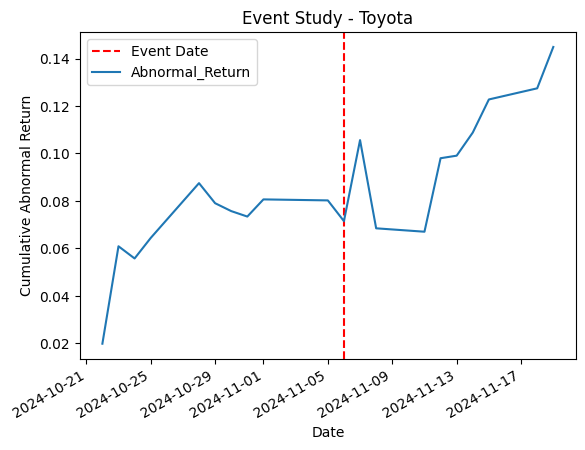

In [124]:
plot_cumulative_abnormal_returns(event_window, "Toyota")

## Ford

In [125]:
ford_df = prepare_stock_data('F', start_date, end_date)
ford_df

Open       High        Low      Close    Volume  Dividends  \
0      9.669354   9.693679   9.547727   9.614622  20602200        0.0   
1      9.614623   9.657192   9.578134   9.596378  15078700        0.0   
2      9.590297   9.620703   9.438263   9.444344  32248900        0.0   
3      9.492995   9.523402   9.365287   9.413938  26381200        0.0   
4      9.401775   9.462589   9.207172   9.432182  26996600        0.0   
...         ...        ...        ...        ...       ...        ...   
2406  11.010000  11.050000  10.610000  10.730000  68633300        0.0   
2407  10.780000  10.850000  10.610000  10.800000  53409500        0.0   
2408  10.810000  11.380000  10.800000  11.180000  82556700        0.0   
2409  11.300000  11.520000  11.280000  11.400000  63469300        0.0   
2410  11.160000  11.230000  11.040000  11.100000  47458800        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04 -0.001899  
2              0.0  2015-05-05 -0.015970  
3              0.0  2015-05-06 -0.003225  
4              0.0  2015-05-07  0.001936  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.029387  
2407           0.0  2024-11-21  0.006503  
2408           0.0  2024-11-22  0.034580  
2409           0.0  2024-11-25  0.019487  
2410           0.0  2024-11-26 -0.026668  

[2411 rows x 9 columns]

In [126]:
df_merge_ford = pd.merge(ford_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_ford['date'] = pd.to_datetime(df_merge_ford['date'])
df_merge_ford

Open       High        Low      Close    Volume  Dividends  \
0      9.614623   9.657192   9.578134   9.596378  15078700        0.0   
1      9.590297   9.620703   9.438263   9.444344  32248900        0.0   
2      9.492995   9.523402   9.365287   9.413938  26381200        0.0   
3      9.401775   9.462589   9.207172   9.432182  26996600        0.0   
4      9.499076   9.553808   9.480832   9.529483  21336800        0.0   
...         ...        ...        ...        ...       ...        ...   
2405  11.010000  11.050000  10.610000  10.730000  68633300        0.0   
2406  10.780000  10.850000  10.610000  10.800000  53409500        0.0   
2407  10.810000  11.380000  10.800000  11.180000  82556700        0.0   
2408  11.300000  11.520000  11.280000  11.400000  63469300        0.0   
2409  11.160000  11.230000  11.040000  11.100000  47458800        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04 -0.001899       0.002936  
1              0.0 2015-05-05 -0.015970      -0.011908  
2              0.0 2015-05-06 -0.003225      -0.004466  
3              0.0 2015-05-07  0.001936       0.003767  
4              0.0 2015-05-08  0.010263       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.029387       0.000022  
2406           0.0 2024-11-21  0.006503       0.005326  
2407           0.0 2024-11-22  0.034580       0.003462  
2408           0.0 2024-11-25  0.019487       0.003016  
2409           0.0 2024-11-26 -0.026668       0.005706  

[2410 rows x 10 columns]

In [127]:
event_window_ford = get_event_window(df_merge_ford,event_date)
print(len(event_window_ford))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_ford = get_estimation_window(df_merge_ford,event_date)
print(len(estimation_window_ford))

20
120


In [128]:
event_window_ford = calculate_abnormal_returns(event_window_ford, estimation_window_ford)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

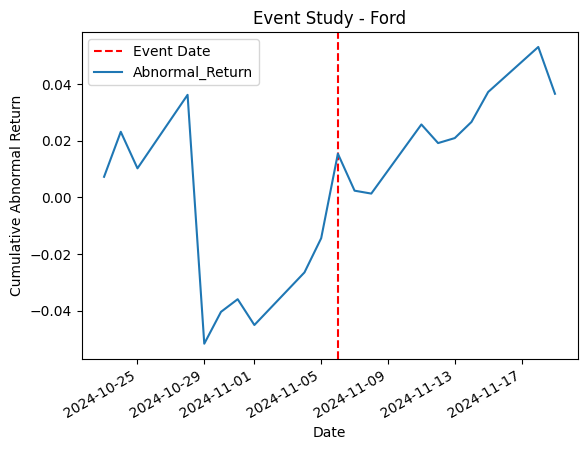

In [129]:
plot_cumulative_abnormal_returns(event_window_ford, "Ford")

## General Motors

In [130]:
gm_df = prepare_stock_data('GM', start_date, end_date)
gm_df

Open       High        Low      Close    Volume  Dividends  \
0     27.722571  27.959047  27.438805  27.919632  15307400        0.0   
1     27.982697  28.156112  27.903873  27.903873  12020100        0.0   
2     27.903869  27.998457  27.580689  27.596451  11068100        0.0   
3     27.698920  27.769862  27.233856  27.407270  13076200        0.0   
4     27.304806  27.612221  27.233864  27.493986  14033700        0.0   
...         ...        ...        ...        ...       ...        ...   
2406  55.000000  55.490002  54.580002  54.869999  12183700        0.0   
2407  55.200001  55.810001  54.730000  55.680000  11326700        0.0   
2408  55.740002  58.900002  55.650002  58.529999  14591700        0.0   
2409  59.160000  61.240002  58.900002  60.200001  25347300        0.0   
2410  57.650002  58.320000  54.730000  54.790001  25817300        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04 -0.000565  
2              0.0  2015-05-05 -0.011078  
3              0.0  2015-05-06 -0.006879  
4              0.0  2015-05-07  0.003159  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.004364  
2407           0.0  2024-11-21  0.014654  
2408           0.0  2024-11-22  0.049918  
2409           0.0  2024-11-25  0.028133  
2410           0.0  2024-11-26 -0.094165  

[2411 rows x 9 columns]

In [131]:
df_merge_gm = pd.merge(gm_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_gm['date'] = pd.to_datetime(df_merge_gm['date'])
df_merge_gm

Open       High        Low      Close    Volume  Dividends  \
0     27.982697  28.156112  27.903873  27.903873  12020100        0.0   
1     27.903869  27.998457  27.580689  27.596451  11068100        0.0   
2     27.698920  27.769862  27.233856  27.407270  13076200        0.0   
3     27.304806  27.612221  27.233864  27.493986  14033700        0.0   
4     27.627977  27.951157  27.612211  27.840803  12787000        0.0   
...         ...        ...        ...        ...       ...        ...   
2405  55.000000  55.490002  54.580002  54.869999  12183700        0.0   
2406  55.200001  55.810001  54.730000  55.680000  11326700        0.0   
2407  55.740002  58.900002  55.650002  58.529999  14591700        0.0   
2408  59.160000  61.240002  58.900002  60.200001  25347300        0.0   
2409  57.650002  58.320000  54.730000  54.790001  25817300        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04 -0.000565       0.002936  
1              0.0 2015-05-05 -0.011078      -0.011908  
2              0.0 2015-05-06 -0.006879      -0.004466  
3              0.0 2015-05-07  0.003159       0.003767  
4              0.0 2015-05-08  0.012535       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.004364       0.000022  
2406           0.0 2024-11-21  0.014654       0.005326  
2407           0.0 2024-11-22  0.049918       0.003462  
2408           0.0 2024-11-25  0.028133       0.003016  
2409           0.0 2024-11-26 -0.094165       0.005706  

[2410 rows x 10 columns]

In [132]:
event_window_gm = get_event_window(df_merge_gm,event_date)
print(len(event_window_gm))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_gm = get_estimation_window(df_merge_gm,event_date)
print(len(estimation_window_gm))

20
120


In [133]:
event_window_gm = calculate_abnormal_returns(event_window_gm, estimation_window_gm)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

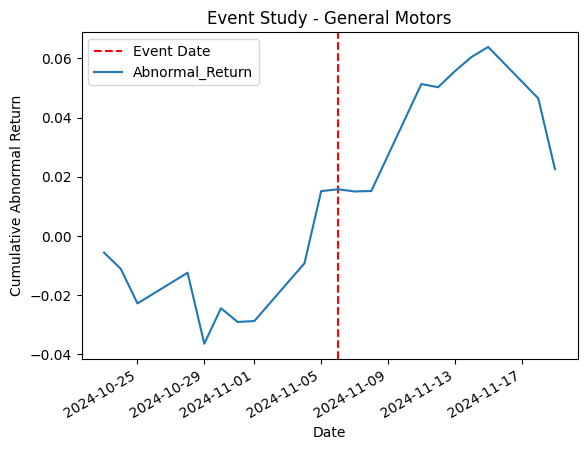

In [134]:
plot_cumulative_abnormal_returns(event_window_gm, "General Motors")

## Volkswagen

In [135]:
vow_df = prepare_stock_data('VOW.DE', start_date, end_date)
vow_df

Open        High         Low       Close  Volume  Dividends  \
0     141.058878  141.705656  138.132984  140.104111   50799        0.0   
1     139.826955  142.845242  138.317811  138.656601   75494        0.0   
2     139.411866  140.293021  134.093447  136.957214  103595        4.8   
3     135.635490  140.041283  135.635490  138.845428   92932        0.0   
4     140.733620  142.275645  138.751007  141.835068   97421        0.0   
...          ...         ...         ...         ...     ...        ...   
2433   85.449997   85.800003   84.150002   84.250000   58660        0.0   
2434   84.099998   84.250000   83.250000   83.599998   52559        0.0   
2435   83.650002   84.449997   82.500000   84.000000   81117        0.0   
2436   84.000000   84.000000   84.000000   84.000000       0        0.0   
2437   83.300003   83.349998   82.300003   82.650002  100042        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-04       NaN  
1              0.0  2015-05-05 -0.010385  
2              0.0  2015-05-06 -0.012332  
3              0.0  2015-05-07  0.013693  
4              0.0  2015-05-08  0.021304  
...            ...         ...       ...  
2433           0.0  2024-11-20 -0.015897  
2434           0.0  2024-11-21 -0.007745  
2435           0.0  2024-11-22  0.004773  
2436           0.0  2024-11-25  0.000000  
2437           0.0  2024-11-26 -0.016202  

[2438 rows x 9 columns]

In [136]:
dax_index_data = prepare_market_data("^GDAXI",start_date, end_date)
dax_index_data

Open          High           Low         Close     Volume  \
0     11506.839844  11656.889648  11411.769531  11619.849609   80328700   
1     11576.120117  11751.219727  11322.620117  11327.679688  121580000   
2     11377.580078  11457.929688  11239.860352  11350.150391  101726700   
3     11265.129883  11437.570312  11167.549805  11407.969727  119253400   
4     11483.070312  11710.410156  11415.290039  11709.730469  111159500   
...            ...           ...           ...           ...        ...   
2428  19153.029297  19198.740234  18962.189453  19004.779297   53795400   
2429  19060.919922  19152.609375  18900.019531  19146.169922   55646800   
2430  19240.230469  19338.099609  19036.410156  19322.589844   71164000   
2431  19462.240234  19468.300781  19329.880859  19405.199219  121851800   
2432  19309.160156  19385.349609  19239.369141  19295.980469   60758200   

      Dividends  Stock Splits        date  Market Return  
0           0.0           0.0  2015-05-04            NaN  
1           0.0           0.0  2015-05-05      -0.025466  
2           0.0           0.0  2015-05-06       0.001982  
3           0.0           0.0  2015-05-07       0.005081  
4           0.0           0.0  2015-05-08       0.026108  
...         ...           ...         ...            ...  
2428        0.0           0.0  2024-11-20      -0.002918  
2429        0.0           0.0  2024-11-21       0.007412  
2430        0.0           0.0  2024-11-22       0.009172  
2431        0.0           0.0  2024-11-25       0.004266  
2432        0.0           0.0  2024-11-26      -0.005644  

[2433 rows x 9 columns]

In [137]:
df_merge_vow = pd.merge(vow_df, dax_index_data[['date','Market Return']] ,left_on='date',right_on='date', how='left').dropna().reset_index(drop=True)
df_merge_vow['date'] = pd.to_datetime(df_merge_vow['date'])
df_merge_vow

Open        High         Low       Close  Volume  Dividends  \
0     139.826955  142.845242  138.317811  138.656601   75494        0.0   
1     139.411866  140.293021  134.093447  136.957214  103595        4.8   
2     135.635490  140.041283  135.635490  138.845428   92932        0.0   
3     140.733620  142.275645  138.751007  141.835068   97421        0.0   
4     141.016847  141.992417  140.890969  141.835068   81298        0.0   
...          ...         ...         ...         ...     ...        ...   
2427   85.449997   85.800003   84.150002   84.250000   58660        0.0   
2428   84.099998   84.250000   83.250000   83.599998   52559        0.0   
2429   83.650002   84.449997   82.500000   84.000000   81117        0.0   
2430   84.000000   84.000000   84.000000   84.000000       0        0.0   
2431   83.300003   83.349998   82.300003   82.650002  100042        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-05 -0.010385      -0.025466  
1              0.0 2015-05-06 -0.012332       0.001982  
2              0.0 2015-05-07  0.013693       0.005081  
3              0.0 2015-05-08  0.021304       0.026108  
4              0.0 2015-05-11  0.000000      -0.003112  
...            ...        ...       ...            ...  
2427           0.0 2024-11-20 -0.015897      -0.002918  
2428           0.0 2024-11-21 -0.007745       0.007412  
2429           0.0 2024-11-22  0.004773       0.009172  
2430           0.0 2024-11-25  0.000000       0.004266  
2431           0.0 2024-11-26 -0.016202      -0.005644  

[2432 rows x 10 columns]

In [138]:
event_window_vow = get_event_window(df_merge_vow,event_date)
print(len(event_window_vow))
event_estimation_vow = get_estimation_window(df_merge_vow,event_date)
print(len(event_estimation_vow))

20
120


In [139]:
event_window_vow = calculate_abnormal_returns(event_window_vow, event_estimation_vow)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

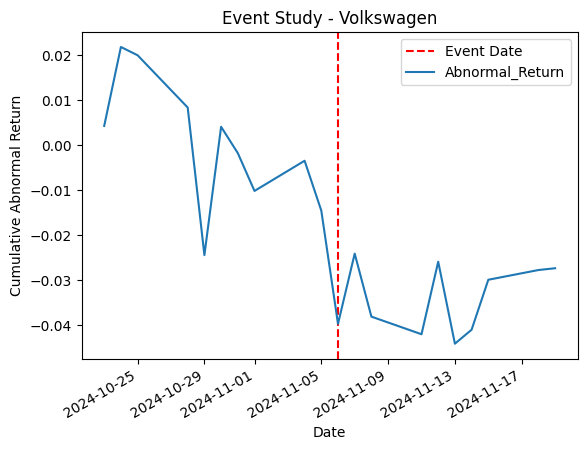

In [140]:
plot_cumulative_abnormal_returns(event_window_vow, "Volkswagen")

## BMW

In [141]:
bmw_df = prepare_stock_data('BMW.DE', start_date, end_date)
bmw_df

Open       High        Low      Close   Volume  Dividends  \
0     63.474040  64.156557  62.465104  63.355343  1417230        0.0   
1     63.325644  64.868728  62.910201  63.206947  2045175        0.0   
2     63.206953  64.364261  60.239490  61.782570  3585784        0.0   
3     61.485845  62.465109  60.536258  62.079338  2172455        0.0   
4     62.791521  64.987442  62.079327  64.987442  2848869        0.0   
...         ...        ...        ...        ...      ...        ...   
2433  69.199997  69.459999  68.320000  68.500000   972719        0.0   
2434  68.379997  68.400002  66.680000  67.940002  1051453        0.0   
2435  67.919998  68.279999  66.519997  67.800003  1008051        0.0   
2436  67.800003  67.800003  67.800003  67.800003        0        0.0   
2437  68.220001  68.959999  67.519997  68.480003  1033213        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-04       NaN  
1              0.0  2015-05-05 -0.002345  
2              0.0  2015-05-06 -0.022793  
3              0.0  2015-05-07  0.004792  
4              0.0  2015-05-08  0.045781  
...            ...         ...       ...  
2433           0.0  2024-11-20 -0.008142  
2434           0.0  2024-11-21 -0.008209  
2435           0.0  2024-11-22 -0.002063  
2436           0.0  2024-11-25  0.000000  
2437           0.0  2024-11-26  0.009980  

[2438 rows x 9 columns]

In [142]:
df_merge_bmw = pd.merge(bmw_df, dax_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_bmw['date'] = pd.to_datetime(df_merge_bmw['date'])
df_merge_bmw

Open       High        Low      Close   Volume  Dividends  \
0     63.325644  64.868728  62.910201  63.206947  2045175        0.0   
1     63.206953  64.364261  60.239490  61.782570  3585784        0.0   
2     61.485845  62.465109  60.536258  62.079338  2172455        0.0   
3     62.791521  64.987442  62.079327  64.987442  2848869        0.0   
4     65.224839  65.284187  64.215898  64.868744  1548211        0.0   
...         ...        ...        ...        ...      ...        ...   
2427  69.199997  69.459999  68.320000  68.500000   972719        0.0   
2428  68.379997  68.400002  66.680000  67.940002  1051453        0.0   
2429  67.919998  68.279999  66.519997  67.800003  1008051        0.0   
2430  67.800003  67.800003  67.800003  67.800003        0        0.0   
2431  68.220001  68.959999  67.519997  68.480003  1033213        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-05 -0.002345      -0.025466  
1              0.0 2015-05-06 -0.022793       0.001982  
2              0.0 2015-05-07  0.004792       0.005081  
3              0.0 2015-05-08  0.045781       0.026108  
4              0.0 2015-05-11 -0.001828      -0.003112  
...            ...        ...       ...            ...  
2427           0.0 2024-11-20 -0.008142      -0.002918  
2428           0.0 2024-11-21 -0.008209       0.007412  
2429           0.0 2024-11-22 -0.002063       0.009172  
2430           0.0 2024-11-25  0.000000       0.004266  
2431           0.0 2024-11-26  0.009980      -0.005644  

[2432 rows x 10 columns]

In [143]:
event_window_bmw = get_event_window(df_merge_bmw,event_date)
print(len(event_window_bmw))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_bmw = get_estimation_window(df_merge_bmw,event_date)
print(len(estimation_window_bmw))

20
120


In [144]:
event_window_bmw = calculate_abnormal_returns(event_window_bmw, estimation_window_bmw)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

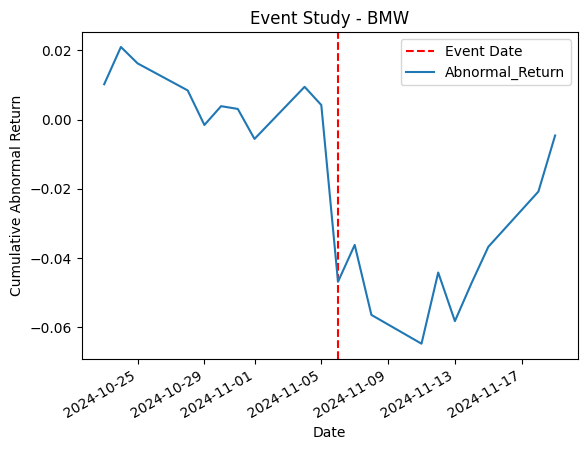

In [145]:
plot_cumulative_abnormal_returns(event_window_bmw, "BMW")

## Tesla

In [146]:
tesla_df = prepare_stock_data('TSLA', start_date, end_date)
tesla_df

Open        High         Low       Close     Volume  Dividends  \
0      15.329333   15.451333   14.694000   15.068667   79225500        0.0   
1      15.212000   15.648667   15.140667   15.367333   66519000        0.0   
2      15.850667   15.966667   15.275333   15.530000   86953500        0.0   
3      15.606667   15.631333   15.213333   15.362000   79063500        0.0   
4      14.733333   15.832000   14.683333   15.786667  141838500        0.0   
...          ...         ...         ...         ...        ...        ...   
2406  345.000000  346.600006  334.299988  342.029999   66340700        0.0   
2407  343.809998  347.989990  335.279999  339.640015   58011700        0.0   
2408  341.089996  361.529999  337.700012  352.559998   89140700        0.0   
2409  360.140015  361.929993  338.200012  338.589996   95890900        0.0   
2410  341.000000  346.959991  335.660004  338.230011   62295900        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.019626  
2              0.0  2015-05-05  0.010530  
3              0.0  2015-05-06 -0.010877  
4              0.0  2015-05-07  0.027269  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.011540  
2407           0.0  2024-11-21 -0.007012  
2408           0.0  2024-11-22  0.037335  
2409           0.0  2024-11-25 -0.040431  
2410           0.0  2024-11-26 -0.001064  

[2411 rows x 9 columns]

In [147]:
df_merge_tesla = pd.merge(tesla_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_tesla['date'] = pd.to_datetime(df_merge_tesla['date'])
df_merge_tesla

Open        High         Low       Close     Volume  Dividends  \
0      15.212000   15.648667   15.140667   15.367333   66519000        0.0   
1      15.850667   15.966667   15.275333   15.530000   86953500        0.0   
2      15.606667   15.631333   15.213333   15.362000   79063500        0.0   
3      14.733333   15.832000   14.683333   15.786667  141838500        0.0   
4      15.732667   15.894000   15.580000   15.774000   70023000        0.0   
...          ...         ...         ...         ...        ...        ...   
2405  345.000000  346.600006  334.299988  342.029999   66340700        0.0   
2406  343.809998  347.989990  335.279999  339.640015   58011700        0.0   
2407  341.089996  361.529999  337.700012  352.559998   89140700        0.0   
2408  360.140015  361.929993  338.200012  338.589996   95890900        0.0   
2409  341.000000  346.959991  335.660004  338.230011   62295900        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.019626       0.002936  
1              0.0 2015-05-05  0.010530      -0.011908  
2              0.0 2015-05-06 -0.010877      -0.004466  
3              0.0 2015-05-07  0.027269       0.003767  
4              0.0 2015-05-08 -0.000803       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.011540       0.000022  
2406           0.0 2024-11-21 -0.007012       0.005326  
2407           0.0 2024-11-22  0.037335       0.003462  
2408           0.0 2024-11-25 -0.040431       0.003016  
2409           0.0 2024-11-26 -0.001064       0.005706  

[2410 rows x 10 columns]

In [148]:
df_merge_tesla[df_merge_tesla['date'] == event_date]

Open        High         Low       Close     Volume  Dividends  \
2395  284.670013  289.589996  275.619995  288.529999  165228700        0.0   

      Stock Splits       date    Return  Market Return  
2395           0.0 2024-11-06  0.137595       0.024981

In [149]:
event_window_tesla = get_event_window(df_merge_tesla,event_date)
print(len(event_window_tesla))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_tesla = get_estimation_window(df_merge_tesla,event_date)
print(len(estimation_window_tesla))

20
120


In [150]:
event_window_tesla = calculate_abnormal_returns(event_window_tesla, estimation_window_tesla)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

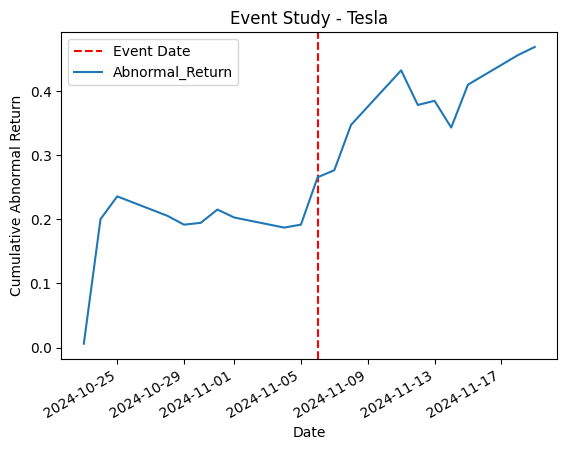

In [151]:
plot_cumulative_abnormal_returns(event_window_tesla, "Tesla")

## Honda

In [152]:
honda_df = prepare_stock_data('7267.T', start_date, end_date)

In [153]:
df_merge_honda = pd.merge(honda_df, index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_honda['date'] = pd.to_datetime(df_merge_honda['date'])
df_merge_honda

Open         High          Low        Close    Volume  Dividends  \
0      973.040587   982.159152   967.041628   981.199280  15477600        0.0   
1      991.037503  1012.274021   989.837729  1003.875427  18307500        0.0   
2     1019.832725  1026.311663  1010.234358  1010.354309  10732500        0.0   
3     1007.834684  1009.514437   986.358177  1000.875854  11258700        0.0   
4      995.597004  1006.755177   988.158193  1005.675354   9603000        0.0   
...           ...          ...          ...          ...       ...        ...   
2334  1387.000000  1390.500000  1360.500000  1364.500000  16851200        0.0   
2335  1360.000000  1365.500000  1343.000000  1345.500000  16086800        0.0   
2336  1364.000000  1369.000000  1356.000000  1362.500000  13419700        0.0   
2337  1382.000000  1382.000000  1358.500000  1358.500000  37222300        0.0   
2338  1359.500000  1363.500000  1315.000000  1333.000000  26074400        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-07 -0.002565      -0.012345  
1              0.0 2015-05-08  0.022848       0.004510  
2              0.0 2015-05-11  0.006433       0.012396  
3              0.0 2015-05-12 -0.009426       0.000200  
4              0.0 2015-05-13  0.004784       0.007102  
...            ...        ...       ...            ...  
2334           0.0 2024-11-20 -0.021748      -0.001618  
2335           0.0 2024-11-21 -0.014022      -0.008541  
2336           0.0 2024-11-22  0.012556       0.006754  
2337           0.0 2024-11-25 -0.002940       0.012880  
2338           0.0 2024-11-26 -0.018949      -0.008758  

[2339 rows x 10 columns]

In [154]:
df_merge_honda[df_merge_honda['date'] == event_date]

Open    High     Low   Close    Volume  Dividends  Stock Splits  \
2324  1511.0  1549.5  1391.5  1418.0  50754600        0.0           0.0   

           date    Return  Market Return  
2324 2024-11-06 -0.066828       0.025805

In [155]:
event_window_honda = get_event_window(df_merge_honda,event_date)
print(len(event_window_honda))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_honda = get_estimation_window(df_merge_honda,event_date)
print(len(estimation_window_honda))

20
120


In [156]:
event_window_honda = calculate_abnormal_returns(event_window_honda, estimation_window_honda)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

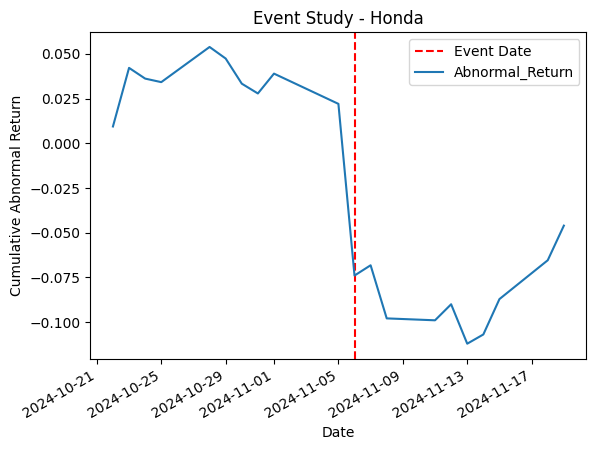

In [157]:
plot_cumulative_abnormal_returns(event_window_honda, "Honda")

## Nissan

In [158]:
nissan_df = prepare_stock_data('7201.T', start_date, end_date)

In [159]:
df_merge_nissan = pd.merge(nissan_df, index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_nissan['date'] = pd.to_datetime(df_merge_nissan['date'])
df_merge_nissan

Open        High         Low       Close    Volume  Dividends  \
0     930.822045  941.198674  921.214055  940.045715  11924600        0.0   
1     940.045878  952.728427  935.434042  949.653870   9451600        0.0   
2     970.022724  984.626870  963.104971  965.410889   9336200        0.0   
3     968.485295  970.022573  956.955708  967.332336   6814200        0.0   
4     955.034269  961.183383  949.269474  958.108826  10287800        0.0   
...          ...         ...         ...         ...       ...        ...   
2334  423.500000  427.600006  415.700012  419.399994  27265600        0.0   
2335  415.799988  419.200012  409.399994  412.000000  27107400        0.0   
2336  410.000000  413.000000  406.200012  406.299988  25701900        0.0   
2337  408.799988  410.799988  405.399994  406.899994  35858400        0.0   
2338  405.000000  408.500000  387.100006  392.100006  90834400        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-07 -0.015819      -0.012345  
1              0.0 2015-05-08  0.010169       0.004510  
2              0.0 2015-05-11  0.016456       0.012396  
3              0.0 2015-05-12  0.001988       0.000200  
4              0.0 2015-05-13 -0.009581       0.007102  
...            ...        ...       ...            ...  
2334           0.0 2024-11-20 -0.021932      -0.001618  
2335           0.0 2024-11-21 -0.017802      -0.008541  
2336           0.0 2024-11-22 -0.013932       0.006754  
2337           0.0 2024-11-25  0.001476       0.012880  
2338           0.0 2024-11-26 -0.037051      -0.008758  

[2339 rows x 10 columns]

In [160]:
event_window_nissan = get_event_window(df_merge_nissan,event_date)
print(len(event_window_nissan))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_nissan = get_estimation_window(df_merge_nissan,event_date)
print(len(estimation_window_nissan))

20
120


In [161]:
event_window_nissan = calculate_abnormal_returns(event_window_nissan, estimation_window_nissan)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

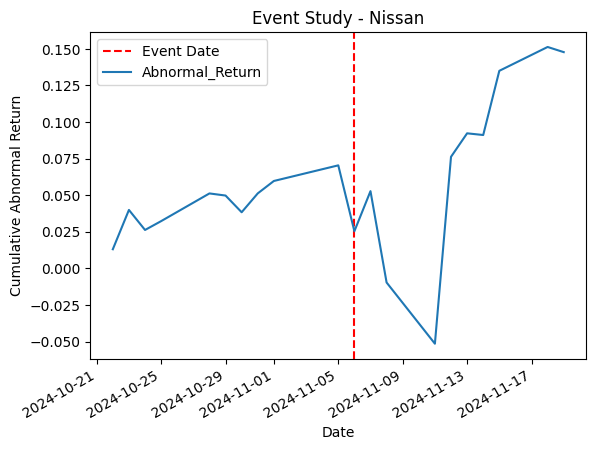

In [162]:
plot_cumulative_abnormal_returns(event_window_nissan, "Nissan")

## BYD

In [163]:
byd_df = prepare_stock_data('1211.HK', start_date, end_date)

In [164]:
hang_seng_index = prepare_market_data("^HSI",start_date, end_date)

In [165]:
df_merge_byd = pd.merge(byd_df, hang_seng_index[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_byd['date'] = pd.to_datetime(df_merge_byd['date'])
df_merge_byd

Open        High         Low       Close    Volume  Dividends  \
0      47.069360   47.165028   44.629791   45.395145   5795199        0.0   
1      44.773299   46.112672   44.486291   44.821133   5312264        0.0   
2      43.864436   44.677628   43.242587   43.529594   5240500        0.0   
3      44.294946   45.395146   43.625259   45.012466   6126095        0.0   
4      44.964638   47.308541   44.916805   46.925861  10098022        0.0   
...          ...         ...         ...         ...       ...        ...   
2350  267.799988  270.000000  264.000000  265.399994   3621739        0.0   
2351  265.399994  266.600006  262.200012  264.799988   3327449        0.0   
2352  266.000000  267.200012  257.200012  258.600006   5450403        0.0   
2353  262.600006  267.200012  258.600006  259.600006   6827359        0.0   
2354  255.800003  259.000000  254.199997  257.000000   4953448        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-05 -0.003156      -0.013181  
1              0.0 2015-05-06 -0.012725      -0.004138  
2              0.0 2015-05-07 -0.029239      -0.012778  
3              0.0 2015-05-08  0.033498       0.010475  
4              0.0 2015-05-11  0.041629       0.005095  
...            ...        ...       ...            ...  
2350           0.0 2024-11-20 -0.011985       0.002100  
2351           0.0 2024-11-21 -0.002263      -0.005287  
2352           0.0 2024-11-22 -0.023692      -0.019116  
2353           0.0 2024-11-25  0.003860      -0.004116  
2354           0.0 2024-11-26 -0.010066       0.000429  

[2355 rows x 10 columns]

In [166]:
event_window_byd = get_event_window(df_merge_byd,event_date)
print(len(event_window_byd))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_byd = get_estimation_window(df_merge_byd,event_date)
print(len(estimation_window_byd))

20
120


In [167]:
event_window_byd = calculate_abnormal_returns(event_window_byd, estimation_window_byd)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

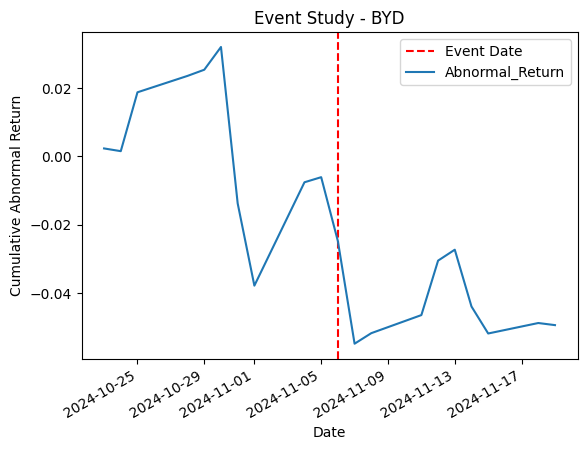

In [168]:
plot_cumulative_abnormal_returns(event_window_byd, "BYD")

## Mazda

In [169]:
mazda_df = prepare_stock_data('7261.T', start_date, end_date)

In [170]:
df_merge_mazda = pd.merge(mazda_df, index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_mazda['date'] = pd.to_datetime(df_merge_mazda['date'])
df_merge_mazda

Open         High          Low        Close    Volume  Dividends  \
0     1851.345815  1890.628573  1840.844484  1879.349365  10056700        0.0   
1     1887.128174  1924.855180  1875.848966  1912.798096   8511300        0.0   
2     1969.583265  1986.696548  1944.691217  1945.858032  10958400        0.0   
3     1929.911476  1952.469893  1905.797306  1951.692017   6043800        0.0   
4     1944.690864  1962.582020  1926.410770  1960.637329   5582300        0.0   
...           ...          ...          ...          ...       ...        ...   
2334  1026.000000  1030.000000  1001.000000  1006.000000   7625100        0.0   
2335   998.700012  1008.500000   994.700012  1005.500000   8590400        0.0   
2336   999.799988  1005.500000   995.099976  1003.000000   9829100        0.0   
2337  1012.500000  1022.000000   999.000000  1001.000000  45376600        0.0   
2338  1000.000000  1014.500000   980.099976   999.900024  18598100        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-07  0.020490      -0.012345  
1              0.0 2015-05-08  0.017642       0.004510  
2              0.0 2015-05-11  0.017136       0.012396  
3              0.0 2015-05-12  0.002994       0.000200  
4              0.0 2015-05-13  0.004573       0.007102  
...            ...        ...       ...            ...  
2334           0.0 2024-11-20 -0.025032      -0.001618  
2335           0.0 2024-11-21 -0.000497      -0.008541  
2336           0.0 2024-11-22 -0.002489       0.006754  
2337           0.0 2024-11-25 -0.001996       0.012880  
2338           0.0 2024-11-26 -0.001099      -0.008758  

[2339 rows x 10 columns]

In [171]:
event_window_mazda = get_event_window(df_merge_mazda,event_date)
print(len(event_window_mazda))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_mazda = get_estimation_window(df_merge_mazda,event_date)
print(len(estimation_window_mazda))

20
120


In [172]:
event_window_mazda = calculate_abnormal_returns(event_window_mazda, estimation_window_mazda)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

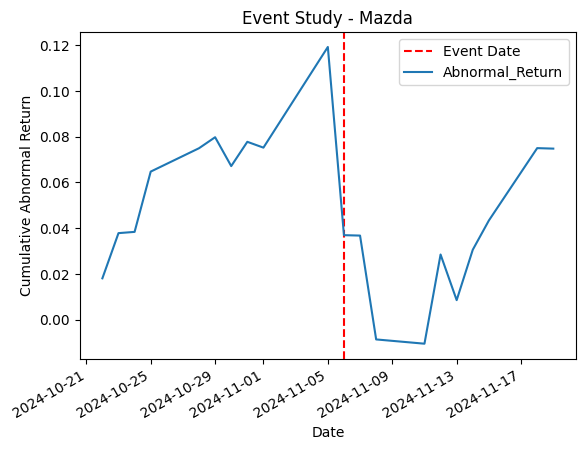

In [173]:
plot_cumulative_abnormal_returns(event_window_mazda, "Mazda")

## Apple

In [174]:
apple_df = prepare_stock_data('AAPL', start_date, end_date)

In [175]:
df_merge_apple = pd.merge(apple_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_apple['date'] = pd.to_datetime(df_merge_apple['date'])
df_merge_apple

Open        High         Low       Close     Volume  Dividends  \
0      28.952734   29.191959   28.675502   28.773874  203953200       0.00   
1      28.650906   28.717979   28.121039   28.125511  197085600       0.00   
2      28.295424   28.337904   27.579991   27.948887  288564000       0.00   
3      28.011750   28.305855   27.843369   28.121759  175763600       0.13   
4      28.440561   28.651598   28.312592   28.651598  222201600       0.00   
...          ...         ...         ...         ...        ...        ...   
2405  228.059998  229.929993  225.889999  229.000000   35169600       0.00   
2406  228.880005  230.160004  225.710007  228.520004   42108300       0.00   
2407  228.059998  230.720001  228.059998  229.869995   38168300       0.00   
2408  231.460007  233.250000  229.740005  232.869995   90152800       0.00   
2409  233.330002  235.570007  233.330002  235.059998   45986200       0.00   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04 -0.001941       0.002936  
1              0.0 2015-05-05 -0.022791      -0.011908  
2              0.0 2015-05-06 -0.006300      -0.004466  
3              0.0 2015-05-07  0.006166       0.003767  
4              0.0 2015-05-08  0.018666       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20  0.003149       0.000022  
2406           0.0 2024-11-21 -0.002098       0.005326  
2407           0.0 2024-11-22  0.005890       0.003462  
2408           0.0 2024-11-25  0.012966       0.003016  
2409           0.0 2024-11-26  0.009360       0.005706  

[2410 rows x 10 columns]

In [176]:
#event_date = pd.to_datetime('2022-11-30')
#event_date = pd.to_datetime('2024-06-03')

df_merge_apple[df_merge_apple['date'] == event_date]

Open        High         Low       Close    Volume  Dividends  \
2395  222.365355  225.821559  220.946918  222.475235  54561100        0.0   

      Stock Splits       date    Return  Market Return  
2395           0.0 2024-11-06 -0.003272       0.024981

In [177]:
event_window_apple = get_event_window(df_merge_apple,event_date)
print(len(event_window_apple))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_apple = get_estimation_window(df_merge_apple,event_date)
print(len(estimation_window_apple))

20
120


In [178]:
event_window_apple = calculate_abnormal_returns(event_window_apple, estimation_window_apple)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

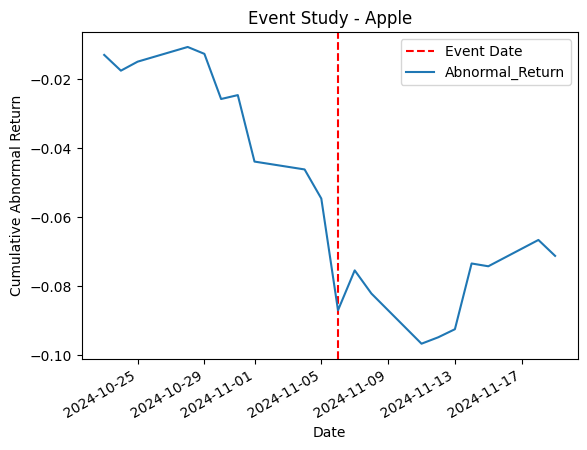

In [179]:
plot_cumulative_abnormal_returns(event_window_apple, "Apple")

## Amazon

In [180]:
amazon_df = prepare_stock_data('AMZN', start_date, end_date)

In [181]:
df_merge_amazon = pd.merge(amazon_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_amazon['date'] = pd.to_datetime(df_merge_amazon['date'])
df_merge_amazon

Open        High         Low       Close    Volume  Dividends  \
0      21.240000   21.488501   21.121000   21.152000  45408000        0.0   
1      21.142500   21.375500   21.051001   21.059500  57128000        0.0   
2      21.071501   21.136000   20.727501   20.955000  51050000        0.0   
3      21.207500   21.424999   21.142500   21.344000  55322000        0.0   
4      21.537500   21.760000   21.508499   21.684500  58176000        0.0   
...          ...         ...         ...         ...       ...        ...   
2405  202.979996  203.130005  199.449997  202.880005  32769000        0.0   
2406  203.490005  203.490005  195.750000  198.380005  58800000        0.0   
2407  198.250000  199.259995  196.750000  197.119995  31530800        0.0   
2408  199.279999  201.949997  199.000000  201.449997  40685700        0.0   
2409  201.899994  208.000000  201.789993  207.860001  41673700        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.000402       0.002936  
1              0.0 2015-05-05 -0.004383      -0.011908  
2              0.0 2015-05-06 -0.004974      -0.004466  
3              0.0 2015-05-07  0.018393       0.003767  
4              0.0 2015-05-08  0.015827       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.008491       0.000022  
2406           0.0 2024-11-21 -0.022430       0.005326  
2407           0.0 2024-11-22 -0.006372       0.003462  
2408           0.0 2024-11-25  0.021729       0.003016  
2409           0.0 2024-11-26  0.031324       0.005706  

[2410 rows x 10 columns]

In [182]:
#event_date = pd.to_datetime('2022-11-10')

df_merge_amazon[df_merge_amazon['date'] == event_date]

Open        High         Low       Close    Volume  Dividends  \
2395  200.009995  207.550003  199.139999  207.089996  72292200        0.0   

      Stock Splits       date    Return  Market Return  
2395           0.0 2024-11-06  0.037339       0.024981

In [183]:
event_window_amazon = get_event_window(df_merge_amazon, event_date)
print(len(event_window_amazon))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_amazon = get_estimation_window(df_merge_amazon, event_date)
print(len(estimation_window_amazon))

20
120


In [184]:
event_window_amazon = calculate_abnormal_returns(event_window_amazon, estimation_window_amazon)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

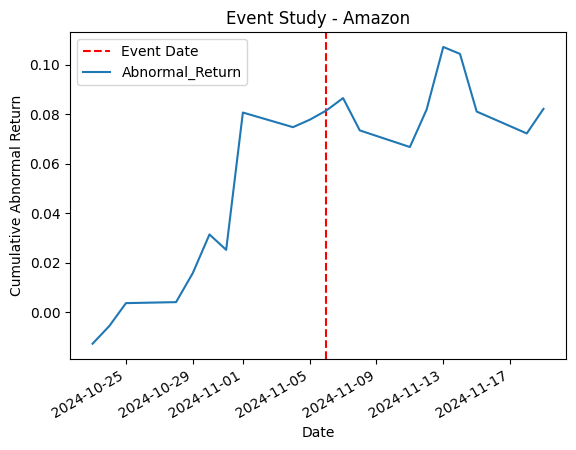

In [185]:
plot_cumulative_abnormal_returns(event_window_amazon, "Amazon")

## Google

In [186]:
google_df = prepare_stock_data('GOOGL', start_date, end_date)

In [187]:
df_merge_google = pd.merge(google_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_google['date'] = pd.to_datetime(df_merge_google['date'])
df_merge_google

Open        High         Low       Close    Volume  Dividends  \
0      27.481451   27.765747   27.301895   27.573723  35260000        0.0   
1      27.440052   27.562251   27.051514   27.084932  28528000        0.0   
2      27.064982   27.129324   26.546266   26.687916  39034000        0.0   
3      26.728814   27.192666   26.606617   27.035055  31844000        0.0   
4      27.375714   27.571727   27.333818   27.379704  28226000        0.0   
...          ...         ...         ...         ...       ...        ...   
2405  177.339996  177.679993  173.779999  175.979996  18997100        0.0   
2406  173.899994  174.130005  163.699997  167.630005  59734400        0.0   
2407  165.850006  166.460007  163.899994  164.759995  38604600        0.0   
2408  166.089996  168.630005  165.610001  167.649994  33135300        0.0   
2409  167.630005  169.820007  167.580002  169.119995  20486700        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.003043       0.002936  
1              0.0 2015-05-05 -0.017886      -0.011908  
2              0.0 2015-05-06 -0.014767      -0.004466  
3              0.0 2015-05-07  0.012923       0.003767  
4              0.0 2015-05-08  0.012668       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.012087       0.000022  
2406           0.0 2024-11-21 -0.048611       0.005326  
2407           0.0 2024-11-22 -0.017269       0.003462  
2408           0.0 2024-11-25  0.017389       0.003016  
2409           0.0 2024-11-26  0.008730       0.005706  

[2410 rows x 10 columns]

In [188]:
event_window_google = get_event_window(df_merge_google, event_date)
print(len(event_window_google))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_google = get_estimation_window(df_merge_google, event_date)
print(len(estimation_window_google))

20
120


In [189]:
event_window_google = calculate_abnormal_returns(event_window_google, estimation_window_google)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

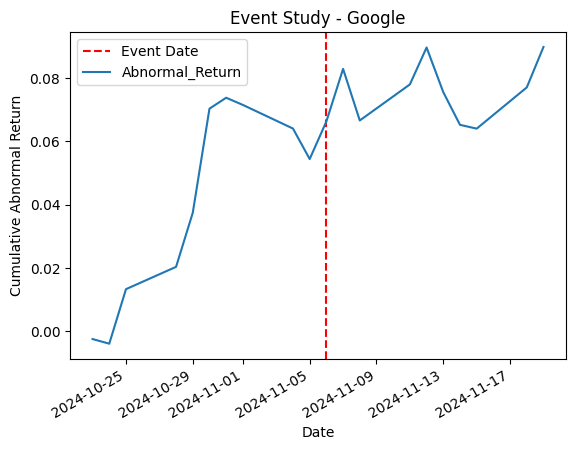

In [190]:
plot_cumulative_abnormal_returns(event_window_google, "Google")

## Microsoft

In [191]:
msft_df = prepare_stock_data('MSFT', start_date, end_date)

In [192]:
df_merge_msft = pd.merge(msft_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_msft['date'] = pd.to_datetime(df_merge_msft['date'])
df_merge_msft

Open        High         Low       Close    Volume  Dividends  \
0      41.830566   42.262968   41.666254   41.718143  34039500       0.00   
1      41.354931   41.648964   40.913882   41.164673  50369200       0.00   
2      41.138730   41.311692   39.798285   40.023132  52433000       0.00   
3      40.014483   40.723622   39.919354   40.386349  32971700       0.00   
4      41.121419   41.493285   41.095476   41.294380  35364900       0.00   
...          ...         ...         ...         ...       ...        ...   
2405  416.037221  416.456396  409.759778  414.659973  19191700       0.00   
2406  419.500000  419.779999  410.290009  412.869995  20780200       0.83   
2407  411.369995  417.399994  411.059998  417.000000  24814600       0.00   
2408  418.380005  421.079987  414.850006  418.790009  27691100       0.00   
2409  419.589996  429.040009  418.850006  427.989990  23458900       0.00   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04 -0.008668       0.002936  
1              0.0 2015-05-05 -0.013356      -0.011908  
2              0.0 2015-05-06 -0.028123      -0.004466  
3              0.0 2015-05-07  0.009034       0.003767  
4              0.0 2015-05-08  0.022235       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.005520       0.000022  
2406           0.0 2024-11-21 -0.004326       0.005326  
2407           0.0 2024-11-22  0.009953       0.003462  
2408           0.0 2024-11-25  0.004283       0.003016  
2409           0.0 2024-11-26  0.021730       0.005706  

[2410 rows x 10 columns]

In [193]:
event_window_msft = get_event_window(df_merge_msft, event_date)
print(len(event_window_msft))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_msft = get_estimation_window(df_merge_msft, event_date)
print(len(estimation_window_msft))

20
120


In [194]:
event_window_msft = calculate_abnormal_returns(event_window_msft, estimation_window_msft)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

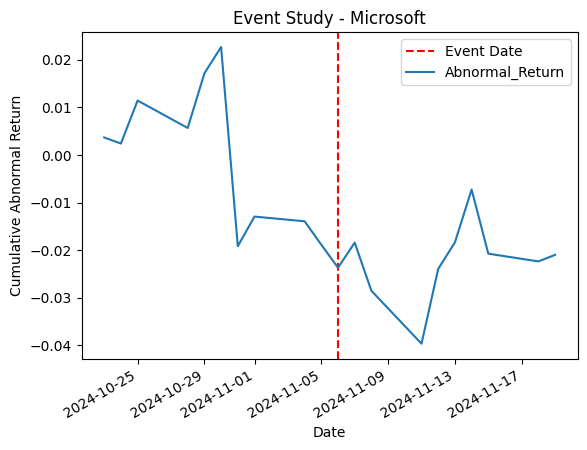

In [195]:
plot_cumulative_abnormal_returns(event_window_msft, "Microsoft")

In [196]:
tesla_df = prepare_stock_data('TSLA', start_date, end_date)
tesla_df

Open        High         Low       Close     Volume  Dividends  \
0      15.329333   15.451333   14.694000   15.068667   79225500        0.0   
1      15.212000   15.648667   15.140667   15.367333   66519000        0.0   
2      15.850667   15.966667   15.275333   15.530000   86953500        0.0   
3      15.606667   15.631333   15.213333   15.362000   79063500        0.0   
4      14.733333   15.832000   14.683333   15.786667  141838500        0.0   
...          ...         ...         ...         ...        ...        ...   
2406  345.000000  346.600006  334.299988  342.029999   66340700        0.0   
2407  343.809998  347.989990  335.279999  339.640015   58011700        0.0   
2408  341.089996  361.529999  337.700012  352.559998   89140700        0.0   
2409  360.140015  361.929993  338.200012  338.589996   95890900        0.0   
2410  341.000000  346.959991  335.660004  338.230011   62295900        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.019626  
2              0.0  2015-05-05  0.010530  
3              0.0  2015-05-06 -0.010877  
4              0.0  2015-05-07  0.027269  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.011540  
2407           0.0  2024-11-21 -0.007012  
2408           0.0  2024-11-22  0.037335  
2409           0.0  2024-11-25 -0.040431  
2410           0.0  2024-11-26 -0.001064  

[2411 rows x 9 columns]

In [197]:
df_merge_tesla = pd.merge(tesla_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_tesla['date'] = pd.to_datetime(df_merge_tesla['date'])
df_merge_tesla

Open        High         Low       Close     Volume  Dividends  \
0      15.212000   15.648667   15.140667   15.367333   66519000        0.0   
1      15.850667   15.966667   15.275333   15.530000   86953500        0.0   
2      15.606667   15.631333   15.213333   15.362000   79063500        0.0   
3      14.733333   15.832000   14.683333   15.786667  141838500        0.0   
4      15.732667   15.894000   15.580000   15.774000   70023000        0.0   
...          ...         ...         ...         ...        ...        ...   
2405  345.000000  346.600006  334.299988  342.029999   66340700        0.0   
2406  343.809998  347.989990  335.279999  339.640015   58011700        0.0   
2407  341.089996  361.529999  337.700012  352.559998   89140700        0.0   
2408  360.140015  361.929993  338.200012  338.589996   95890900        0.0   
2409  341.000000  346.959991  335.660004  338.230011   62295900        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.019626       0.002936  
1              0.0 2015-05-05  0.010530      -0.011908  
2              0.0 2015-05-06 -0.010877      -0.004466  
3              0.0 2015-05-07  0.027269       0.003767  
4              0.0 2015-05-08 -0.000803       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.011540       0.000022  
2406           0.0 2024-11-21 -0.007012       0.005326  
2407           0.0 2024-11-22  0.037335       0.003462  
2408           0.0 2024-11-25 -0.040431       0.003016  
2409           0.0 2024-11-26 -0.001064       0.005706  

[2410 rows x 10 columns]

In [198]:
event_window_tesla = get_event_window(df_merge_tesla,event_date)
print(len(event_window_tesla))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_tesla = get_estimation_window(df_merge_tesla,event_date)
print(len(estimation_window_tesla))

20
120


In [199]:
event_window_tesla = calculate_abnormal_returns(event_window_tesla, estimation_window_tesla)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

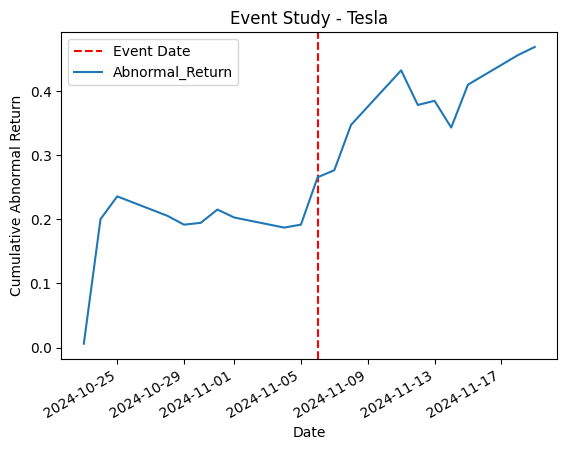

In [200]:
plot_cumulative_abnormal_returns(event_window_tesla, "Tesla")

## Nvidia

In [201]:
nvda_df = prepare_stock_data('NVDA', start_date, end_date)
nvda_df

Open        High         Low       Close     Volume  Dividends  \
0       0.539251    0.549853    0.536842    0.548167  256968000        0.0   
1       0.547685    0.551299    0.543107    0.544794  200720000        0.0   
2       0.542866    0.543589    0.528409    0.530818  292928000        0.0   
3       0.533710    0.538770    0.525517    0.532505  316484000        0.0   
4       0.530336    0.543589    0.528650    0.541902  534564000        0.0   
...          ...         ...         ...         ...        ...        ...   
2406  147.410004  147.559998  142.729996  145.889999  309871700        0.0   
2407  149.350006  152.889999  140.699997  146.669998  400946600        0.0   
2408  145.929993  147.160004  141.100006  141.949997  236406200        0.0   
2409  141.990005  142.050003  135.820007  136.020004  344941900        0.0   
2410  137.699997  139.300003  135.669998  136.919998  190287700        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04 -0.006173  
2              0.0  2015-05-05 -0.025987  
3              0.0  2015-05-06  0.003172  
4              0.0  2015-05-07  0.017493  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.007648  
2407           0.0  2024-11-21  0.005332  
2408           0.0  2024-11-22 -0.032710  
2409           0.0  2024-11-25 -0.042673  
2410           0.0  2024-11-26  0.006595  

[2411 rows x 9 columns]

In [202]:
df_merge_nvda = pd.merge(nvda_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_nvda['date'] = pd.to_datetime(df_merge_nvda['date'])
df_merge_nvda

Open        High         Low       Close      Volume  Dividends  \
0       0.547685    0.551299    0.543107    0.544794   200720000        0.0   
1       0.542866    0.543589    0.528409    0.530818   292928000        0.0   
2       0.533710    0.538770    0.525517    0.532505   316484000        0.0   
3       0.530336    0.543589    0.528650    0.541902   534564000        0.0   
4       0.506241    0.526240    0.493712    0.501904  1146552000        0.0   
...          ...         ...         ...         ...         ...        ...   
2405  147.410004  147.559998  142.729996  145.889999   309871700        0.0   
2406  149.350006  152.889999  140.699997  146.669998   400946600        0.0   
2407  145.929993  147.160004  141.100006  141.949997   236406200        0.0   
2408  141.990005  142.050003  135.820007  136.020004   344941900        0.0   
2409  137.699997  139.300003  135.669998  136.919998   190287700        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04 -0.006173       0.002936  
1              0.0 2015-05-05 -0.025987      -0.011908  
2              0.0 2015-05-06  0.003172      -0.004466  
3              0.0 2015-05-07  0.017493       0.003767  
4              0.0 2015-05-08 -0.076677       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.007648       0.000022  
2406           0.0 2024-11-21  0.005332       0.005326  
2407           0.0 2024-11-22 -0.032710       0.003462  
2408           0.0 2024-11-25 -0.042673       0.003016  
2409           0.0 2024-11-26  0.006595       0.005706  

[2410 rows x 10 columns]

In [203]:
event_window_nvda = get_event_window(df_merge_nvda,event_date)
print(len(event_window_nvda))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_nvda = get_estimation_window(df_merge_nvda,event_date)
print(len(estimation_window_nvda))

20
120


In [204]:
event_window_nvda = calculate_abnormal_returns(event_window_nvda, estimation_window_nvda)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

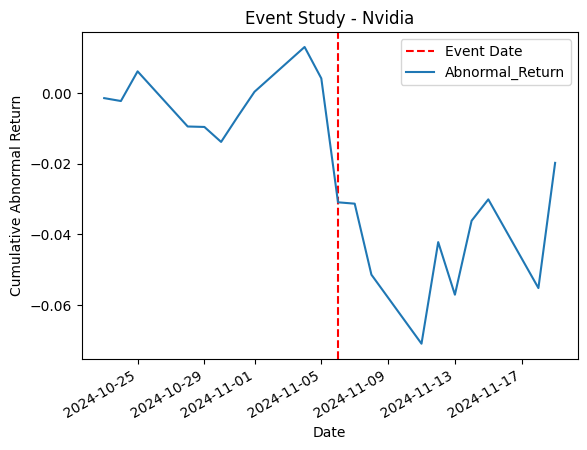

In [205]:
plot_cumulative_abnormal_returns(event_window_nvda, "Nvidia")

## Tencent

In [206]:
tencent_df = prepare_stock_data("0700.HK", start_date, end_date)
tencent_df

Open        High         Low       Close    Volume  Dividends  \
0     141.257993  142.675006  139.575297  139.929550  24186374        0.0   
1     140.372365  142.409314  137.892606  139.575302  21200652        0.0   
2     137.272661  140.992306  137.272661  138.158279  21188428        0.0   
3     137.272655  138.069717  134.438629  135.501389  21528958        0.0   
4     138.158276  139.929542  136.121327  136.387024  19643557        0.0   
...          ...         ...         ...         ...       ...        ...   
2354  408.200012  413.799988  406.200012  410.799988  15005135        0.0   
2355  409.399994  411.399994  407.000000  407.600006  12501718        0.0   
2356  408.799988  412.399994  399.600006  400.600006  16949546        0.0   
2357  400.000000  402.399994  393.799988  395.200012  27888308        0.0   
2358  392.200012  399.200012  392.200012  393.799988  16940574        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-04       NaN  
1              0.0  2015-05-05 -0.002535  
2              0.0  2015-05-06 -0.010204  
3              0.0  2015-05-07 -0.019418  
4              0.0  2015-05-08  0.006515  
...            ...         ...       ...  
2354           0.0  2024-11-20  0.011261  
2355           0.0  2024-11-21 -0.007820  
2356           0.0  2024-11-22 -0.017323  
2357           0.0  2024-11-25 -0.013571  
2358           0.0  2024-11-26 -0.003549  

[2359 rows x 9 columns]

In [207]:
hang_seng_index = prepare_market_data("^HSI",start_date, end_date)
hang_seng_index

Open          High           Low         Close      Volume  \
0     28231.259766  28343.740234  28017.199219  28123.820312  1999728900   
1     28295.720703  28316.630859  27598.169922  27755.539062  2292680300   
2     27698.099609  28054.679688  27570.410156  27640.910156  2265508000   
3     27567.619141  27604.490234  27207.279297  27289.970703  1894753100   
4     27557.519531  27652.619141  27367.109375  27577.339844  1817614400   
...            ...           ...           ...           ...         ...   
2352  19623.390625  19752.929688  19575.910156  19705.009766  2057500000   
2353  19646.039062  19764.619141  19552.500000  19601.109375  2079200000   
2354  19613.550781  19711.400391  19134.589844  19229.970703  3237600000   
2355  19307.339844  19351.060547  19102.060547  19150.990234  4385600000   
2356  19054.400391  19295.750000  19054.400391  19159.199219  2384700000   

      Dividends  Stock Splits        date  Market Return  
0           0.0           0.0  2015-05-04            NaN  
1           0.0           0.0  2015-05-05      -0.013181  
2           0.0           0.0  2015-05-06      -0.004138  
3           0.0           0.0  2015-05-07      -0.012778  
4           0.0           0.0  2015-05-08       0.010475  
...         ...           ...         ...            ...  
2352        0.0           0.0  2024-11-20       0.002100  
2353        0.0           0.0  2024-11-21      -0.005287  
2354        0.0           0.0  2024-11-22      -0.019116  
2355        0.0           0.0  2024-11-25      -0.004116  
2356        0.0           0.0  2024-11-26       0.000429  

[2357 rows x 9 columns]

In [208]:
df_merge_tencent = pd.merge(tencent_df, hang_seng_index[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_tencent['date'] = pd.to_datetime(df_merge_tencent['date'])
df_merge_tencent

Open        High         Low       Close    Volume  Dividends  \
0     140.372365  142.409314  137.892606  139.575302  21200652        0.0   
1     137.272661  140.992306  137.272661  138.158279  21188428        0.0   
2     137.272655  138.069717  134.438629  135.501389  21528958        0.0   
3     138.158276  139.929542  136.121327  136.387024  19643557        0.0   
4     137.538355  142.143633  137.538355  140.460938  22562554        0.0   
...          ...         ...         ...         ...       ...        ...   
2350  408.200012  413.799988  406.200012  410.799988  15005135        0.0   
2351  409.399994  411.399994  407.000000  407.600006  12501718        0.0   
2352  408.799988  412.399994  399.600006  400.600006  16949546        0.0   
2353  400.000000  402.399994  393.799988  395.200012  27888308        0.0   
2354  392.200012  399.200012  392.200012  393.799988  16940574        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-05 -0.002535      -0.013181  
1              0.0 2015-05-06 -0.010204      -0.004138  
2              0.0 2015-05-07 -0.019418      -0.012778  
3              0.0 2015-05-08  0.006515       0.010475  
4              0.0 2015-05-11  0.029433       0.005095  
...            ...        ...       ...            ...  
2350           0.0 2024-11-20  0.011261       0.002100  
2351           0.0 2024-11-21 -0.007820      -0.005287  
2352           0.0 2024-11-22 -0.017323      -0.019116  
2353           0.0 2024-11-25 -0.013571      -0.004116  
2354           0.0 2024-11-26 -0.003549       0.000429  

[2355 rows x 10 columns]

In [209]:
event_window_tencent = get_event_window(df_merge_tencent,event_date)
print(len(event_window_tencent))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_tencent = get_estimation_window(df_merge_tencent,event_date)
print(len(estimation_window_tencent))

20
120


In [210]:
event_window_tencent = calculate_abnormal_returns(event_window_tencent, estimation_window_tencent)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

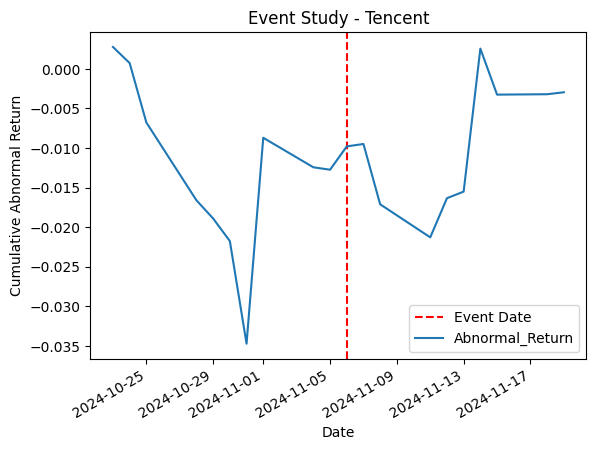

In [211]:
plot_cumulative_abnormal_returns(event_window_tencent, "Tencent")

## Baidu

In [212]:
baidu_df = prepare_stock_data('BIDU', start_date, end_date)
baidu_df

Open        High         Low       Close   Volume  Dividends  \
0     200.899994  202.979996  196.130005  202.470001  6151300        0.0   
1     204.990005  206.899994  203.520004  203.699997  4397100        0.0   
2     201.820007  201.990005  192.740005  194.740005  7379600        0.0   
3     194.470001  196.000000  188.610001  190.050003  6736100        0.0   
4     192.089996  194.619995  191.070007  193.630005  4165200        0.0   
...          ...         ...         ...         ...      ...        ...   
2406   86.550003   87.000000   85.949997   86.750000  2700600        0.0   
2407   82.650002   82.690002   80.220001   81.629997  8366600        0.0   
2408   79.410004   80.430000   78.949997   80.330002  5538700        0.0   
2409   80.580002   83.099998   80.199997   82.669998  4271400        0.0   
2410   83.779999   84.680000   82.800003   83.510002  3131700        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.006057  
2              0.0  2015-05-05 -0.044983  
3              0.0  2015-05-06 -0.024378  
4              0.0  2015-05-07  0.018662  
...            ...         ...       ...  
2406           0.0  2024-11-20  0.008451  
2407           0.0  2024-11-21 -0.060834  
2408           0.0  2024-11-22 -0.016054  
2409           0.0  2024-11-25  0.028714  
2410           0.0  2024-11-26  0.010110  

[2411 rows x 9 columns]

In [213]:
df_merge_baidu = pd.merge(baidu_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_baidu['date'] = pd.to_datetime(df_merge_baidu['date'])
df_merge_baidu

Open        High         Low       Close   Volume  Dividends  \
0     204.990005  206.899994  203.520004  203.699997  4397100        0.0   
1     201.820007  201.990005  192.740005  194.740005  7379600        0.0   
2     194.470001  196.000000  188.610001  190.050003  6736100        0.0   
3     192.089996  194.619995  191.070007  193.630005  4165200        0.0   
4     195.789993  195.899994  191.630005  193.539993  2863800        0.0   
...          ...         ...         ...         ...      ...        ...   
2405   86.550003   87.000000   85.949997   86.750000  2700600        0.0   
2406   82.650002   82.690002   80.220001   81.629997  8366600        0.0   
2407   79.410004   80.430000   78.949997   80.330002  5538700        0.0   
2408   80.580002   83.099998   80.199997   82.669998  4271400        0.0   
2409   83.779999   84.680000   82.800003   83.510002  3131700        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.006057       0.002936  
1              0.0 2015-05-05 -0.044983      -0.011908  
2              0.0 2015-05-06 -0.024378      -0.004466  
3              0.0 2015-05-07  0.018662       0.003767  
4              0.0 2015-05-08 -0.000465       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20  0.008451       0.000022  
2406           0.0 2024-11-21 -0.060834       0.005326  
2407           0.0 2024-11-22 -0.016054       0.003462  
2408           0.0 2024-11-25  0.028714       0.003016  
2409           0.0 2024-11-26  0.010110       0.005706  

[2410 rows x 10 columns]

In [214]:
event_window_baidu = get_event_window(df_merge_baidu,event_date)
print(len(event_window_baidu))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_baidu = get_estimation_window(df_merge_baidu,event_date)
print(len(estimation_window_baidu))

20
120


In [215]:
event_window_baidu = calculate_abnormal_returns(event_window_baidu, estimation_window_baidu)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

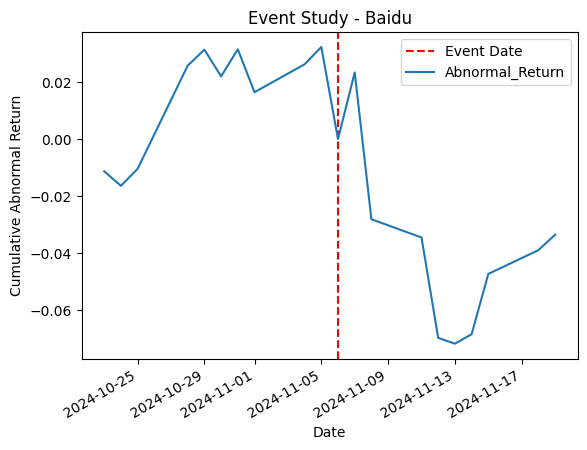

In [216]:
plot_cumulative_abnormal_returns(event_window_baidu, "Baidu")

## Netease

In [217]:
netease_df = prepare_stock_data('NTES', start_date, end_date)
netease_df

Open       High        Low      Close   Volume  Dividends  \
0     22.008803  22.056816  21.478946  21.672712  3120500        0.0   
1     21.830471  22.427205  21.672714  21.945360  2909500        0.0   
2     21.953937  22.012238  21.454944  21.485809  2974500        0.0   
3     21.537250  21.588692  20.921654  21.142857  3169500        0.0   
4     21.352060  21.972800  21.261179  21.863056  5173500        0.0   
...         ...        ...        ...        ...      ...        ...   
2406  86.540001  87.610001  85.849998  87.529999  1641300        0.0   
2407  87.489998  88.849998  87.339996  88.639999  1228400        0.0   
2408  87.519997  88.169998  86.360001  86.449997  1991100        0.0   
2409  86.160004  86.620003  85.360001  85.400002  1634400        0.0   
2410  86.080002  86.480003  84.970001  86.209999  1155600        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.012502  
2              0.0  2015-05-05 -0.021163  
3              0.0  2015-05-06 -0.016091  
4              0.0  2015-05-07  0.033496  
...            ...         ...       ...  
2406           0.0  2024-11-20  0.021362  
2407           0.0  2024-11-21  0.012602  
2408           0.0  2024-11-22 -0.025017  
2409           0.0  2024-11-25 -0.012220  
2410           0.0  2024-11-26  0.009440  

[2411 rows x 9 columns]

In [218]:
df_merge_netease = pd.merge(netease_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_netease['date'] = pd.to_datetime(df_merge_netease['date'])
df_merge_netease

Open       High        Low      Close   Volume  Dividends  \
0     21.830471  22.427205  21.672714  21.945360  2909500        0.0   
1     21.953937  22.012238  21.454944  21.485809  2974500        0.0   
2     21.537250  21.588692  20.921654  21.142857  3169500        0.0   
3     21.352060  21.972800  21.261179  21.863056  5173500        0.0   
4     22.291741  22.358616  21.695009  22.159706  2868000        0.0   
...         ...        ...        ...        ...      ...        ...   
2405  86.540001  87.610001  85.849998  87.529999  1641300        0.0   
2406  87.489998  88.849998  87.339996  88.639999  1228400        0.0   
2407  87.519997  88.169998  86.360001  86.449997  1991100        0.0   
2408  86.160004  86.620003  85.360001  85.400002  1634400        0.0   
2409  86.080002  86.480003  84.970001  86.209999  1155600        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.012502       0.002936  
1              0.0 2015-05-05 -0.021163      -0.011908  
2              0.0 2015-05-06 -0.016091      -0.004466  
3              0.0 2015-05-07  0.033496       0.003767  
4              0.0 2015-05-08  0.013477       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20  0.021362       0.000022  
2406           0.0 2024-11-21  0.012602       0.005326  
2407           0.0 2024-11-22 -0.025017       0.003462  
2408           0.0 2024-11-25 -0.012220       0.003016  
2409           0.0 2024-11-26  0.009440       0.005706  

[2410 rows x 10 columns]

In [219]:
event_window_netease = get_event_window(df_merge_netease,event_date)
print(len(event_window_netease))

event_estimation_netease = get_estimation_window(df_merge_netease,event_date)
print(len(event_estimation_netease))

20
120


In [220]:
event_window_netease = calculate_abnormal_returns(event_window_netease, event_estimation_netease)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

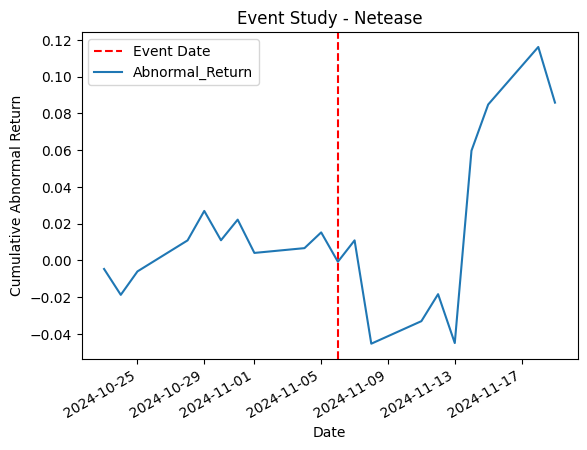

In [221]:
plot_cumulative_abnormal_returns(event_window_netease, "Netease")

## Alibaba

In [222]:
baba_df = prepare_stock_data('BABA', start_date, end_date)
baba_df

Open       High        Low      Close    Volume  Dividends  \
0     78.254452  79.432664  77.365967  78.389656  17910500        0.0   
1     78.389656  78.766297  77.375626  77.829521  21551500        0.0   
2     77.684656  78.128899  75.106108  76.815483  32661900        0.0   
3     76.921725  78.080618  76.786521  77.259735  24953500        0.0   
4     85.787271  86.231514  82.001547  83.054207  69448800        0.0   
...         ...        ...        ...        ...       ...        ...   
2406  87.040001  87.540001  86.500000  86.769997  15174500        0.0   
2407  86.980003  87.040001  85.445000  85.580002  15869200        0.0   
2408  83.599998  83.680000  82.635002  83.129997  24999200        0.0   
2409  84.250000  85.875000  83.750000  85.580002  15120100        0.0   
2410  85.815002  86.080002  84.860001  85.180000  10241500        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04 -0.007171  
2              0.0  2015-05-05 -0.013115  
3              0.0  2015-05-06  0.005767  
4              0.0  2015-05-07  0.072321  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.003911  
2407           0.0  2024-11-21 -0.013809  
2408           0.0  2024-11-22 -0.029046  
2409           0.0  2024-11-25  0.029046  
2410           0.0  2024-11-26 -0.004685  

[2411 rows x 9 columns]

In [223]:
df_merge_baba = pd.merge(baba_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_baba['date'] = pd.to_datetime(df_merge_baba['date'])
df_merge_baba

Open       High        Low      Close    Volume  Dividends  \
0     78.389656  78.766297  77.375626  77.829521  21551500        0.0   
1     77.684656  78.128899  75.106108  76.815483  32661900        0.0   
2     76.921725  78.080618  76.786521  77.259735  24953500        0.0   
3     85.787271  86.231514  82.001547  83.054207  69448800        0.0   
4     84.811866  85.246449  83.913721  84.077896  30140600        0.0   
...         ...        ...        ...        ...       ...        ...   
2405  87.040001  87.540001  86.500000  86.769997  15174500        0.0   
2406  86.980003  87.040001  85.445000  85.580002  15869200        0.0   
2407  83.599998  83.680000  82.635002  83.129997  24999200        0.0   
2408  84.250000  85.875000  83.750000  85.580002  15120100        0.0   
2409  85.815002  86.080002  84.860001  85.180000  10241500        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04 -0.007171       0.002936  
1              0.0 2015-05-05 -0.013115      -0.011908  
2              0.0 2015-05-06  0.005767      -0.004466  
3              0.0 2015-05-07  0.072321       0.003767  
4              0.0 2015-05-08  0.012250       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.003911       0.000022  
2406           0.0 2024-11-21 -0.013809       0.005326  
2407           0.0 2024-11-22 -0.029046       0.003462  
2408           0.0 2024-11-25  0.029046       0.003016  
2409           0.0 2024-11-26 -0.004685       0.005706  

[2410 rows x 10 columns]

In [224]:
event_window_baba = get_event_window(df_merge_baba, event_date)
print(len(event_window_baba))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_baba = get_estimation_window(df_merge_baba,event_date)
print(len(estimation_window_baba))

20
120


In [225]:
event_window_baba = calculate_abnormal_returns(event_window_baba, estimation_window_baba)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

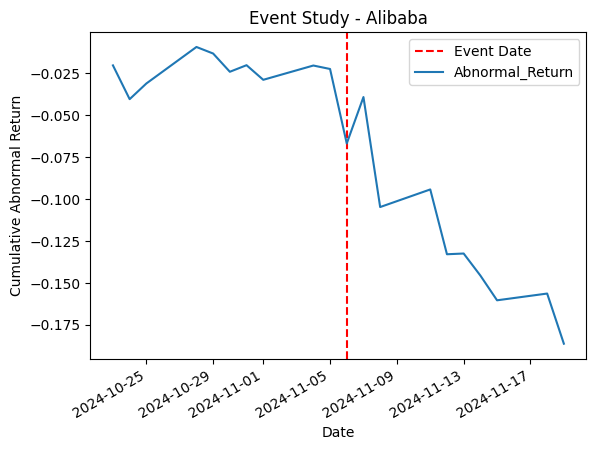

In [226]:
plot_cumulative_abnormal_returns(event_window_baba, "Alibaba")

## JD

In [227]:
JD_df = prepare_stock_data('JD', start_date, end_date)
JD_df

Open       High        Low      Close    Volume  Dividends  \
0     31.649209  31.761307  30.556245  31.322252   5292600        0.0   
1     31.770649  32.611391  31.481063  32.032215   7758900        0.0   
2     31.761306  31.892087  30.967275  31.481060   4681500        0.0   
3     31.340935  31.434353  30.247975  30.341389   7477000        0.0   
4     31.574478  31.574478  30.229294  30.901888  10170000        0.0   
...         ...        ...        ...        ...       ...        ...   
2406  35.480000  35.490002  34.880001  35.180000   8294500        0.0   
2407  35.180000  35.759998  35.099998  35.380001   9256800        0.0   
2408  35.202000  35.400002  34.540001  34.680000  10254600        0.0   
2409  34.279999  34.650002  34.029999  34.509998  10780500        0.0   
2410  35.209999  35.500000  34.730000  35.330002  12297200        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.022413  
2              0.0  2015-05-05 -0.017356  
3              0.0  2015-05-06 -0.036873  
4              0.0  2015-05-07  0.018305  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.000284  
2407           0.0  2024-11-21  0.005669  
2408           0.0  2024-11-22 -0.019984  
2409           0.0  2024-11-25 -0.004914  
2410           0.0  2024-11-26  0.023483  

[2411 rows x 9 columns]

In [228]:
df_merge_JD = pd.merge(JD_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_JD['date'] = pd.to_datetime(df_merge_JD['date'])
df_merge_JD

Open       High        Low      Close    Volume  Dividends  \
0     31.770649  32.611391  31.481063  32.032215   7758900        0.0   
1     31.761306  31.892087  30.967275  31.481060   4681500        0.0   
2     31.340935  31.434353  30.247975  30.341389   7477000        0.0   
3     31.574478  31.574478  30.229294  30.901888  10170000        0.0   
4     30.789785  31.621183  29.986410  31.518429  11417200        0.0   
...         ...        ...        ...        ...       ...        ...   
2405  35.480000  35.490002  34.880001  35.180000   8294500        0.0   
2406  35.180000  35.759998  35.099998  35.380001   9256800        0.0   
2407  35.202000  35.400002  34.540001  34.680000  10254600        0.0   
2408  34.279999  34.650002  34.029999  34.509998  10780500        0.0   
2409  35.209999  35.500000  34.730000  35.330002  12297200        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.022413       0.002936  
1              0.0 2015-05-05 -0.017356      -0.011908  
2              0.0 2015-05-06 -0.036873      -0.004466  
3              0.0 2015-05-07  0.018305       0.003767  
4              0.0 2015-05-08  0.019755       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.000284       0.000022  
2406           0.0 2024-11-21  0.005669       0.005326  
2407           0.0 2024-11-22 -0.019984       0.003462  
2408           0.0 2024-11-25 -0.004914       0.003016  
2409           0.0 2024-11-26  0.023483       0.005706  

[2410 rows x 10 columns]

In [229]:
event_window_JD = get_event_window(df_merge_JD, event_date)
print(len(event_window_JD))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_JD = get_estimation_window(df_merge_JD,event_date)
print(len(estimation_window_JD))

20
120


In [230]:
event_window_JD = calculate_abnormal_returns(event_window_JD, estimation_window_JD)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

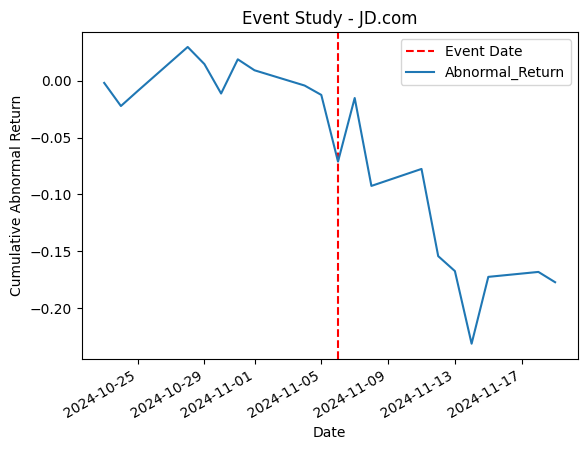

In [231]:
plot_cumulative_abnormal_returns(event_window_JD, "JD.com")

## TSMC

In [232]:
tsmc_df = prepare_stock_data('2330.TW', start_date, end_date)
tsmc_df

Open         High          Low        Close    Volume  Dividends  \
0      111.462665   111.462665   109.586189   110.712074  30811000        0.0   
1      110.712064   111.087359   109.586179   110.336769  27559000        0.0   
2      109.210894   111.087369   109.210894   110.712074  18784000        0.0   
3      109.586207   110.712093   109.586207   109.961502  21826000        0.0   
4      109.586207   110.712093   109.586207   109.961502  19987000        0.0   
...           ...          ...          ...          ...       ...        ...   
2329  1025.000000  1025.000000  1025.000000  1025.000000    156000        0.0   
2330  1020.000000  1025.000000  1010.000000  1010.000000  41429227        0.0   
2331  1035.000000  1050.000000  1035.000000  1040.000000  25187973        0.0   
2332  1045.000000  1050.000000  1030.000000  1030.000000  49566674        0.0   
2333  1015.000000  1020.000000  1010.000000  1010.000000  27312402        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-04       NaN  
1              0.0  2015-05-05 -0.003396  
2              0.0  2015-05-06  0.003396  
3              0.0  2015-05-07 -0.006803  
4              0.0  2015-05-08  0.000000  
...            ...         ...       ...  
2329           0.0  2024-11-20 -0.014528  
2330           0.0  2024-11-21 -0.014742  
2331           0.0  2024-11-22  0.029270  
2332           0.0  2024-11-25 -0.009662  
2333           0.0  2024-11-26 -0.019608  

[2334 rows x 9 columns]

In [233]:
TAIEX_df = prepare_market_data("^TWII",start_date, end_date)
TAIEX_df

Open          High           Low         Close   Volume  \
0      9853.464805   9871.605347   9800.435750   9844.995117  2298800   
1      9849.084828   9855.594564   9788.085107   9820.084961  2134800   
2      9780.344900   9829.384714   9735.895884   9818.155273  2353700   
3      9789.774994   9789.774994   9704.065430   9704.065430  2315900   
4      9724.244968   9760.464526   9691.955078   9691.955078  2012000   
...            ...           ...           ...           ...      ...   
2325  22872.910156  22977.560547  22622.470703  22688.359375  3757700   
2326  22671.660156  22708.570312  22490.279297  22555.660156  3395800   
2327  22799.529297  23019.039062  22799.529297  22904.320312  3505100   
2328  22996.050781  23172.429688  22948.369141  22948.369141  5048900   
2329  22789.599609  22832.109375  22645.130859  22678.759766  2985600   

      Dividends  Stock Splits        date  Market Return  
0           0.0           0.0  2015-05-04            NaN  
1           0.0           0.0  2015-05-05      -0.002533  
2           0.0           0.0  2015-05-06      -0.000197  
3           0.0           0.0  2015-05-07      -0.011688  
4           0.0           0.0  2015-05-08      -0.001249  
...         ...           ...         ...            ...  
2325        0.0           0.0  2024-11-20      -0.007047  
2326        0.0           0.0  2024-11-21      -0.005866  
2327        0.0           0.0  2024-11-22       0.015340  
2328        0.0           0.0  2024-11-25       0.001921  
2329        0.0           0.0  2024-11-26      -0.011818  

[2330 rows x 9 columns]

In [234]:
df_merge_tsmc = pd.merge(tsmc_df, TAIEX_df[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_tsmc['date'] = pd.to_datetime(df_merge_tsmc['date'])
df_merge_tsmc

Open         High          Low        Close    Volume  Dividends  \
0      110.712064   111.087359   109.586179   110.336769  27559000        0.0   
1      109.210894   111.087369   109.210894   110.712074  18784000        0.0   
2      109.586207   110.712093   109.586207   109.961502  21826000        0.0   
3      109.586207   110.712093   109.586207   109.961502  19987000        0.0   
4      111.837965   111.837965   110.336784   111.462669  20326000        0.0   
...           ...          ...          ...          ...       ...        ...   
2324  1025.000000  1025.000000  1025.000000  1025.000000    156000        0.0   
2325  1020.000000  1025.000000  1010.000000  1010.000000  41429227        0.0   
2326  1035.000000  1050.000000  1035.000000  1040.000000  25187973        0.0   
2327  1045.000000  1050.000000  1030.000000  1030.000000  49566674        0.0   
2328  1015.000000  1020.000000  1010.000000  1010.000000  27312402        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-05 -0.003396      -0.002533  
1              0.0 2015-05-06  0.003396      -0.000197  
2              0.0 2015-05-07 -0.006803      -0.011688  
3              0.0 2015-05-08  0.000000      -0.001249  
4              0.0 2015-05-11  0.013559      -0.002922  
...            ...        ...       ...            ...  
2324           0.0 2024-11-20 -0.014528      -0.007047  
2325           0.0 2024-11-21 -0.014742      -0.005866  
2326           0.0 2024-11-22  0.029270       0.015340  
2327           0.0 2024-11-25 -0.009662       0.001921  
2328           0.0 2024-11-26 -0.019608      -0.011818  

[2329 rows x 10 columns]

In [235]:
event_window_tsmc = get_event_window(df_merge_tsmc, event_date)
print(len(event_window_tsmc))
event_estimation_tsmc = get_estimation_window(df_merge_tsmc,event_date)
print(len(event_estimation_tsmc))

20
120


In [236]:
event_window_tsmc = calculate_abnormal_returns(event_window_tsmc, event_estimation_tsmc)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

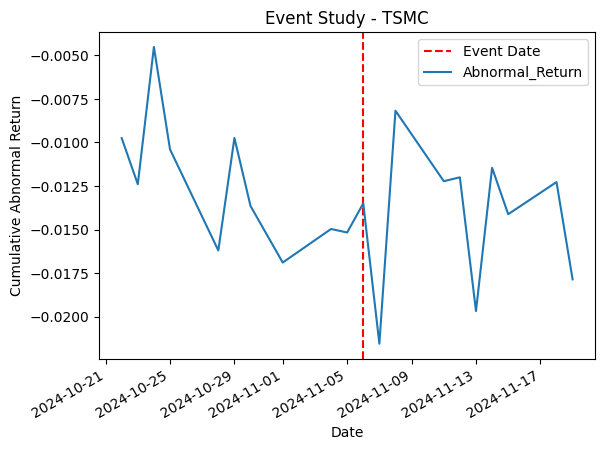

In [237]:
plot_cumulative_abnormal_returns(event_window_tsmc, "TSMC")

## 3M

In [238]:
mmm_df = prepare_stock_data('MMM', start_date, end_date)
mmm_df

Open        High         Low       Close   Volume  Dividends  \
0      94.165892   94.946656   94.165892   94.700409  2583480        0.0   
1      95.132804   96.003652   94.820498   95.505173  2679399        0.0   
2      95.409101   95.763451   94.538254   94.838547  2329449        0.0   
3      94.844557   95.541244   94.021760   94.676392  2634908        0.0   
4      94.430153   95.613307   94.430153   95.258957  2527028        0.0   
...          ...         ...         ...         ...      ...        ...   
2406  128.000000  128.190002  127.099998  127.839996  1700600        0.0   
2407  127.730003  128.580002  126.320000  127.320000  2544800        0.0   
2408  127.690002  128.479996  126.370003  128.419998  3052400        0.0   
2409  129.210007  130.600006  127.550003  130.320007  5074700        0.0   
2410  129.990005  133.229996  129.649994  132.949997  3080300        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.008462  
2              0.0  2015-05-05 -0.007004  
3              0.0  2015-05-06 -0.001711  
4              0.0  2015-05-07  0.006134  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.002734  
2407           0.0  2024-11-21 -0.004076  
2408           0.0  2024-11-22  0.008603  
2409           0.0  2024-11-25  0.014687  
2410           0.0  2024-11-26  0.019980  

[2411 rows x 9 columns]

In [239]:
df_merge_mmm = pd.merge(mmm_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_mmm['date'] = pd.to_datetime(df_merge_mmm['date'])
df_merge_mmm

Open        High         Low       Close   Volume  Dividends  \
0      95.132804   96.003652   94.820498   95.505173  2679399        0.0   
1      95.409101   95.763451   94.538254   94.838547  2329449        0.0   
2      94.844557   95.541244   94.021760   94.676392  2634908        0.0   
3      94.430153   95.613307   94.430153   95.258957  2527028        0.0   
4      96.243911   96.934580   96.129802   96.454109  2422498        0.0   
...          ...         ...         ...         ...      ...        ...   
2405  128.000000  128.190002  127.099998  127.839996  1700600        0.0   
2406  127.730003  128.580002  126.320000  127.320000  2544800        0.0   
2407  127.690002  128.479996  126.370003  128.419998  3052400        0.0   
2408  129.210007  130.600006  127.550003  130.320007  5074700        0.0   
2409  129.990005  133.229996  129.649994  132.949997  3080300        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.008462       0.002936  
1              0.0 2015-05-05 -0.007004      -0.011908  
2              0.0 2015-05-06 -0.001711      -0.004466  
3              0.0 2015-05-07  0.006134       0.003767  
4              0.0 2015-05-08  0.012468       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.002734       0.000022  
2406           0.0 2024-11-21 -0.004076       0.005326  
2407           0.0 2024-11-22  0.008603       0.003462  
2408           0.0 2024-11-25  0.014687       0.003016  
2409           0.0 2024-11-26  0.019980       0.005706  

[2410 rows x 10 columns]

In [240]:
event_window_mmm = get_event_window(df_merge_mmm, event_date)
print(len(event_window_mmm))
event_estimation_mmm = get_estimation_window(df_merge_mmm,event_date)
print(len(event_estimation_mmm))

20
120


In [241]:
event_window_mmm = calculate_abnormal_returns(event_window_mmm, event_estimation_mmm)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

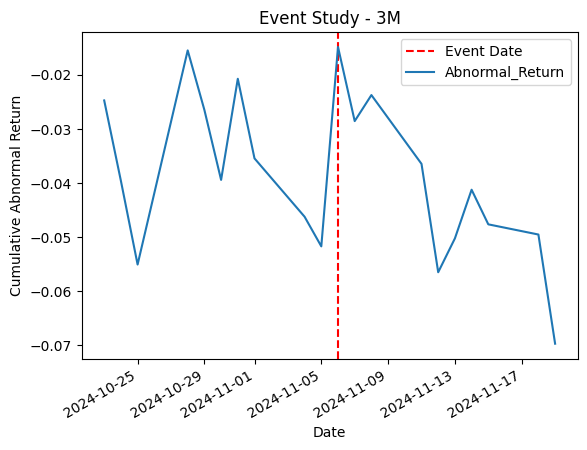

In [242]:
plot_cumulative_abnormal_returns(event_window_mmm, "3M")

## Samsung

In [243]:
samsung_df = prepare_stock_data('005930.KS', start_date, end_date)
samsung_df

Open          High           Low         Close    Volume  \
0     22263.878848  22517.057285  22105.642324  22153.113281   8283700   
1     21994.874725  22010.698376  21456.870595  21551.812500  13270500   
2     21551.807308  21757.514720  21425.218131  21678.396484  10257400   
3     21615.107147  21678.401751  21172.044922  21172.044922   9488100   
4     21520.166074  21520.166074  21140.398438  21140.398438   9640450   
...            ...           ...           ...           ...       ...   
2345  56100.000000  56500.000000  54800.000000  55300.000000  20864667   
2346  54900.000000  56900.000000  54700.000000  56400.000000  19096850   
2347  56000.000000  56700.000000  55900.000000  56000.000000  15281543   
2348  57400.000000  57900.000000  56700.000000  57900.000000  36237325   
2349  57900.000000  58900.000000  57500.000000  58300.000000  23209405   

      Dividends  Stock Splits        date    Return  
0           0.0           0.0  2015-05-04       NaN  
1           0.0           0.0  2015-05-06 -0.027518  
2           0.0           0.0  2015-05-07  0.005856  
3           0.0           0.0  2015-05-08 -0.023635  
4           0.0           0.0  2015-05-11 -0.001496  
...         ...           ...         ...       ...  
2345        0.0           0.0  2024-11-20 -0.017922  
2346        0.0           0.0  2024-11-21  0.019696  
2347        0.0           0.0  2024-11-22 -0.007117  
2348        0.0           0.0  2024-11-25  0.033366  
2349        0.0           0.0  2024-11-26  0.006885  

[2350 rows x 9 columns]

In [244]:
kospi_df = prepare_market_data("^KS11",start_date, end_date)
kospi_df

Open         High          Low        Close  Volume  Dividends  \
0     2134.510010  2139.300049  2128.719971  2132.229980  355600        0.0   
1     2122.030029  2123.219971  2095.600098  2104.580078  428100        0.0   
2     2098.479980  2099.439941  2067.989990  2091.000000  423200        0.0   
3     2090.189941  2094.060059  2082.719971  2085.520020  309500        0.0   
4     2106.120117  2110.790039  2097.379883  2097.379883  329700        0.0   
...           ...          ...          ...          ...     ...        ...   
2344  2475.760010  2489.149902  2471.790039  2482.290039  408800        0.0   
2345  2474.620117  2496.969971  2474.620117  2480.629883  451100        0.0   
2346  2493.419922  2511.229980  2492.209961  2501.239990  543500        0.0   
2347  2524.110107  2541.760010  2517.979980  2534.340088  564700        0.0   
2348  2521.389893  2526.620117  2512.209961  2520.360107  441700        0.0   

      Stock Splits        date  Market Return  
0              0.0  2015-05-04            NaN  
1              0.0  2015-05-06      -0.013052  
2              0.0  2015-05-07      -0.006474  
3              0.0  2015-05-08      -0.002624  
4              0.0  2015-05-11       0.005671  
...            ...         ...            ...  
2344           0.0  2024-11-20       0.004174  
2345           0.0  2024-11-21      -0.000669  
2346           0.0  2024-11-22       0.008274  
2347           0.0  2024-11-25       0.013147  
2348           0.0  2024-11-26      -0.005531  

[2349 rows x 9 columns]

In [245]:
df_merge_samsung = pd.merge(samsung_df, kospi_df[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_samsung['date'] = pd.to_datetime(df_merge_samsung['date'])
df_merge_samsung

Open          High           Low         Close    Volume  \
0     21994.874725  22010.698376  21456.870595  21551.812500  13270500   
1     21551.807308  21757.514720  21425.218131  21678.396484  10257400   
2     21615.107147  21678.401751  21172.044922  21172.044922   9488100   
3     21520.166074  21520.166074  21140.398438  21140.398438   9640450   
4     21282.808435  21409.397630  20950.511798  21061.277344  10633200   
...            ...           ...           ...           ...       ...   
2343  56100.000000  56500.000000  54800.000000  55300.000000  20864667   
2344  54900.000000  56900.000000  54700.000000  56400.000000  19096850   
2345  56000.000000  56700.000000  55900.000000  56000.000000  15281543   
2346  57400.000000  57900.000000  56700.000000  57900.000000  36237325   
2347  57900.000000  58900.000000  57500.000000  58300.000000  23209405   

      Dividends  Stock Splits       date    Return  Market Return  
0           0.0           0.0 2015-05-06 -0.027518      -0.013052  
1           0.0           0.0 2015-05-07  0.005856      -0.006474  
2           0.0           0.0 2015-05-08 -0.023635      -0.002624  
3           0.0           0.0 2015-05-11 -0.001496       0.005671  
4           0.0           0.0 2015-05-12 -0.003750      -0.000291  
...         ...           ...        ...       ...            ...  
2343        0.0           0.0 2024-11-20 -0.017922       0.004174  
2344        0.0           0.0 2024-11-21  0.019696      -0.000669  
2345        0.0           0.0 2024-11-22 -0.007117       0.008274  
2346        0.0           0.0 2024-11-25  0.033366       0.013147  
2347        0.0           0.0 2024-11-26  0.006885      -0.005531  

[2348 rows x 10 columns]

In [246]:
event_window_samsung = get_event_window(df_merge_samsung, event_date)
print(len(event_window_samsung))
event_estimation_samsung = get_estimation_window(df_merge_samsung,event_date)
print(len(event_estimation_samsung))

20
120


In [247]:
event_window_samsung = calculate_abnormal_returns(event_window_samsung, event_estimation_samsung)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

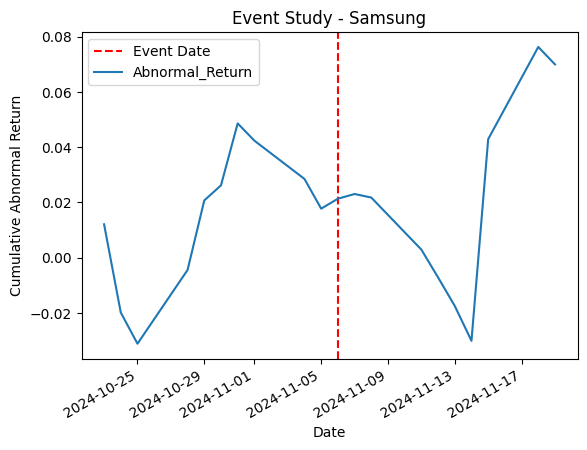

In [248]:
plot_cumulative_abnormal_returns(event_window_samsung, "Samsung")

## LG

In [249]:
LG_df = prepare_stock_data('066570.KS', start_date, end_date)
LG_df

Open          High           Low         Close  Volume  \
0     55734.308515  56104.022005  54994.881537  55179.738281  677044   
1     55179.742128  55457.027264  53978.173204  54347.886719  931974   
2     54255.454400  54255.454400  53516.027424  54070.597656  588154   
3     54163.024708  54532.738188  53885.739599  53978.167969  496877   
4     54163.023438  54532.736908  53978.166702  54163.023438  461363   
...            ...           ...           ...           ...     ...   
2345  90800.000000  93600.000000  90800.000000  93000.000000  420244   
2346  93300.000000  93500.000000  92200.000000  92600.000000  289613   
2347  93400.000000  93900.000000  92600.000000  93300.000000  273486   
2348  94200.000000  96400.000000  93500.000000  94200.000000  677582   
2349  93500.000000  95200.000000  93300.000000  94500.000000  224277   

      Dividends  Stock Splits        date    Return  
0           0.0           0.0  2015-05-04       NaN  
1           0.0           0.0  2015-05-06 -0.015190  
2           0.0           0.0  2015-05-07 -0.005115  
3           0.0           0.0  2015-05-08 -0.001711  
4           0.0           0.0  2015-05-11  0.003419  
...         ...           ...         ...       ...  
2345        0.0           0.0  2024-11-20  0.023940  
2346        0.0           0.0  2024-11-21 -0.004310  
2347        0.0           0.0  2024-11-22  0.007531  
2348        0.0           0.0  2024-11-25  0.009600  
2349        0.0           0.0  2024-11-26  0.003180  

[2350 rows x 9 columns]

In [250]:
df_merge_LG = pd.merge(LG_df, kospi_df[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_LG['date'] = pd.to_datetime(df_merge_LG['date'])
df_merge_LG

Open          High           Low         Close  Volume  \
0     55179.742128  55457.027264  53978.173204  54347.886719  931974   
1     54255.454400  54255.454400  53516.027424  54070.597656  588154   
2     54163.024708  54532.738188  53885.739599  53978.167969  496877   
3     54163.023438  54532.736908  53978.166702  54163.023438  461363   
4     54440.305810  54625.162536  53608.450543  53700.878906  721535   
...            ...           ...           ...           ...     ...   
2343  90800.000000  93600.000000  90800.000000  93000.000000  420244   
2344  93300.000000  93500.000000  92200.000000  92600.000000  289613   
2345  93400.000000  93900.000000  92600.000000  93300.000000  273486   
2346  94200.000000  96400.000000  93500.000000  94200.000000  677582   
2347  93500.000000  95200.000000  93300.000000  94500.000000  224277   

      Dividends  Stock Splits       date    Return  Market Return  
0           0.0           0.0 2015-05-06 -0.015190      -0.013052  
1           0.0           0.0 2015-05-07 -0.005115      -0.006474  
2           0.0           0.0 2015-05-08 -0.001711      -0.002624  
3           0.0           0.0 2015-05-11  0.003419       0.005671  
4           0.0           0.0 2015-05-12 -0.008569      -0.000291  
...         ...           ...        ...       ...            ...  
2343        0.0           0.0 2024-11-20  0.023940       0.004174  
2344        0.0           0.0 2024-11-21 -0.004310      -0.000669  
2345        0.0           0.0 2024-11-22  0.007531       0.008274  
2346        0.0           0.0 2024-11-25  0.009600       0.013147  
2347        0.0           0.0 2024-11-26  0.003180      -0.005531  

[2348 rows x 10 columns]

In [251]:
event_window_LG = get_event_window(df_merge_LG, event_date)
print(len(event_window_LG))
event_estimation_LG = get_estimation_window(df_merge_LG,event_date)
print(len(event_estimation_LG))

20
120


In [252]:
event_window_LG = calculate_abnormal_returns(event_window_LG, event_estimation_LG)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

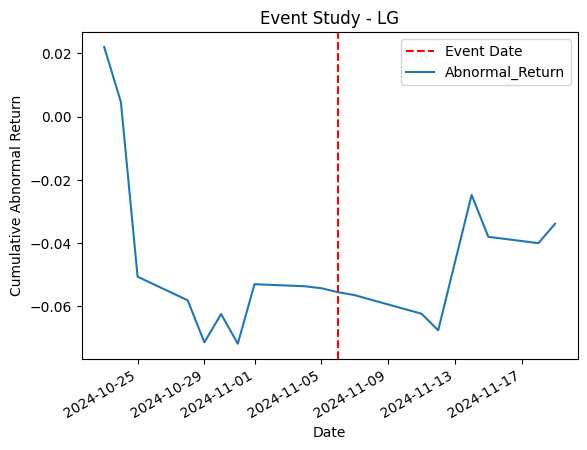

In [253]:
plot_cumulative_abnormal_returns(event_window_LG, "LG")

## Wistron

In [254]:
wistron_df = prepare_stock_data('3231.TW', start_date, end_date)
wistron_df

Open        High         Low       Close     Volume  Dividends  \
0      13.684694   13.789356   13.606196   13.606196   16444663        0.0   
1      13.606198   13.684695   13.370706   13.370706   23635265        0.0   
2      13.344542   13.344542   13.109050   13.161382   23579010        0.0   
3      13.109048   13.423038   13.109048   13.370706   16036247        0.0   
4      13.344541   13.344541   13.187547   13.187547   10968734        0.0   
...          ...         ...         ...         ...        ...        ...   
2329  114.000000  114.000000  114.000000  114.000000      36000        0.0   
2330  113.500000  115.500000  112.500000  114.000000   17809639        0.0   
2331  115.500000  121.000000  115.500000  118.500000   58450529        0.0   
2332  123.000000  126.000000  122.500000  124.500000  102532285        0.0   
2333  122.500000  122.500000  119.000000  120.000000   56328239        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-04       NaN  
1              0.0  2015-05-05 -0.017459  
2              0.0  2015-05-06 -0.015779  
3              0.0  2015-05-07  0.015779  
4              0.0  2015-05-08 -0.013793  
...            ...         ...       ...  
2329           0.0  2024-11-20  0.000000  
2330           0.0  2024-11-21  0.000000  
2331           0.0  2024-11-22  0.038715  
2332           0.0  2024-11-25  0.049393  
2333           0.0  2024-11-26 -0.036814  

[2334 rows x 9 columns]

In [255]:
df_merge_wistron = pd.merge(wistron_df, TAIEX_df[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_wistron['date'] = pd.to_datetime(df_merge_wistron['date'])
df_merge_wistron

Open        High         Low       Close     Volume  Dividends  \
0      13.606198   13.684695   13.370706   13.370706   23635265        0.0   
1      13.344542   13.344542   13.109050   13.161382   23579010        0.0   
2      13.109048   13.423038   13.109048   13.370706   16036247        0.0   
3      13.344541   13.344541   13.187547   13.187547   10968734        0.0   
4      13.213711   13.318372   12.952052   12.952052   18082829        0.0   
...          ...         ...         ...         ...        ...        ...   
2324  114.000000  114.000000  114.000000  114.000000      36000        0.0   
2325  113.500000  115.500000  112.500000  114.000000   17809639        0.0   
2326  115.500000  121.000000  115.500000  118.500000   58450529        0.0   
2327  123.000000  126.000000  122.500000  124.500000  102532285        0.0   
2328  122.500000  122.500000  119.000000  120.000000   56328239        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-05 -0.017459      -0.002533  
1              0.0 2015-05-06 -0.015779      -0.000197  
2              0.0 2015-05-07  0.015779      -0.011688  
3              0.0 2015-05-08 -0.013793      -0.001249  
4              0.0 2015-05-11 -0.018019      -0.002922  
...            ...        ...       ...            ...  
2324           0.0 2024-11-20  0.000000      -0.007047  
2325           0.0 2024-11-21  0.000000      -0.005866  
2326           0.0 2024-11-22  0.038715       0.015340  
2327           0.0 2024-11-25  0.049393       0.001921  
2328           0.0 2024-11-26 -0.036814      -0.011818  

[2329 rows x 10 columns]

In [256]:
event_window_wistron = get_event_window(df_merge_wistron, event_date)
print(len(event_window_wistron))
event_estimation_wistron = get_estimation_window(df_merge_wistron,event_date)
print(len(event_estimation_wistron))

20
120


In [257]:
event_window_wistron = calculate_abnormal_returns(event_window_wistron, event_estimation_wistron)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

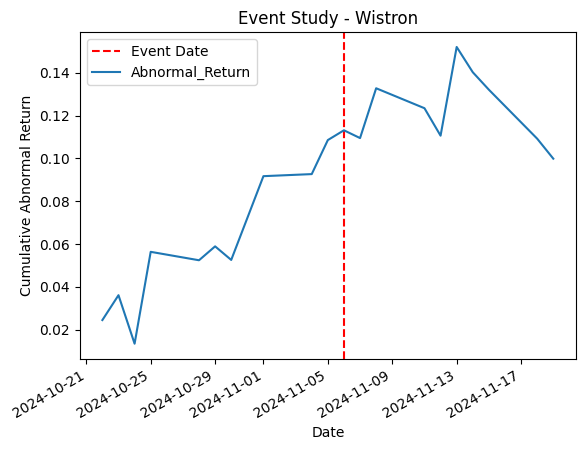

In [258]:
plot_cumulative_abnormal_returns(event_window_wistron, "Wistron")

## Pegatron

In [259]:
pegatron_df = prepare_stock_data('4938.TW', start_date, end_date)
pegatron_df

Open       High        Low      Close    Volume  Dividends  \
0     51.511969  51.623465  50.675735  50.731483   4108000        0.0   
1     51.288967  51.846455  50.619982  51.456215   6040000        0.0   
2     51.456214  52.236694  51.400461  52.069450  10282000        0.0   
3     52.069452  52.125200  51.121719  51.233219   6310000        0.0   
4     52.515443  52.849940  50.173992  50.173992  18143000        0.0   
...         ...        ...        ...        ...       ...        ...   
2329  96.000000  96.000000  96.000000  96.000000      1000        0.0   
2330  96.000000  96.699997  95.300003  95.900002   6505858        0.0   
2331  97.000000  98.400002  96.800003  97.599998   5285999        0.0   
2332  98.500000  98.900002  97.500000  97.500000   6293428        0.0   
2333  97.500000  98.300003  97.000000  97.500000   2673586        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-04       NaN  
1              0.0  2015-05-05  0.014185  
2              0.0  2015-05-06  0.011847  
3              0.0  2015-05-07 -0.016190  
4              0.0  2015-05-08 -0.020891  
...            ...         ...       ...  
2329           0.0  2024-11-20 -0.018576  
2330           0.0  2024-11-21 -0.001042  
2331           0.0  2024-11-22  0.017571  
2332           0.0  2024-11-25 -0.001025  
2333           0.0  2024-11-26  0.000000  

[2334 rows x 9 columns]

In [260]:
df_merge_pegatron = pd.merge(pegatron_df, TAIEX_df[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_pegatron['date'] = pd.to_datetime(df_merge_pegatron['date'])
df_merge_pegatron

Open       High        Low      Close    Volume  Dividends  \
0     51.288967  51.846455  50.619982  51.456215   6040000        0.0   
1     51.456214  52.236694  51.400461  52.069450  10282000        0.0   
2     52.069452  52.125200  51.121719  51.233219   6310000        0.0   
3     52.515443  52.849940  50.173992  50.173992  18143000        0.0   
4     50.564228  51.456213  50.173988  50.564228   9701000        0.0   
...         ...        ...        ...        ...       ...        ...   
2324  96.000000  96.000000  96.000000  96.000000      1000        0.0   
2325  96.000000  96.699997  95.300003  95.900002   6505858        0.0   
2326  97.000000  98.400002  96.800003  97.599998   5285999        0.0   
2327  98.500000  98.900002  97.500000  97.500000   6293428        0.0   
2328  97.500000  98.300003  97.000000  97.500000   2673586        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-05  0.014185      -0.002533  
1              0.0 2015-05-06  0.011847      -0.000197  
2              0.0 2015-05-07 -0.016190      -0.011688  
3              0.0 2015-05-08 -0.020891      -0.001249  
4              0.0 2015-05-11  0.007748      -0.002922  
...            ...        ...       ...            ...  
2324           0.0 2024-11-20 -0.018576      -0.007047  
2325           0.0 2024-11-21 -0.001042      -0.005866  
2326           0.0 2024-11-22  0.017571       0.015340  
2327           0.0 2024-11-25 -0.001025       0.001921  
2328           0.0 2024-11-26  0.000000      -0.011818  

[2329 rows x 10 columns]

In [261]:
event_window_pegatron = get_event_window(df_merge_pegatron, event_date)
print(len(event_window_pegatron))
event_estimation_pegatron = get_estimation_window(df_merge_pegatron,event_date)
print(len(event_estimation_pegatron))

20
120


In [262]:
event_window_pegatron = calculate_abnormal_returns(event_window_pegatron, event_estimation_pegatron)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

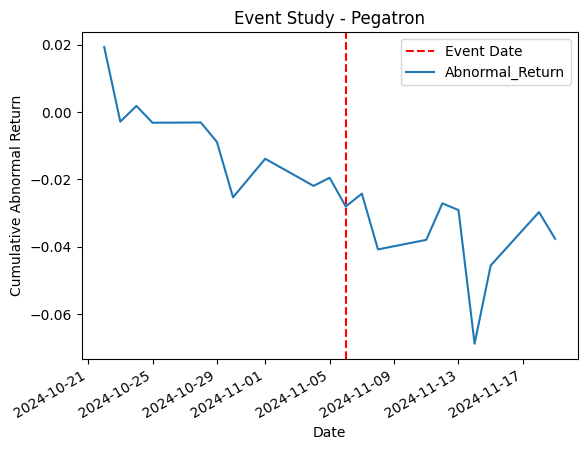

In [263]:
plot_cumulative_abnormal_returns(event_window_pegatron, "Pegatron")

## Foxconn

In [264]:
foxconn_df = prepare_stock_data('2354.TW', start_date, end_date)
foxconn_df

Open       High        Low      Close     Volume  Dividends  \
0     60.081601  60.287126  59.259505  59.602047    4077339        0.0   
1     59.602044  59.807564  59.053977  59.670547    3288802        0.0   
2     59.465035  60.218622  59.122493  59.739063    4144666        0.0   
3     59.739064  60.698182  59.465035  60.561165    4813851        0.0   
4     60.561169  60.835198  60.355644  60.766689    4787329        0.0   
...         ...        ...        ...        ...        ...        ...   
2329  84.500000  84.500000  84.500000  84.500000     169000        0.0   
2330  82.500000  84.500000  80.199997  80.900002  116567900        0.0   
2331  83.000000  84.500000  82.199997  82.199997   85065639        0.0   
2332  83.199997  86.500000  82.800003  83.699997   67272058        0.0   
2333  82.900002  84.599998  81.699997  82.800003   35638326        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-04       NaN  
1              0.0  2015-05-05  0.001149  
2              0.0  2015-05-06  0.001148  
3              0.0  2015-05-07  0.013668  
4              0.0  2015-05-08  0.003388  
...            ...         ...       ...  
2329           0.0  2024-11-20 -0.104413  
2330           0.0  2024-11-21 -0.043538  
2331           0.0  2024-11-22  0.015941  
2332           0.0  2024-11-25  0.018084  
2333           0.0  2024-11-26 -0.010811  

[2334 rows x 9 columns]

In [265]:
df_merge_foxconn = pd.merge(foxconn_df, TAIEX_df[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_foxconn['date'] = pd.to_datetime(df_merge_foxconn['date'])
df_merge_foxconn

Open       High        Low      Close     Volume  Dividends  \
0     59.602044  59.807564  59.053977  59.670547    3288802        0.0   
1     59.465035  60.218622  59.122493  59.739063    4144666        0.0   
2     59.739064  60.698182  59.465035  60.561165    4813851        0.0   
3     60.561169  60.835198  60.355644  60.766689    4787329        0.0   
4     61.657301  63.232985  61.657301  62.410889   15713620        0.0   
...         ...        ...        ...        ...        ...        ...   
2324  84.500000  84.500000  84.500000  84.500000     169000        0.0   
2325  82.500000  84.500000  80.199997  80.900002  116567900        0.0   
2326  83.000000  84.500000  82.199997  82.199997   85065639        0.0   
2327  83.199997  86.500000  82.800003  83.699997   67272058        0.0   
2328  82.900002  84.599998  81.699997  82.800003   35638326        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-05  0.001149      -0.002533  
1              0.0 2015-05-06  0.001148      -0.000197  
2              0.0 2015-05-07  0.013668      -0.011688  
3              0.0 2015-05-08  0.003388      -0.001249  
4              0.0 2015-05-11  0.026698      -0.002922  
...            ...        ...       ...            ...  
2324           0.0 2024-11-20 -0.104413      -0.007047  
2325           0.0 2024-11-21 -0.043538      -0.005866  
2326           0.0 2024-11-22  0.015941       0.015340  
2327           0.0 2024-11-25  0.018084       0.001921  
2328           0.0 2024-11-26 -0.010811      -0.011818  

[2329 rows x 10 columns]

In [266]:
event_window_foxconn = get_event_window(df_merge_foxconn, event_date)
print(len(event_window_foxconn))
event_estimation_foxconn = get_estimation_window(df_merge_foxconn,event_date)
print(len(event_estimation_foxconn))

20
120


In [267]:
event_window_foxconn = calculate_abnormal_returns(event_window_foxconn, event_estimation_foxconn)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

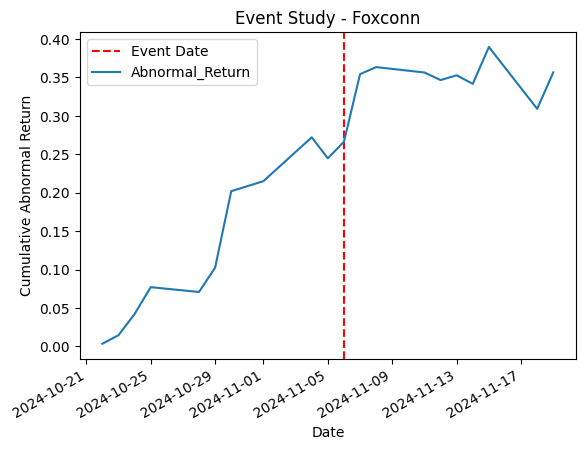

In [268]:
plot_cumulative_abnormal_returns(event_window_foxconn, "Foxconn")

## Pepsi

In [269]:
pepsi_df = prepare_stock_data('PEP', start_date, end_date)
pepsi_df

Open        High         Low       Close   Volume  Dividends  \
0      72.222027   72.571145   71.918445   72.525604  4622300        0.0   
1      72.442117   73.049283   72.297920   72.821594  3729400        0.0   
2      72.874705   72.988549   72.282723   72.419334  3502800        0.0   
3      72.798817   72.836767   72.062632   72.464882  3376400        0.0   
4      72.214424   72.609077   72.062630   72.214424  3157400        0.0   
...          ...         ...         ...         ...      ...        ...   
2406  156.449997  159.110001  156.199997  158.740005  5067300        0.0   
2407  158.389999  160.500000  157.949997  160.339996  5977000        0.0   
2408  160.899994  162.059998  159.889999  162.000000  5846300        0.0   
2409  162.699997  163.589996  162.000000  163.050003  8580400        0.0   
2410  163.270004  163.679993  161.899994  162.160004  4653600        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.004073  
2              0.0  2015-05-05 -0.005539  
3              0.0  2015-05-06  0.000629  
4              0.0  2015-05-07 -0.003462  
...            ...         ...       ...  
2406           0.0  2024-11-20  0.012807  
2407           0.0  2024-11-21  0.010029  
2408           0.0  2024-11-22  0.010300  
2409           0.0  2024-11-25  0.006461  
2410           0.0  2024-11-26 -0.005473  

[2411 rows x 9 columns]

In [270]:
df_merge_pep = pd.merge(pepsi_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_pep['date'] = pd.to_datetime(df_merge_pep['date'])
df_merge_pep

Open        High         Low       Close   Volume  Dividends  \
0      72.442117   73.049283   72.297920   72.821594  3729400        0.0   
1      72.874705   72.988549   72.282723   72.419334  3502800        0.0   
2      72.798817   72.836767   72.062632   72.464882  3376400        0.0   
3      72.214424   72.609077   72.062630   72.214424  3157400        0.0   
4      72.791217   73.322482   72.517994   73.276947  5231600        0.0   
...          ...         ...         ...         ...      ...        ...   
2405  156.449997  159.110001  156.199997  158.740005  5067300        0.0   
2406  158.389999  160.500000  157.949997  160.339996  5977000        0.0   
2407  160.899994  162.059998  159.889999  162.000000  5846300        0.0   
2408  162.699997  163.589996  162.000000  163.050003  8580400        0.0   
2409  163.270004  163.679993  161.899994  162.160004  4653600        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.004073       0.002936  
1              0.0 2015-05-05 -0.005539      -0.011908  
2              0.0 2015-05-06  0.000629      -0.004466  
3              0.0 2015-05-07 -0.003462       0.003767  
4              0.0 2015-05-08  0.014606       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20  0.012807       0.000022  
2406           0.0 2024-11-21  0.010029       0.005326  
2407           0.0 2024-11-22  0.010300       0.003462  
2408           0.0 2024-11-25  0.006461       0.003016  
2409           0.0 2024-11-26 -0.005473       0.005706  

[2410 rows x 10 columns]

In [271]:
event_window_pep = get_event_window(df_merge_pep, event_date)
print(len(event_window_pep))
estimation_window_pep = get_estimation_window(df_merge_pep,event_date)
print(len(estimation_window_pep))

20
120


In [272]:
event_window_pep = calculate_abnormal_returns(event_window_pep, estimation_window_pep)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

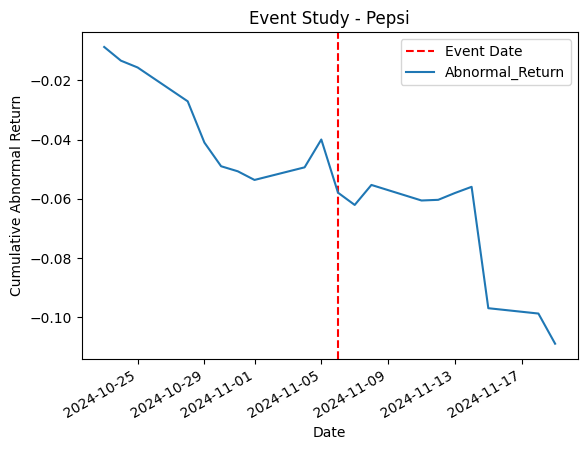

In [273]:
plot_cumulative_abnormal_returns(event_window_pep, "Pepsi")

## Coca-cola

In [274]:
coca_df = prepare_stock_data('KO', start_date, end_date)
coca_df

Open       High        Low      Close    Volume  Dividends  \
0     29.997836  30.256564  29.938696  30.241779  10848300        0.0   
1     30.219613  30.382241  30.138297  30.278749  10204800        0.0   
2     30.411791  30.411791  30.071748  30.123493  11721300        0.0   
3     30.337883  30.374844  29.857385  30.056976  11906900        0.0   
4     29.960872  30.241779  29.946087  30.086542  13834700        0.0   
...         ...        ...        ...        ...       ...        ...   
2406  62.700001  63.009998  62.020000  62.990002  18904900        0.0   
2407  63.150002  63.810001  62.950001  63.759998  17292300        0.0   
2408  64.239998  64.480003  63.650002  63.919998  19562200        0.0   
2409  64.320000  64.709999  63.840000  64.379997  36805300        0.0   
2410  64.309998  64.639999  64.059998  64.550003  14473300        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.001222  
2              0.0  2015-05-05 -0.005141  
3              0.0  2015-05-06 -0.002211  
4              0.0  2015-05-07  0.000983  
...            ...         ...       ...  
2406           0.0  2024-11-20  0.006370  
2407           0.0  2024-11-21  0.012150  
2408           0.0  2024-11-22  0.002506  
2409           0.0  2024-11-25  0.007171  
2410           0.0  2024-11-26  0.002637  

[2411 rows x 9 columns]

In [275]:
df_merge_coca = pd.merge(coca_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_coca['date'] = pd.to_datetime(df_merge_coca['date'])
df_merge_coca

Open       High        Low      Close    Volume  Dividends  \
0     30.219613  30.382241  30.138297  30.278749  10204800        0.0   
1     30.411791  30.411791  30.071748  30.123493  11721300        0.0   
2     30.337883  30.374844  29.857385  30.056976  11906900        0.0   
3     29.960872  30.241779  29.946087  30.086542  13834700        0.0   
4     30.308316  30.433984  30.197431  30.293531  11144400        0.0   
...         ...        ...        ...        ...       ...        ...   
2405  62.700001  63.009998  62.020000  62.990002  18904900        0.0   
2406  63.150002  63.810001  62.950001  63.759998  17292300        0.0   
2407  64.239998  64.480003  63.650002  63.919998  19562200        0.0   
2408  64.320000  64.709999  63.840000  64.379997  36805300        0.0   
2409  64.309998  64.639999  64.059998  64.550003  14473300        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.001222       0.002936  
1              0.0 2015-05-05 -0.005141      -0.011908  
2              0.0 2015-05-06 -0.002211      -0.004466  
3              0.0 2015-05-07  0.000983       0.003767  
4              0.0 2015-05-08  0.006856       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20  0.006370       0.000022  
2406           0.0 2024-11-21  0.012150       0.005326  
2407           0.0 2024-11-22  0.002506       0.003462  
2408           0.0 2024-11-25  0.007171       0.003016  
2409           0.0 2024-11-26  0.002637       0.005706  

[2410 rows x 10 columns]

In [276]:
event_window_coca = get_event_window(df_merge_coca, event_date)
print(len(event_window_coca))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_coca = get_estimation_window(df_merge_coca,event_date)
print(len(estimation_window_coca))

20
120


In [277]:
event_window_coca = calculate_abnormal_returns(event_window_coca, estimation_window_coca)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

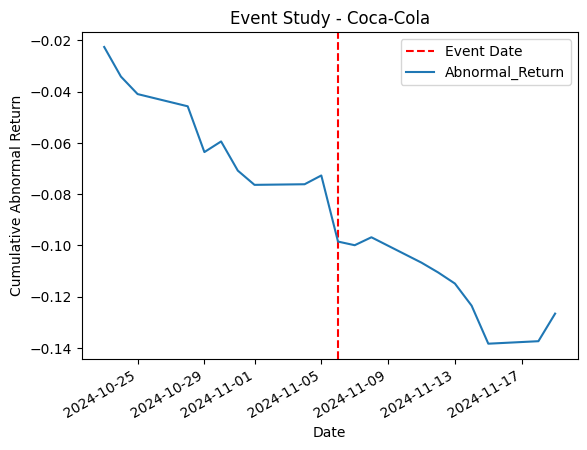

In [278]:
plot_cumulative_abnormal_returns(event_window_coca, "Coca-Cola")

## WalMart

In [279]:
wm_df = prepare_stock_data('WMT', start_date, end_date)
wm_df

Open       High        Low      Close    Volume  Dividends  \
0     21.515964  21.670041  21.507710  21.626020  14999100   0.000000   
1     21.730570  21.887398  21.587496  21.785597  20007600   0.000000   
2     21.738816  21.738816  21.477433  21.496693  17566200   0.000000   
3     21.574221  21.629597  21.366563  21.499464  16440300   0.163333   
4     21.521620  21.690514  21.402563  21.604683  16614300   0.000000   
...         ...        ...        ...        ...       ...        ...   
2406  86.599998  87.199997  85.910004  87.180000  18183200   0.000000   
2407  87.449997  88.639999  86.930000  88.389999  18729200   0.000000   
2408  89.410004  90.910004  88.930000  90.440002  23990600   0.000000   
2409  90.500000  90.949997  89.059998  89.500000  25078600   0.000000   
2410  89.889999  91.879997  89.839996  91.309998  16657000   0.000000   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.007352  
2              0.0  2015-05-05 -0.013350  
3              0.0  2015-05-06  0.000129  
4              0.0  2015-05-07  0.004882  
...            ...         ...       ...  
2406           0.0  2024-11-20  0.006675  
2407           0.0  2024-11-21  0.013784  
2408           0.0  2024-11-22  0.022928  
2409           0.0  2024-11-25 -0.010448  
2410           0.0  2024-11-26  0.020022  

[2411 rows x 9 columns]

In [280]:
df_merge_wm = pd.merge(wm_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_wm['date'] = pd.to_datetime(df_merge_wm['date'])
df_merge_wm

Open       High        Low      Close    Volume  Dividends  \
0     21.730570  21.887398  21.587496  21.785597  20007600   0.000000   
1     21.738816  21.738816  21.477433  21.496693  17566200   0.000000   
2     21.574221  21.629597  21.366563  21.499464  16440300   0.163333   
3     21.521620  21.690514  21.402563  21.604683  16614300   0.000000   
4     21.762504  21.942475  21.707128  21.743122  16042200   0.000000   
...         ...        ...        ...        ...       ...        ...   
2405  86.599998  87.199997  85.910004  87.180000  18183200   0.000000   
2406  87.449997  88.639999  86.930000  88.389999  18729200   0.000000   
2407  89.410004  90.910004  88.930000  90.440002  23990600   0.000000   
2408  90.500000  90.949997  89.059998  89.500000  25078600   0.000000   
2409  89.889999  91.879997  89.839996  91.309998  16657000   0.000000   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.007352       0.002936  
1              0.0 2015-05-05 -0.013350      -0.011908  
2              0.0 2015-05-06  0.000129      -0.004466  
3              0.0 2015-05-07  0.004882       0.003767  
4              0.0 2015-05-08  0.006387       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20  0.006675       0.000022  
2406           0.0 2024-11-21  0.013784       0.005326  
2407           0.0 2024-11-22  0.022928       0.003462  
2408           0.0 2024-11-25 -0.010448       0.003016  
2409           0.0 2024-11-26  0.020022       0.005706  

[2410 rows x 10 columns]

In [281]:
event_window_wm = get_event_window(df_merge_wm, event_date)
print(len(event_window_wm))
event_estimation_wm = get_estimation_window(df_merge_wm,event_date)
print(len(event_estimation_wm))

20
120


In [282]:
event_window_wm = calculate_abnormal_returns(event_window_wm, event_estimation_wm)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

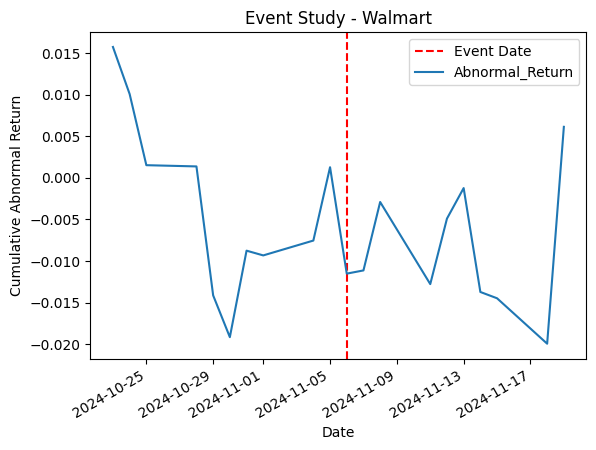

In [283]:
plot_cumulative_abnormal_returns(event_window_wm, "Walmart")

## Costco

In [284]:
costco_df = prepare_stock_data('COST', start_date, end_date)
costco_df

Open        High         Low       Close   Volume  Dividends  \
0     120.698804  122.617061  120.496877  122.322586  1504700        0.0   
1     122.322597  123.012503  121.666352  122.625481  1288800        0.0   
2     122.095411  122.617051  121.397097  121.573784  1769600        0.0   
3     122.288982  122.701231  121.161575  121.801003  1737300        0.0   
4     121.590650  122.507709  121.161558  121.624298  2564500        0.0   
...          ...         ...         ...         ...      ...        ...   
2406  925.080017  928.799988  916.500000  928.080017  1452100        0.0   
2407  935.000000  958.489990  930.000000  955.650024  2320500        0.0   
2408  962.739990  976.299988  958.520020  964.010010  2078700        0.0   
2409  975.000000  975.000000  949.690002  960.890015  3240900        0.0   
2410  964.000000  974.369995  960.890015  971.500000  1438000        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.002473  
2              0.0  2015-05-05 -0.008613  
3              0.0  2015-05-06  0.001867  
4              0.0  2015-05-07 -0.001452  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.002228  
2407           0.0  2024-11-21  0.029274  
2408           0.0  2024-11-22  0.008710  
2409           0.0  2024-11-25 -0.003242  
2410           0.0  2024-11-26  0.010981  

[2411 rows x 9 columns]

In [285]:
df_merge_costco = pd.merge(costco_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_costco['date'] = pd.to_datetime(df_merge_costco['date'])
df_merge_costco

Open        High         Low       Close   Volume  Dividends  \
0     122.322597  123.012503  121.666352  122.625481  1288800        0.0   
1     122.095411  122.617051  121.397097  121.573784  1769600        0.0   
2     122.288982  122.701231  121.161575  121.801003  1737300        0.0   
3     121.590650  122.507709  121.161558  121.624298  2564500        0.0   
4     122.835812  124.148303  122.667547  122.734856  1728700        0.0   
...          ...         ...         ...         ...      ...        ...   
2405  925.080017  928.799988  916.500000  928.080017  1452100        0.0   
2406  935.000000  958.489990  930.000000  955.650024  2320500        0.0   
2407  962.739990  976.299988  958.520020  964.010010  2078700        0.0   
2408  975.000000  975.000000  949.690002  960.890015  3240900        0.0   
2409  964.000000  974.369995  960.890015  971.500000  1438000        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.002473       0.002936  
1              0.0 2015-05-05 -0.008613      -0.011908  
2              0.0 2015-05-06  0.001867      -0.004466  
3              0.0 2015-05-07 -0.001452       0.003767  
4              0.0 2015-05-08  0.009090       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.002228       0.000022  
2406           0.0 2024-11-21  0.029274       0.005326  
2407           0.0 2024-11-22  0.008710       0.003462  
2408           0.0 2024-11-25 -0.003242       0.003016  
2409           0.0 2024-11-26  0.010981       0.005706  

[2410 rows x 10 columns]

In [286]:
event_window_costco = get_event_window(df_merge_costco, event_date)
print(len(event_window_costco))
estimation_window_costco = get_estimation_window(df_merge_costco,event_date)
print(len(estimation_window_costco))

20
120


In [287]:
event_window_costco = calculate_abnormal_returns(event_window_costco, estimation_window_costco)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

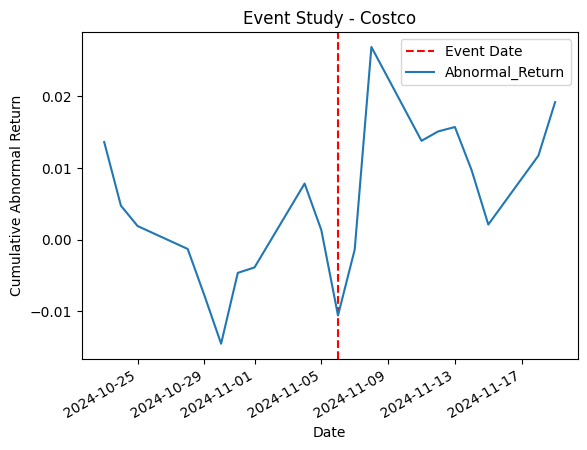

In [288]:
plot_cumulative_abnormal_returns(event_window_costco, "Costco")

## Johnson & Johnson

In [304]:
jnj_df = prepare_stock_data('JNJ', start_date, end_date)
jnj_df

Open        High         Low       Close    Volume  Dividends  \
0      76.122210   76.710584   76.122210   76.511909   6255000       0.00   
1      76.664713   76.832821   76.534813   76.679993   5532400       0.00   
2      76.511876   76.634139   75.870014   76.030479   8828000       0.00   
3      76.122173   76.313204   75.388613   75.778313   8030800       0.00   
4      75.602600   76.412571   75.579677   76.152771   6401600       0.00   
...          ...         ...         ...         ...       ...        ...   
2406  151.811886  152.030136  150.601596  151.891251   9061300       0.00   
2407  152.397182  154.817762  151.593632  154.262222  10141100       0.00   
2408  154.659030  155.869320  152.883285  153.934845   8266000       0.00   
2409  153.934848  155.789958  153.905088  154.539993  12256200       0.00   
2410  155.160004  155.250000  153.160004  154.520004   5683500       1.24   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.002194  
2              0.0  2015-05-05 -0.008507  
3              0.0  2015-05-06 -0.003322  
4              0.0  2015-05-07  0.004929  
...            ...         ...       ...  
2406           0.0  2024-11-20  0.000719  
2407           0.0  2024-11-21  0.015489  
2408           0.0  2024-11-22 -0.002124  
2409           0.0  2024-11-25  0.003923  
2410           0.0  2024-11-26 -0.000129  

[2411 rows x 9 columns]

In [305]:
df_merge_jnj = pd.merge(jnj_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_jnj['date'] = pd.to_datetime(df_merge_jnj['date'])
df_merge_jnj

Open        High         Low       Close    Volume  Dividends  \
0      76.664713   76.832821   76.534813   76.679993   5532400       0.00   
1      76.511876   76.634139   75.870014   76.030479   8828000       0.00   
2      76.122173   76.313204   75.388613   75.778313   8030800       0.00   
3      75.602600   76.412571   75.579677   76.152771   6401600       0.00   
4      76.779345   77.688650   76.748779   77.535828   7508600       0.00   
...          ...         ...         ...         ...       ...        ...   
2405  151.811886  152.030136  150.601596  151.891251   9061300       0.00   
2406  152.397182  154.817762  151.593632  154.262222  10141100       0.00   
2407  154.659030  155.869320  152.883285  153.934845   8266000       0.00   
2408  153.934848  155.789958  153.905088  154.539993  12256200       0.00   
2409  155.160004  155.250000  153.160004  154.520004   5683500       1.24   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.002194       0.002936  
1              0.0 2015-05-05 -0.008507      -0.011908  
2              0.0 2015-05-06 -0.003322      -0.004466  
3              0.0 2015-05-07  0.004929       0.003767  
4              0.0 2015-05-08  0.017999       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20  0.000719       0.000022  
2406           0.0 2024-11-21  0.015489       0.005326  
2407           0.0 2024-11-22 -0.002124       0.003462  
2408           0.0 2024-11-25  0.003923       0.003016  
2409           0.0 2024-11-26 -0.000129       0.005706  

[2410 rows x 10 columns]

In [306]:
event_window_jnj = get_event_window(df_merge_jnj, event_date)
print(len(event_window_jnj))
estimation_window_jnj = get_estimation_window(df_merge_jnj,event_date)
print(len(estimation_window_jnj))

20
120


In [307]:
event_window_jnj = calculate_abnormal_returns(event_window_jnj, estimation_window_jnj)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

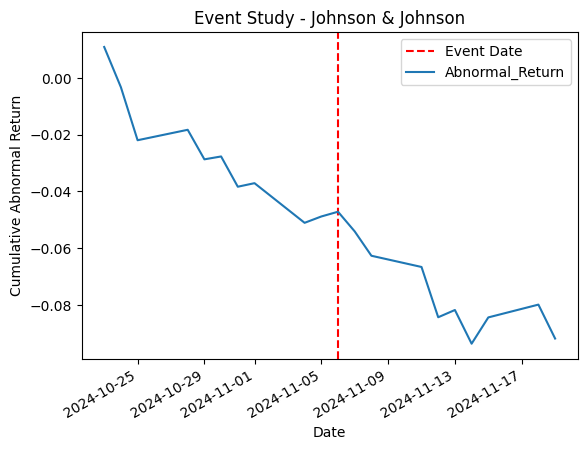

In [308]:
plot_cumulative_abnormal_returns(event_window_jnj, "Johnson & Johnson")

## Chevron

In [309]:
chevron_df = prepare_stock_data('CVX', start_date, end_date)
chevron_df

Open        High         Low       Close    Volume  Dividends  \
0      72.670391   73.013055   71.392002   71.853279  10362700        0.0   
1      72.077321   72.097094   71.161363   71.378822   7660100        0.0   
2      71.985073   72.439759   71.167961   71.167961   6463300        0.0   
3      71.985064   72.176164   70.706681   71.135002   5820400        0.0   
4      70.963690   71.299758   70.304728   70.884613   5798300        0.0   
...          ...         ...         ...         ...       ...        ...   
2406  159.910004  161.440002  159.779999  161.330002   6391300        0.0   
2407  162.020004  162.649994  161.289993  161.630005   7945200        0.0   
2408  161.509995  162.610001  161.149994  162.360001   7005900        0.0   
2409  162.149994  163.169998  159.830002  160.360001  10702400        0.0   
2410  162.309998  162.940002  161.399994  162.529999   7369500        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04 -0.006625  
2              0.0  2015-05-05 -0.002958  
3              0.0  2015-05-06 -0.000463  
4              0.0  2015-05-07 -0.003526  
...            ...         ...       ...  
2406           0.0  2024-11-20  0.010781  
2407           0.0  2024-11-21  0.001858  
2408           0.0  2024-11-22  0.004506  
2409           0.0  2024-11-25 -0.012395  
2410           0.0  2024-11-26  0.013441  

[2411 rows x 9 columns]

In [310]:
df_merge_chevron = pd.merge(chevron_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_chevron['date'] = pd.to_datetime(df_merge_chevron['date'])
df_merge_chevron

Open        High         Low       Close    Volume  Dividends  \
0      72.077321   72.097094   71.161363   71.378822   7660100        0.0   
1      71.985073   72.439759   71.167961   71.167961   6463300        0.0   
2      71.985064   72.176164   70.706681   71.135002   5820400        0.0   
3      70.963690   71.299758   70.304728   70.884613   5798300        0.0   
4      71.359056   71.695128   70.772580   71.596283   7078900        0.0   
...          ...         ...         ...         ...       ...        ...   
2405  159.910004  161.440002  159.779999  161.330002   6391300        0.0   
2406  162.020004  162.649994  161.289993  161.630005   7945200        0.0   
2407  161.509995  162.610001  161.149994  162.360001   7005900        0.0   
2408  162.149994  163.169998  159.830002  160.360001  10702400        0.0   
2409  162.309998  162.940002  161.399994  162.529999   7369500        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04 -0.006625       0.002936  
1              0.0 2015-05-05 -0.002958      -0.011908  
2              0.0 2015-05-06 -0.000463      -0.004466  
3              0.0 2015-05-07 -0.003526       0.003767  
4              0.0 2015-05-08  0.009990       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20  0.010781       0.000022  
2406           0.0 2024-11-21  0.001858       0.005326  
2407           0.0 2024-11-22  0.004506       0.003462  
2408           0.0 2024-11-25 -0.012395       0.003016  
2409           0.0 2024-11-26  0.013441       0.005706  

[2410 rows x 10 columns]

In [311]:
event_window_chevron = get_event_window(df_merge_chevron, event_date)
print(len(event_window_chevron))
estimation_window_chevron = get_estimation_window(df_merge_chevron,event_date)
print(len(estimation_window_chevron))

20
120


In [312]:
event_window_chevron = calculate_abnormal_returns(event_window_chevron, estimation_window_chevron)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

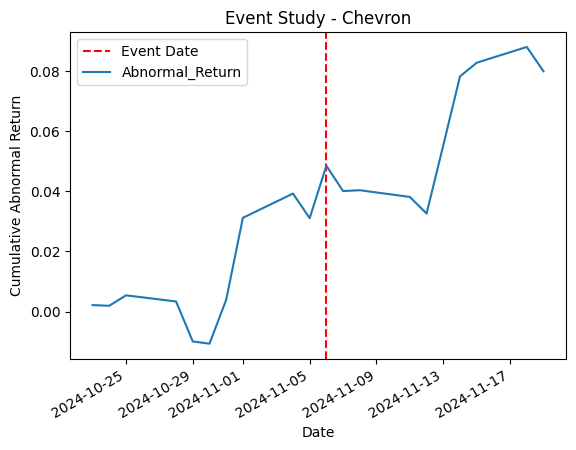

In [313]:
plot_cumulative_abnormal_returns(event_window_chevron, "Chevron")

## P & G

In [314]:
pg_df = prepare_stock_data('PG', start_date, end_date)
pg_df

Open        High         Low       Close    Volume  Dividends  \
0      61.129149   61.558338   61.029511   61.535347   8193000        0.0   
1      61.680974   62.056516   61.543020   61.581337   7203800        0.0   
2      61.696276   61.811239   61.144458   61.366718   6589400        0.0   
3      61.573663   61.757606   60.945204   61.619652   7335700        0.0   
4      61.596668   61.734623   61.313093   61.466373   7224300        0.0   
...          ...         ...         ...         ...       ...        ...   
2406  170.009995  171.070007  169.509995  170.889999   7081100        0.0   
2407  171.660004  173.509995  170.220001  172.750000   6240400        0.0   
2408  174.149994  177.399994  173.880005  176.279999  10609800        0.0   
2409  177.479996  178.820007  176.899994  177.389999  19357000        0.0   
2410  177.199997  179.460007  177.199997  179.309998   6276700        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.000747  
2              0.0  2015-05-05 -0.003491  
3              0.0  2015-05-06  0.004113  
4              0.0  2015-05-07 -0.002491  
...            ...         ...       ...  
2406           0.0  2024-11-20  0.000761  
2407           0.0  2024-11-21  0.010825  
2408           0.0  2024-11-22  0.020228  
2409           0.0  2024-11-25  0.006277  
2410           0.0  2024-11-26  0.010765  

[2411 rows x 9 columns]

In [315]:
df_merge_pg = pd.merge(pg_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_pg['date'] = pd.to_datetime(df_merge_pg['date'])
df_merge_pg

Open        High         Low       Close    Volume  Dividends  \
0      61.680974   62.056516   61.543020   61.581337   7203800        0.0   
1      61.696276   61.811239   61.144458   61.366718   6589400        0.0   
2      61.573663   61.757606   60.945204   61.619652   7335700        0.0   
3      61.596668   61.734623   61.313093   61.466373   7224300        0.0   
4      61.995198   62.240451   61.941550   62.048847   6929400        0.0   
...          ...         ...         ...         ...       ...        ...   
2405  170.009995  171.070007  169.509995  170.889999   7081100        0.0   
2406  171.660004  173.509995  170.220001  172.750000   6240400        0.0   
2407  174.149994  177.399994  173.880005  176.279999  10609800        0.0   
2408  177.479996  178.820007  176.899994  177.389999  19357000        0.0   
2409  177.199997  179.460007  177.199997  179.309998   6276700        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.000747       0.002936  
1              0.0 2015-05-05 -0.003491      -0.011908  
2              0.0 2015-05-06  0.004113      -0.004466  
3              0.0 2015-05-07 -0.002491       0.003767  
4              0.0 2015-05-08  0.009432       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20  0.000761       0.000022  
2406           0.0 2024-11-21  0.010825       0.005326  
2407           0.0 2024-11-22  0.020228       0.003462  
2408           0.0 2024-11-25  0.006277       0.003016  
2409           0.0 2024-11-26  0.010765       0.005706  

[2410 rows x 10 columns]

In [316]:
event_window_pg = get_event_window(df_merge_pg, event_date)
print(len(event_window_pg))
estimation_window_pg = get_estimation_window(df_merge_pg,event_date)
print(len(estimation_window_pg))

20
120


In [317]:
event_window_pg = calculate_abnormal_returns(event_window_pg, estimation_window_pg)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

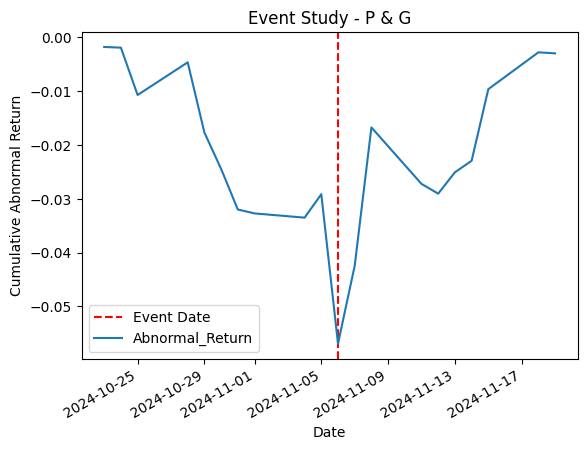

In [318]:
plot_cumulative_abnormal_returns(event_window_pg, "P & G")

## Colgate

In [319]:
colgate_df = prepare_stock_data('CL', start_date, end_date)
colgate_df

Open       High        Low      Close   Volume  Dividends  \
0     53.872380  54.208681  53.568109  54.192669  3135600        0.0   
1     54.312775  54.649076  54.216687  54.336796  2377400        0.0   
2     54.560994  54.641065  53.904405  53.952446  3182200        0.0   
3     54.248702  54.344790  53.760263  54.280731  2248800        0.0   
4     54.424882  54.649082  54.048543  54.352814  2338200        0.0   
...         ...        ...        ...        ...      ...        ...   
2406  93.410004  94.440002  92.860001  93.910004  4302400        0.0   
2407  94.150002  94.919998  93.300003  94.250000  3642800        0.0   
2408  94.989998  95.430000  94.489998  94.919998  3538900        0.0   
2409  95.540001  95.750000  94.930000  95.339996  6159200        0.0   
2410  95.570000  96.699997  95.199997  96.580002  4380600        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.002656  
2              0.0  2015-05-05 -0.007099  
3              0.0  2015-05-06  0.006066  
4              0.0  2015-05-07  0.001327  
...            ...         ...       ...  
2406           0.0  2024-11-20  0.003200  
2407           0.0  2024-11-21  0.003614  
2408           0.0  2024-11-22  0.007084  
2409           0.0  2024-11-25  0.004415  
2410           0.0  2024-11-26  0.012922  

[2411 rows x 9 columns]

In [320]:
df_merge_colgate = pd.merge(colgate_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_colgate['date'] = pd.to_datetime(df_merge_colgate['date'])
df_merge_colgate

Open       High        Low      Close   Volume  Dividends  \
0     54.312775  54.649076  54.216687  54.336796  2377400        0.0   
1     54.560994  54.641065  53.904405  53.952446  3182200        0.0   
2     54.248702  54.344790  53.760263  54.280731  2248800        0.0   
3     54.424882  54.649082  54.048543  54.352814  2338200        0.0   
4     54.849261  54.961361  54.432890  54.609043  3029900        0.0   
...         ...        ...        ...        ...      ...        ...   
2405  93.410004  94.440002  92.860001  93.910004  4302400        0.0   
2406  94.150002  94.919998  93.300003  94.250000  3642800        0.0   
2407  94.989998  95.430000  94.489998  94.919998  3538900        0.0   
2408  95.540001  95.750000  94.930000  95.339996  6159200        0.0   
2409  95.570000  96.699997  95.199997  96.580002  4380600        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.002656       0.002936  
1              0.0 2015-05-05 -0.007099      -0.011908  
2              0.0 2015-05-06  0.006066      -0.004466  
3              0.0 2015-05-07  0.001327       0.003767  
4              0.0 2015-05-08  0.004703       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20  0.003200       0.000022  
2406           0.0 2024-11-21  0.003614       0.005326  
2407           0.0 2024-11-22  0.007084       0.003462  
2408           0.0 2024-11-25  0.004415       0.003016  
2409           0.0 2024-11-26  0.012922       0.005706  

[2410 rows x 10 columns]

In [321]:
event_window_colgate = get_event_window(df_merge_colgate, event_date)
print(len(event_window_colgate))
estimation_window_colgate = get_estimation_window(df_merge_colgate,event_date)
print(len(estimation_window_colgate))

20
120


In [322]:
event_window_colgate = calculate_abnormal_returns(event_window_colgate, estimation_window_colgate)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

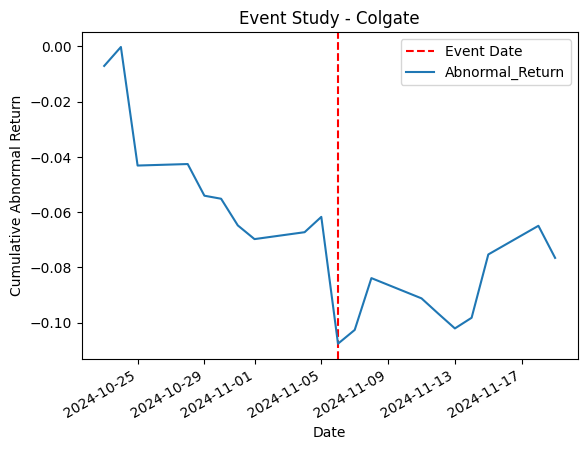

In [323]:
plot_cumulative_abnormal_returns(event_window_colgate, "Colgate")

## HSBC

In [324]:
hsbc_df = prepare_stock_data('0005.HK', start_date, end_date)
hsbc_df

Open       High        Low      Close    Volume  Dividends  \
0     46.853198  46.914523  46.209272  46.362587  30752542        0.0   
1     46.577232  46.730548  45.810655  45.902645  25859252        0.0   
2     45.473361  46.209274  45.412036  45.657337  33206893        0.0   
3     45.718666  46.331927  45.596011  45.841316  25310481        0.0   
4     46.209270  47.221153  46.025294  46.945187  37785690        0.0   
...         ...        ...        ...        ...       ...        ...   
2354  71.250000  71.550003  71.050003  71.550003   8322727        0.0   
2355  71.599998  71.650002  71.150002  71.300003   7857831        0.0   
2356  71.500000  71.750000  70.800003  71.250000  12509160        0.0   
2357  71.150002  71.449997  70.800003  71.099998  13670620        0.0   
2358  71.400002  71.599998  71.199997  71.550003   9056114        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-04       NaN  
1              0.0  2015-05-05 -0.009970  
2              0.0  2015-05-06 -0.005358  
3              0.0  2015-05-07  0.004021  
4              0.0  2015-05-08  0.023795  
...            ...         ...       ...  
2354           0.0  2024-11-20 -0.001397  
2355           0.0  2024-11-21 -0.003500  
2356           0.0  2024-11-22 -0.000702  
2357           0.0  2024-11-25 -0.002108  
2358           0.0  2024-11-26  0.006309  

[2359 rows x 9 columns]

In [325]:
df_merge_hsbc = pd.merge(hsbc_df, hang_seng_index[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_hsbc['date'] = pd.to_datetime(df_merge_hsbc['date'])
df_merge_hsbc

Open       High        Low      Close    Volume  Dividends  \
0     46.577232  46.730548  45.810655  45.902645  25859252        0.0   
1     45.473361  46.209274  45.412036  45.657337  33206893        0.0   
2     45.718666  46.331927  45.596011  45.841316  25310481        0.0   
3     46.209270  47.221153  46.025294  46.945187  37785690        0.0   
4     47.098509  47.129169  46.423917  46.454582  20140103        0.0   
...         ...        ...        ...        ...       ...        ...   
2350  71.250000  71.550003  71.050003  71.550003   8322727        0.0   
2351  71.599998  71.650002  71.150002  71.300003   7857831        0.0   
2352  71.500000  71.750000  70.800003  71.250000  12509160        0.0   
2353  71.150002  71.449997  70.800003  71.099998  13670620        0.0   
2354  71.400002  71.599998  71.199997  71.550003   9056114        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-05 -0.009970      -0.013181  
1              0.0 2015-05-06 -0.005358      -0.004138  
2              0.0 2015-05-07  0.004021      -0.012778  
3              0.0 2015-05-08  0.023795       0.010475  
4              0.0 2015-05-11 -0.010506       0.005095  
...            ...        ...       ...            ...  
2350           0.0 2024-11-20 -0.001397       0.002100  
2351           0.0 2024-11-21 -0.003500      -0.005287  
2352           0.0 2024-11-22 -0.000702      -0.019116  
2353           0.0 2024-11-25 -0.002108      -0.004116  
2354           0.0 2024-11-26  0.006309       0.000429  

[2355 rows x 10 columns]

In [326]:
event_window_hsbc = get_event_window(df_merge_hsbc, event_date)
print(len(event_window_hsbc))
estimation_window_hsbc = get_estimation_window(df_merge_hsbc,event_date)
print(len(estimation_window_hsbc))

20
120


In [327]:
event_window_hsbc = calculate_abnormal_returns(event_window_hsbc, estimation_window_hsbc)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

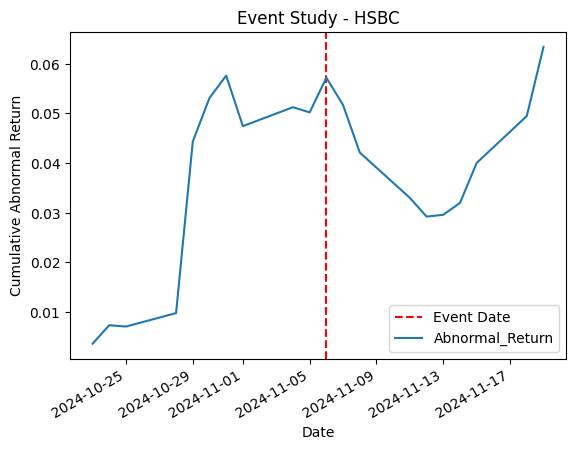

In [328]:
plot_cumulative_abnormal_returns(event_window_hsbc, "HSBC")

## Credit Suisse

In [329]:
credit_df = pd.read_csv("/content/gdrive/My Drive/Dataset/Credit Suisse Stock Price History.csv")
credit_df.rename(columns={'Price': 'Credit Suisse'}, inplace=True)
credit_df['date'] = pd.to_datetime(credit_df['Date'])
credit_df.drop(columns=['Date'], inplace=True)
credit_df['Return'] = credit_df['Credit Suisse'].pct_change()
credit_df

Credit Suisse   Open   High    Low    Vol. Change %       date    Return
0              0.82   0.81   0.82   0.81  41.89M    1.23% 2023-06-12       NaN
1              0.81   0.80   0.82   0.80  19.62M    0.00% 2023-06-09 -0.012195
2              0.81   0.82   0.82   0.81  20.92M    1.25% 2023-06-08  0.000000
3              0.80   0.81   0.81   0.80   8.04M   -1.23% 2023-06-07 -0.012346
4              0.81   0.80   0.81   0.80  25.11M    1.25% 2023-06-06  0.012500
...             ...    ...    ...    ...     ...      ...        ...       ...
2037          22.84  22.83  22.95  22.65   5.84M    1.20% 2015-05-08 -0.011255
2038          22.57  22.42  22.64  22.14   7.63M    0.22% 2015-05-07 -0.011821
2039          22.52  22.75  22.86  22.44   8.13M   -1.18% 2015-05-06 -0.002215
2040          22.79  22.84  23.09  22.79   8.98M    0.09% 2015-05-05  0.011989
2041          22.77  22.54  22.88  22.44   5.67M   -2.11% 2015-05-04 -0.000878

[2042 rows x 8 columns]

In [330]:
smi_index_data = pd.read_csv("/content/gdrive/My Drive/Dataset/SMI Historical Data.csv")
smi_index_data['Price'] = smi_index_data['Price'].str.replace(',', '').astype(float)
smi_index_data['Market Return'] = smi_index_data['Price'].pct_change()
smi_index_data['date'] = pd.to_datetime(smi_index_data['Date'])
smi_index_data.drop(columns=['Date'], inplace=True)
smi_index_data

Price       Open       High        Low    Vol. Change %  \
0     11602.21  11,551.01  11,602.21  11,542.78  28.91M    0.78%   
1     11512.97  11,352.58  11,526.26  11,351.17  33.98M    1.64%   
2     11327.66  11,283.23  11,381.81  11,277.59  17.43M    0.49%   
3     11272.95  11,239.82  11,335.26  11,221.41     NaN    0.56%   
4     11209.63  11,286.71  11,301.35  11,188.72  27.50M   -0.46%   
...        ...        ...        ...        ...     ...      ...   
2266   9093.33   8,994.97   9,110.69   8,941.39  61.23M    2.48%   
2267   8873.55   8,839.37   8,901.26   8,729.00  75.81M   -0.17%   
2268   8888.92   8,993.83   8,998.61   8,859.34  74.59M   -1.50%   
2269   9024.38   9,098.66   9,203.59   9,024.38  86.72M   -0.79%   
2270   9095.82   9,112.04   9,144.87   9,076.50  42.22M    0.21%   

      Market Return       date  
0               NaN 2024-05-08  
1         -0.007692 2024-05-07  
2         -0.016096 2024-05-06  
3         -0.004830 2024-05-03  
4         -0.005617 2024-05-02  
...             ...        ...  
2266      -0.002632 2015-05-08  
2267      -0.024169 2015-05-07  
2268       0.001732 2015-05-06  
2269       0.015239 2015-05-05  
2270       0.007916 2015-05-04  

[2271 rows x 8 columns]

In [331]:
df_merge_credit = pd.merge(credit_df, smi_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_credit['date'] = pd.to_datetime(df_merge_credit['date'])
df_merge_credit

Credit Suisse   Open   High    Low    Vol. Change %       date  \
0              0.81   0.80   0.82   0.80  19.62M    0.00% 2023-06-09   
1              0.81   0.82   0.82   0.81  20.92M    1.25% 2023-06-08   
2              0.80   0.81   0.81   0.80   8.04M   -1.23% 2023-06-07   
3              0.81   0.80   0.81   0.80  25.11M    1.25% 2023-06-06   
4              0.80   0.80   0.82   0.80  16.25M    1.27% 2023-06-05   
...             ...    ...    ...    ...     ...      ...        ...   
2035          22.84  22.83  22.95  22.65   5.84M    1.20% 2015-05-08   
2036          22.57  22.42  22.64  22.14   7.63M    0.22% 2015-05-07   
2037          22.52  22.75  22.86  22.44   8.13M   -1.18% 2015-05-06   
2038          22.79  22.84  23.09  22.79   8.98M    0.09% 2015-05-05   
2039          22.77  22.54  22.88  22.44   5.67M   -2.11% 2015-05-04   

        Return  Market Return  
0    -0.012195      -0.004144  
1     0.000000       0.004841  
2    -0.012346       0.003467  
3     0.012500       0.010589  
4    -0.012346      -0.004645  
...        ...            ...  
2035 -0.011255      -0.002632  
2036 -0.011821      -0.024169  
2037 -0.002215       0.001732  
2038  0.011989       0.015239  
2039 -0.000878       0.007916  

[2040 rows x 9 columns]

In [332]:
event_window_credit = get_event_window(df_merge_credit, event_date)
print(len(event_window_credit))
estimation_window_credit = get_estimation_window(df_merge_credit,event_date)
print(len(estimation_window_credit))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
event_window_credit = calculate_abnormal_returns(event_window_credit, estimation_window_credit)

<ipython-input-24-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-24-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-24-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

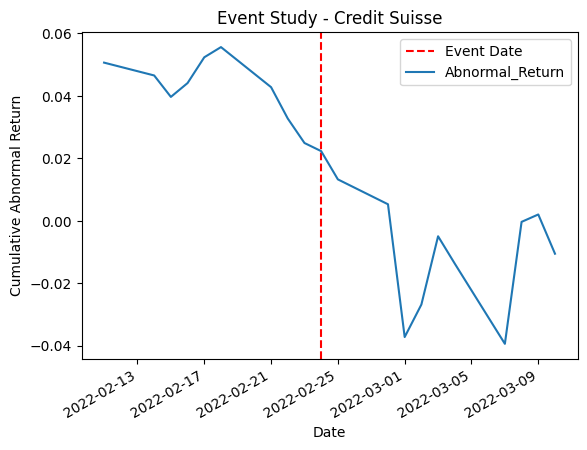

In [ ]:
plot_cumulative_abnormal_returns(event_window_credit, "Credit Suisse")

## UBS

In [333]:
ubs_df =  prepare_stock_data('UBS', start_date, end_date)
ubs_df

Open       High        Low      Close   Volume  Dividends  \
0     14.393500  14.443577  14.350576  14.393500   960500        0.0   
1     14.586649  14.622419  14.522264  14.565188   898400        0.0   
2     15.409341  15.452263  15.226917  15.287725  2741100        0.0   
3     14.980112  15.101727  14.943627  15.030189  1821400        0.0   
4     15.187575  15.330652  15.123191  15.237652  2663600        0.0   
...         ...        ...        ...        ...      ...        ...   
2406  31.860001  31.910000  31.610001  31.830000  1548800        0.0   
2407  31.830000  31.900999  31.605000  31.740000  1249600        0.0   
2408  31.639999  31.809999  31.590000  31.799999  1268400        0.0   
2409  32.060001  32.180000  31.910000  32.040001  1662000        0.0   
2410  31.400000  31.459999  31.070000  31.190001  1446900        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.011858  
2              0.0  2015-05-05  0.048416  
3              0.0  2015-05-06 -0.016989  
4              0.0  2015-05-07  0.013709  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.000628  
2407           0.0  2024-11-21 -0.002832  
2408           0.0  2024-11-22  0.001889  
2409           0.0  2024-11-25  0.007519  
2410           0.0  2024-11-26 -0.026888  

[2411 rows x 9 columns]

In [334]:
df_merge_ubs = pd.merge(ubs_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_ubs['date'] = pd.to_datetime(df_merge_ubs['date'])
df_merge_ubs

Open       High        Low      Close   Volume  Dividends  \
0     14.586649  14.622419  14.522264  14.565188   898400        0.0   
1     15.409341  15.452263  15.226917  15.287725  2741100        0.0   
2     14.980112  15.101727  14.943627  15.030189  1821400        0.0   
3     15.187575  15.330652  15.123191  15.237652  2663600        0.0   
4     15.352108  15.380724  15.223340  15.302032  1290600        0.0   
...         ...        ...        ...        ...      ...        ...   
2405  31.860001  31.910000  31.610001  31.830000  1548800        0.0   
2406  31.830000  31.900999  31.605000  31.740000  1249600        0.0   
2407  31.639999  31.809999  31.590000  31.799999  1268400        0.0   
2408  32.060001  32.180000  31.910000  32.040001  1662000        0.0   
2409  31.400000  31.459999  31.070000  31.190001  1446900        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.011858       0.002936  
1              0.0 2015-05-05  0.048416      -0.011908  
2              0.0 2015-05-06 -0.016989      -0.004466  
3              0.0 2015-05-07  0.013709       0.003767  
4              0.0 2015-05-08  0.004216       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.000628       0.000022  
2406           0.0 2024-11-21 -0.002832       0.005326  
2407           0.0 2024-11-22  0.001889       0.003462  
2408           0.0 2024-11-25  0.007519       0.003016  
2409           0.0 2024-11-26 -0.026888       0.005706  

[2410 rows x 10 columns]

In [335]:
event_window_ubs = get_event_window(df_merge_ubs, event_date)
print(len(event_window_ubs))
estimation_window_ubs = get_estimation_window(df_merge_ubs,event_date)
print(len(estimation_window_ubs))

20
120


In [336]:
event_window_ubs = calculate_abnormal_returns(event_window_ubs, estimation_window_ubs)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

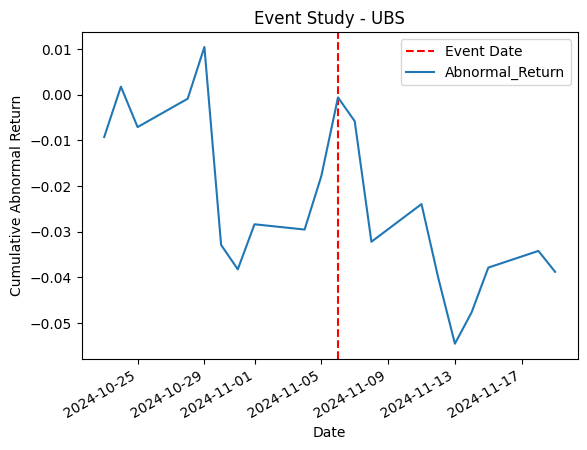

In [337]:
plot_cumulative_abnormal_returns(event_window_ubs, "UBS")

## JPMorgan

In [338]:
jpmorgan_df = prepare_stock_data('JPM', start_date, end_date)
jpmorgan_df

Open        High         Low       Close    Volume  Dividends  \
0      48.957041   49.087694   48.672676   48.887871  11640100        0.0   
1      48.941664   49.856248   48.910921   49.740963  14972500        0.0   
2      49.579560   50.202088   49.410476   49.495018  17692400        0.0   
3      49.594934   50.009955   48.741836   49.126114  18087900        0.0   
4      48.933981   49.648739   48.611189   49.571884  15039900        0.0   
...          ...         ...         ...         ...       ...        ...   
2406  244.399994  244.610001  238.639999  240.779999   9015300        0.0   
2407  243.229996  245.490005  242.110001  244.759995   8783500        0.0   
2408  243.610001  249.149994  243.029999  248.550003   7997300        0.0   
2409  249.589996  254.309998  249.059998  250.289993  10295400        0.0   
2410  250.490005  251.000000  248.339996  249.970001   6212100        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.017299  
2              0.0  2015-05-05 -0.004957  
3              0.0  2015-05-06 -0.007481  
4              0.0  2015-05-07  0.009033  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.009548  
2407           0.0  2024-11-21  0.016394  
2408           0.0  2024-11-22  0.015366  
2409           0.0  2024-11-25  0.006976  
2410           0.0  2024-11-26 -0.001279  

[2411 rows x 9 columns]

In [339]:
df_merge_jpmorgan = pd.merge(jpmorgan_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_jpmorgan['date'] = pd.to_datetime(df_merge_jpmorgan['date'])
df_merge_jpmorgan

Open        High         Low       Close    Volume  Dividends  \
0      48.941664   49.856248   48.910921   49.740963  14972500        0.0   
1      49.579560   50.202088   49.410476   49.495018  17692400        0.0   
2      49.594934   50.009955   48.741836   49.126114  18087900        0.0   
3      48.933981   49.648739   48.611189   49.571884  15039900        0.0   
4      49.933098   50.455716   49.648730   50.332745  16802600        0.0   
...          ...         ...         ...         ...       ...        ...   
2405  244.399994  244.610001  238.639999  240.779999   9015300        0.0   
2406  243.229996  245.490005  242.110001  244.759995   8783500        0.0   
2407  243.610001  249.149994  243.029999  248.550003   7997300        0.0   
2408  249.589996  254.309998  249.059998  250.289993  10295400        0.0   
2409  250.490005  251.000000  248.339996  249.970001   6212100        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.017299       0.002936  
1              0.0 2015-05-05 -0.004957      -0.011908  
2              0.0 2015-05-06 -0.007481      -0.004466  
3              0.0 2015-05-07  0.009033       0.003767  
4              0.0 2015-05-08  0.015232       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.009548       0.000022  
2406           0.0 2024-11-21  0.016394       0.005326  
2407           0.0 2024-11-22  0.015366       0.003462  
2408           0.0 2024-11-25  0.006976       0.003016  
2409           0.0 2024-11-26 -0.001279       0.005706  

[2410 rows x 10 columns]

In [340]:
event_window_jpmorgan = get_event_window(df_merge_jpmorgan, event_date)
print(len(event_window_jpmorgan))
estimation_window_jpmorgan = get_estimation_window(df_merge_jpmorgan,event_date)
print(len(estimation_window_jpmorgan))

20
120


In [341]:
event_window_jpmorgan = calculate_abnormal_returns(event_window_jpmorgan, estimation_window_jpmorgan)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

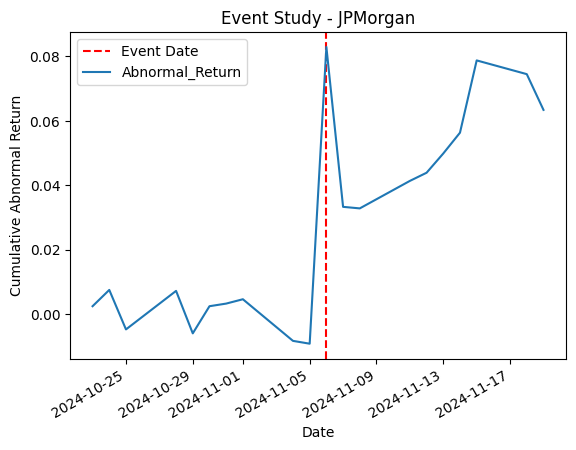

In [342]:
plot_cumulative_abnormal_returns(event_window_jpmorgan, "JPMorgan")

## Morgan Stanley

In [343]:
ms_df = prepare_stock_data('MS', start_date, end_date)
ms_df

Open        High         Low       Close    Volume  Dividends  \
0      28.796285   28.896113   28.650385   28.803963   6469600        0.0   
1      28.857718   29.134160   28.819321   29.111124   7375700        0.0   
2      28.965222   29.141839   28.688778   28.757889  10339600        0.0   
3      28.819318   28.896109   28.228034   28.450726   9532500        0.0   
4      28.396972   28.888428   28.297144   28.826998  12404700        0.0   
...          ...         ...         ...         ...       ...        ...   
2406  133.160004  133.649994  131.050003  131.690002   5125600        0.0   
2407  133.199997  135.570007  133.139999  134.990005   5547400        0.0   
2408  134.679993  135.669998  133.960007  134.690002   6334100        0.0   
2409  135.440002  136.240005  133.580002  133.660004   8012300        0.0   
2410  130.750000  131.789993  128.529999  131.279999   8817300        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.010607  
2              0.0  2015-05-05 -0.012208  
3              0.0  2015-05-06 -0.010738  
4              0.0  2015-05-07  0.013139  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.004168  
2407           0.0  2024-11-21  0.024750  
2408           0.0  2024-11-22 -0.002225  
2409           0.0  2024-11-25 -0.007677  
2410           0.0  2024-11-26 -0.017967  

[2411 rows x 9 columns]

In [344]:
df_merge_ms = pd.merge(ms_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_ms['date'] = pd.to_datetime(df_merge_ms['date'])
df_merge_ms

Open        High         Low       Close    Volume  Dividends  \
0      28.857718   29.134160   28.819321   29.111124   7375700        0.0   
1      28.965222   29.141839   28.688778   28.757889  10339600        0.0   
2      28.819318   28.896109   28.228034   28.450726   9532500        0.0   
3      28.396972   28.888428   28.297144   28.826998  12404700        0.0   
4      28.896115   29.149521   28.819323   29.095768  10037900        0.0   
...          ...         ...         ...         ...       ...        ...   
2405  133.160004  133.649994  131.050003  131.690002   5125600        0.0   
2406  133.199997  135.570007  133.139999  134.990005   5547400        0.0   
2407  134.679993  135.669998  133.960007  134.690002   6334100        0.0   
2408  135.440002  136.240005  133.580002  133.660004   8012300        0.0   
2409  130.750000  131.789993  128.529999  131.279999   8817300        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.010607       0.002936  
1              0.0 2015-05-05 -0.012208      -0.011908  
2              0.0 2015-05-06 -0.010738      -0.004466  
3              0.0 2015-05-07  0.013139       0.003767  
4              0.0 2015-05-08  0.009280       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.004168       0.000022  
2406           0.0 2024-11-21  0.024750       0.005326  
2407           0.0 2024-11-22 -0.002225       0.003462  
2408           0.0 2024-11-25 -0.007677       0.003016  
2409           0.0 2024-11-26 -0.017967       0.005706  

[2410 rows x 10 columns]

In [345]:
event_window_ms = get_event_window(df_merge_ms, event_date)
print(len(event_window_ms))
estimation_window_ms = get_estimation_window(df_merge_ms,event_date)
print(len(estimation_window_ms))

20
120


In [346]:
event_window_ms = calculate_abnormal_returns(event_window_ms, estimation_window_ms)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

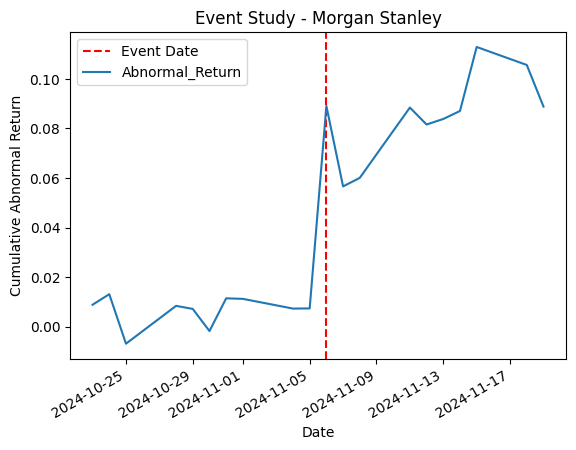

In [347]:
plot_cumulative_abnormal_returns(event_window_ms, "Morgan Stanley")

## Citigroup

In [348]:
citi_df = prepare_stock_data("C", start_date, end_date)
citi_df

Open       High        Low      Close    Volume  Dividends  \
0     41.068160  41.221286  40.815505  41.160034  13147600       0.00   
1     41.228934  41.542841  41.144718  41.473934  15670100       0.00   
2     41.336122  41.573464  40.769558  40.846119  20669100       0.00   
3     41.006902  41.267215  40.080493  40.440338  19414800       0.00   
4     40.302391  40.953788  40.164447  40.854164  14954200       0.05   
...         ...        ...        ...        ...       ...        ...   
2406  69.139999  69.489998  68.000000  68.279999  10495600       0.00   
2407  68.800003  69.470001  68.410004  68.949997  11390300       0.00   
2408  68.910004  70.199997  68.449997  69.839996  16671600       0.00   
2409  70.440002  71.190002  70.029999  70.750000  19558100       0.00   
2410  70.360001  70.480003  69.330002  69.750000  11605200       0.00   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.007597  
2              0.0  2015-05-05 -0.015253  
3              0.0  2015-05-06 -0.009984  
4              0.0  2015-05-07  0.010181  
...            ...         ...       ...  
2406           0.0  2024-11-20 -0.004676  
2407           0.0  2024-11-21  0.009765  
2408           0.0  2024-11-22  0.012825  
2409           0.0  2024-11-25  0.012946  
2410           0.0  2024-11-26 -0.014235  

[2411 rows x 9 columns]

In [349]:
df_merge_citi = pd.merge(citi_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_citi['date'] = pd.to_datetime(df_merge_citi['date'])
df_merge_citi

Open       High        Low      Close    Volume  Dividends  \
0     41.228934  41.542841  41.144718  41.473934  15670100       0.00   
1     41.336122  41.573464  40.769558  40.846119  20669100       0.00   
2     41.006902  41.267215  40.080493  40.440338  19414800       0.00   
3     40.302391  40.953788  40.164447  40.854164  14954200       0.05   
4     41.038099  41.467257  40.846511  41.398285  17333500       0.00   
...         ...        ...        ...        ...       ...        ...   
2405  69.139999  69.489998  68.000000  68.279999  10495600       0.00   
2406  68.800003  69.470001  68.410004  68.949997  11390300       0.00   
2407  68.910004  70.199997  68.449997  69.839996  16671600       0.00   
2408  70.440002  71.190002  70.029999  70.750000  19558100       0.00   
2409  70.360001  70.480003  69.330002  69.750000  11605200       0.00   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.007597       0.002936  
1              0.0 2015-05-05 -0.015253      -0.011908  
2              0.0 2015-05-06 -0.009984      -0.004466  
3              0.0 2015-05-07  0.010181       0.003767  
4              0.0 2015-05-08  0.013231       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20 -0.004676       0.000022  
2406           0.0 2024-11-21  0.009765       0.005326  
2407           0.0 2024-11-22  0.012825       0.003462  
2408           0.0 2024-11-25  0.012946       0.003016  
2409           0.0 2024-11-26 -0.014235       0.005706  

[2410 rows x 10 columns]

In [350]:
event_window_citi = get_event_window(df_merge_citi, event_date)
print(len(event_window_citi))
estimation_window_citi = get_estimation_window(df_merge_citi,event_date)
print(len(estimation_window_citi))

20
120


In [351]:
event_window_citi = calculate_abnormal_returns(event_window_citi, estimation_window_citi)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

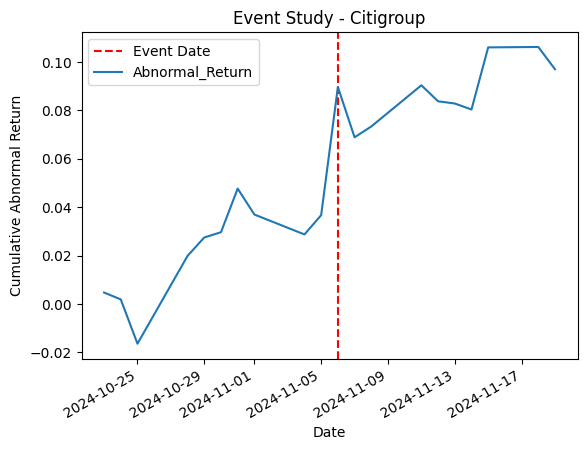

In [352]:
plot_cumulative_abnormal_returns(event_window_citi, "Citigroup")

## Goldman Sachs

In [353]:
gs_df = prepare_stock_data('GS', start_date, end_date)
gs_df

Open        High         Low       Close   Volume  Dividends  \
0     164.201824  164.301123  162.861405  163.440598  2029500        0.0   
1     164.044611  165.252652  163.746738  164.905136  1581600        0.0   
2     164.086009  165.807047  162.770411  163.242035  2287500        0.0   
3     163.622633  164.317664  160.528071  162.381500  2433700        0.0   
4     162.389762  163.788107  161.190004  163.324753  1795300        0.0   
...          ...         ...         ...         ...      ...        ...   
2406  583.830017  587.799988  576.619995  581.929993  1528600        0.0   
2407  586.510010  600.700012  584.510010  596.109985  2281900        0.0   
2408  596.219971  603.940002  594.440002  602.780029  1733700        0.0   
2409  608.789978  611.299988  598.830017  603.030029  2940800        0.0   
2410  600.130005  607.190002  593.000000  605.500000  2846500        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.008921  
2              0.0  2015-05-05 -0.010136  
3              0.0  2015-05-06 -0.005285  
4              0.0  2015-05-07  0.005792  
...            ...         ...       ...  
2406           0.0  2024-11-20  0.000946  
2407           0.0  2024-11-21  0.024075  
2408           0.0  2024-11-22  0.011127  
2409           0.0  2024-11-25  0.000415  
2410           0.0  2024-11-26  0.004088  

[2411 rows x 9 columns]

In [354]:
df_merge_cs = pd.merge(gs_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_cs['date'] = pd.to_datetime(df_merge_cs['date'])
df_merge_cs

Open        High         Low       Close   Volume  Dividends  \
0     164.044611  165.252652  163.746738  164.905136  1581600        0.0   
1     164.086009  165.807047  162.770411  163.242035  2287500        0.0   
2     163.622633  164.317664  160.528071  162.381500  2433700        0.0   
3     162.389762  163.788107  161.190004  163.324753  1795300        0.0   
4     164.739656  166.593072  164.739656  165.898041  3192500        0.0   
...          ...         ...         ...         ...      ...        ...   
2405  583.830017  587.799988  576.619995  581.929993  1528600        0.0   
2406  586.510010  600.700012  584.510010  596.109985  2281900        0.0   
2407  596.219971  603.940002  594.440002  602.780029  1733700        0.0   
2408  608.789978  611.299988  598.830017  603.030029  2940800        0.0   
2409  600.130005  607.190002  593.000000  605.500000  2846500        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.008921       0.002936  
1              0.0 2015-05-05 -0.010136      -0.011908  
2              0.0 2015-05-06 -0.005285      -0.004466  
3              0.0 2015-05-07  0.005792       0.003767  
4              0.0 2015-05-08  0.015633       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20  0.000946       0.000022  
2406           0.0 2024-11-21  0.024075       0.005326  
2407           0.0 2024-11-22  0.011127       0.003462  
2408           0.0 2024-11-25  0.000415       0.003016  
2409           0.0 2024-11-26  0.004088       0.005706  

[2410 rows x 10 columns]

In [355]:
event_window_cs = get_event_window(df_merge_cs, event_date)
print(len(event_window_cs))
estimation_window_cs = get_estimation_window(df_merge_cs,event_date)
print(len(estimation_window_cs))

20
120


In [356]:
event_window_cs = calculate_abnormal_returns(event_window_cs, estimation_window_cs)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

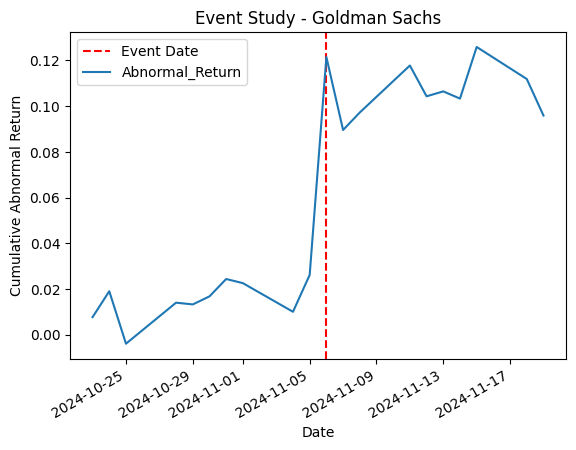

In [357]:
plot_cumulative_abnormal_returns(event_window_cs, "Goldman Sachs")

## Standard Chartered

In [358]:
sc_df = prepare_stock_data('2888.HK', start_date, end_date)
sc_df

Open        High         Low       Close   Volume  Dividends  \
0     114.204643  114.385780  113.389542  113.932945   886750        0.0   
1     113.932945  114.838607  112.755577  113.027275  1546570        0.0   
2     112.121613  112.483879  111.397080  111.940483  2165969        0.0   
3     111.578216  112.755584  110.491417  110.763115  1161452        0.0   
4     113.027283  114.204651  112.031052  113.570686  1588916        0.0   
...          ...         ...         ...         ...      ...        ...   
2354   93.599998   94.449997   92.949997   94.000000   495013        0.0   
2355   93.449997   93.800003   93.099998   93.349998   197045        0.0   
2356   93.750000   94.300003   93.300003   93.900002   503246        0.0   
2357   92.750000   92.750000   91.900002   92.349998   365090        0.0   
2358   93.000000   93.800003   93.000000   93.599998   424614        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-04       NaN  
1              0.0  2015-05-05 -0.007981  
2              0.0  2015-05-06 -0.009662  
3              0.0  2015-05-07 -0.010574  
4              0.0  2015-05-08  0.025032  
...            ...         ...       ...  
2354           0.0  2024-11-20  0.005333  
2355           0.0  2024-11-21 -0.006939  
2356           0.0  2024-11-22  0.005875  
2357           0.0  2024-11-25 -0.016645  
2358           0.0  2024-11-26  0.013445  

[2359 rows x 9 columns]

In [359]:
df_merge_sc = pd.merge(sc_df, hang_seng_index[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_sc['date'] = pd.to_datetime(df_merge_sc['date'])
df_merge_sc

Open        High         Low       Close   Volume  Dividends  \
0     113.932945  114.838607  112.755577  113.027275  1546570        0.0   
1     112.121613  112.483879  111.397080  111.940483  2165969        0.0   
2     111.578216  112.755584  110.491417  110.763115  1161452        0.0   
3     113.027283  114.204651  112.031052  113.570686  1588916        0.0   
4     114.114090  114.114090  113.117859  113.389557   600071        0.0   
...          ...         ...         ...         ...      ...        ...   
2350   93.599998   94.449997   92.949997   94.000000   495013        0.0   
2351   93.449997   93.800003   93.099998   93.349998   197045        0.0   
2352   93.750000   94.300003   93.300003   93.900002   503246        0.0   
2353   92.750000   92.750000   91.900002   92.349998   365090        0.0   
2354   93.000000   93.800003   93.000000   93.599998   424614        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-05 -0.007981      -0.013181  
1              0.0 2015-05-06 -0.009662      -0.004138  
2              0.0 2015-05-07 -0.010574      -0.012778  
3              0.0 2015-05-08  0.025032       0.010475  
4              0.0 2015-05-11 -0.001596       0.005095  
...            ...        ...       ...            ...  
2350           0.0 2024-11-20  0.005333       0.002100  
2351           0.0 2024-11-21 -0.006939      -0.005287  
2352           0.0 2024-11-22  0.005875      -0.019116  
2353           0.0 2024-11-25 -0.016645      -0.004116  
2354           0.0 2024-11-26  0.013445       0.000429  

[2355 rows x 10 columns]

In [360]:
event_window_sc = get_event_window(df_merge_sc, event_date)
print(len(event_window_sc))
estimation_window_sc = get_estimation_window(df_merge_sc,event_date)
print(len(estimation_window_sc))

20
120


In [361]:
event_window_sc = calculate_abnormal_returns(event_window_sc, estimation_window_sc)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

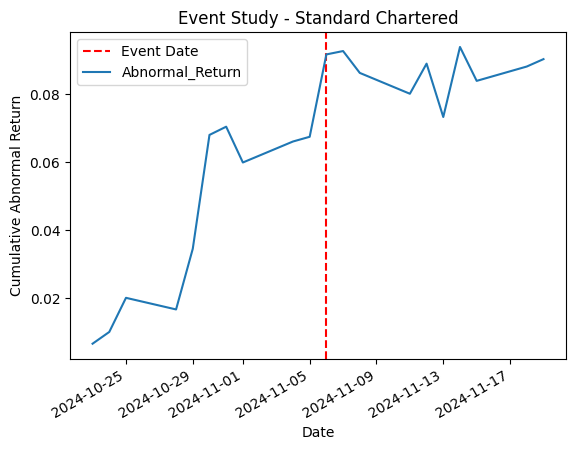

In [362]:
plot_cumulative_abnormal_returns(event_window_sc, "Standard Chartered")

## NatWest

In [363]:
natwest_df = prepare_stock_data('NWG', start_date, end_date)
natwest_df

Open       High        Low      Close   Volume  Dividends  \
0      6.893518   6.920006   6.820676   6.873652  1062931        0.0   
1      6.860408   6.920006   6.860408   6.906763   350227        0.0   
2      6.880276   6.900142   6.754457   6.761080   523949        0.0   
3      6.767700   6.787567   6.708102   6.734591   416115        0.0   
4      6.714724   6.754456   6.635260   6.754456   824157        0.0   
...         ...        ...        ...        ...      ...        ...   
2406  10.120000  10.210000  10.040000  10.200000  2555100        0.0   
2407  10.120000  10.250000  10.090000  10.210000  1837100        0.0   
2408   9.920000   9.990000   9.870000   9.900000  2176400        0.0   
2409  10.010000  10.050000   9.930000   9.990000  2135900        0.0   
2410   9.910000   9.960000   9.870000   9.930000  1710600        0.0   

      Stock Splits        date    Return  
0              0.0  2015-05-01       NaN  
1              0.0  2015-05-04  0.004805  
2              0.0  2015-05-05 -0.021318  
3              0.0  2015-05-06 -0.003926  
4              0.0  2015-05-07  0.002945  
...            ...         ...       ...  
2406           0.0  2024-11-20  0.014815  
2407           0.0  2024-11-21  0.000980  
2408           0.0  2024-11-22 -0.030833  
2409           0.0  2024-11-25  0.009050  
2410           0.0  2024-11-26 -0.006024  

[2411 rows x 9 columns]

In [364]:
df_merge_natwest = pd.merge(natwest_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_natwest['date'] = pd.to_datetime(df_merge_natwest['date'])
df_merge_natwest

Open       High        Low      Close   Volume  Dividends  \
0      6.860408   6.920006   6.860408   6.906763   350227        0.0   
1      6.880276   6.900142   6.754457   6.761080   523949        0.0   
2      6.767700   6.787567   6.708102   6.734591   416115        0.0   
3      6.714724   6.754456   6.635260   6.754456   824157        0.0   
4      7.105422   7.257729   7.092178   7.251107  1425408        0.0   
...         ...        ...        ...        ...      ...        ...   
2405  10.120000  10.210000  10.040000  10.200000  2555100        0.0   
2406  10.120000  10.250000  10.090000  10.210000  1837100        0.0   
2407   9.920000   9.990000   9.870000   9.900000  2176400        0.0   
2408  10.010000  10.050000   9.930000   9.990000  2135900        0.0   
2409   9.910000   9.960000   9.870000   9.930000  1710600        0.0   

      Stock Splits       date    Return  Market Return  
0              0.0 2015-05-04  0.004805       0.002936  
1              0.0 2015-05-05 -0.021318      -0.011908  
2              0.0 2015-05-06 -0.003926      -0.004466  
3              0.0 2015-05-07  0.002945       0.003767  
4              0.0 2015-05-08  0.070952       0.013368  
...            ...        ...       ...            ...  
2405           0.0 2024-11-20  0.014815       0.000022  
2406           0.0 2024-11-21  0.000980       0.005326  
2407           0.0 2024-11-22 -0.030833       0.003462  
2408           0.0 2024-11-25  0.009050       0.003016  
2409           0.0 2024-11-26 -0.006024       0.005706  

[2410 rows x 10 columns]

In [365]:
event_window_natwest = get_event_window(df_merge_natwest, event_date)
print(len(event_window_natwest))
estimation_window_natwest = get_estimation_window(df_merge_natwest,event_date)
print(len(estimation_window_natwest))

20
120


In [366]:
event_window_natwest = calculate_abnormal_returns(event_window_natwest, estimation_window_natwest)

<ipython-input-7-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-7-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-7-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

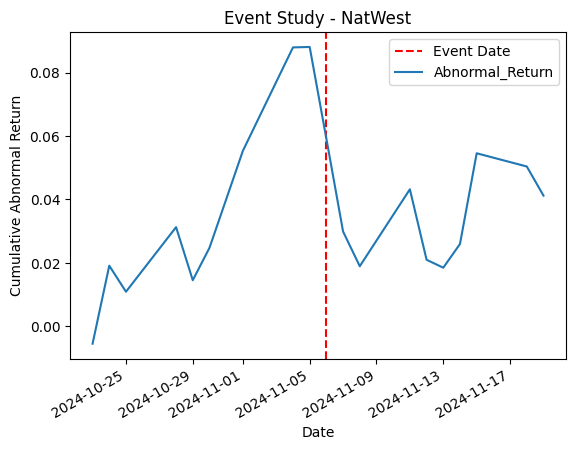

In [367]:
plot_cumulative_abnormal_returns(event_window_natwest, "NatWest")